<a href="https://colab.research.google.com/github/keresztesbeata/Intelligent-Systems-Lab/blob/main/Health-Insurance-Cross-Sell-Prediction/Car_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

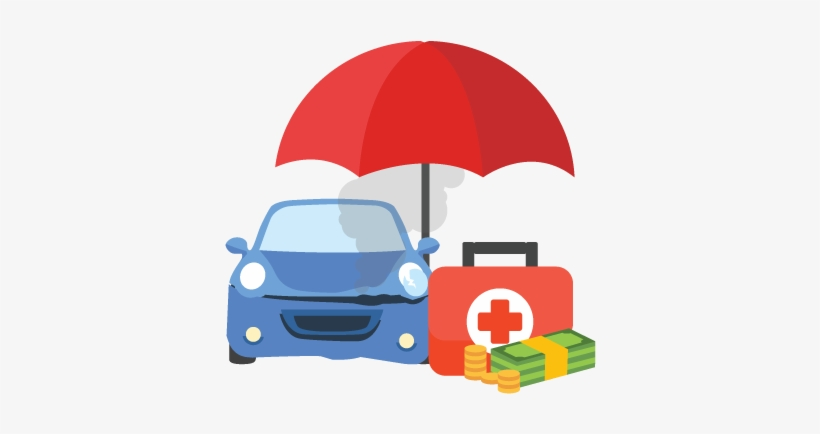

# Context 

An Insurance company that has provided Health Insurance to its customers now wants to obtain a model to predict whether their customers from the past year would also be interested in Vehicle Insurance provided by the same company.

**Useful terms:**

 > _An_ **insurance policy** _is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium._

 > _A_ **premium** _is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee._

As in case of the medical insurance, the vehicle insurance is where every year the customers need to pay a _premium_, a certain amount of money, for insurance to the insurance provider company, so that in case anything happens to the vehicle, the insurance provider company will provide a compensation to the customer.

The insurance company would benefit from building a model to predict who would be more interested in Vehicle insurance, as it would help them reach out in a more efficient way to the right category of customers, who would respons positively to such an insurance offer.

For building the prediction model to estimate if a customer would be interested in Vehicle insurance, a dataset is given with information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Data description

1. **id** =	Unique ID for the customer
2. **Gender** =	Gender of the customer
3. **Age** =	Age of the customer
4. **Driving_License** =	0 : Customer does not have DL, 1 : Customer already has DL
5. **Region_Code** =	Unique code for the region of the customer
6. **Previously_Insured** =	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. **Vehicle_Age** =	Age of the Vehicle
8. **Vehicle_Damage** =	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
9. **Annual_Premium** =	The amount customer needs to pay as premium in the year
10. **PolicySalesChannel** = Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. **Vintage** =	Number of Days, Customer has been associated with the company
12. **Response** =	1 : Customer is interested, 0 : Customer is not interested

# Task

The task is to **predict if a customer would be interested in Vehicle insurance** based on some previously collected data.

# Data Gathering

Load the data using the Pandas library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.base import clone
import csv
%tensorflow_version 2.x

train_data_file_path = "https://raw.githubusercontent.com/keresztesbeata/Intelligent-Systems-Lab/main/Health-Insurance-Cross-Sell-Prediction/train.csv"
test_data_file_path = "https://raw.githubusercontent.com/keresztesbeata/Intelligent-Systems-Lab/main/Health-Insurance-Cross-Sell-Prediction/test.csv"

train_data = pd.read_csv(train_data_file_path,on_bad_lines='skip')
test_data = pd.read_csv(test_data_file_path,on_bad_lines='skip')

We start by observing the description of the data:

In [2]:
train_data.describe().T

count           mean            std     min      25%  \
id                    381109.0  190555.000000  110016.836208     1.0  95278.0   
Age                   381109.0      38.822584      15.511611    20.0     25.0   
Driving_License       381109.0       0.997869       0.046110     0.0      1.0   
Region_Code           381109.0      26.388807      13.229888     0.0     15.0   
Previously_Insured    381109.0       0.458210       0.498251     0.0      0.0   
Annual_Premium        381109.0   30564.389581   17213.155057  2630.0  24405.0   
Policy_Sales_Channel  381109.0     112.034295      54.203995     1.0     29.0   
Vintage               381109.0     154.347397      83.671304    10.0     82.0   
Response              381109.0       0.122563       0.327936     0.0      0.0   

                           50%       75%       max  
id                    190555.0  285832.0  381109.0  
Age                       36.0      49.0      85.0  
Driving_License            1.0       1.0       1.0  
Region_Code               28.0      35.0      52.0  
Previously_Insured         0.0       1.0       1.0  
Annual_Premium         31669.0   39400.0  540165.0  
Policy_Sales_Channel     133.0     152.0     163.0  
Vintage                  154.0     227.0     299.0  
Response                   0.0       0.0       1.0

From the data description, we can observe the range of domain values for each feature, that is how many distinct values are present, what is the average, min or max value, below which values are 50% of the data, etc.
* Interesting to note here is that 75% of the people queried are less than 49 years old, middle-aged, and the min respectively the max ages are 20 and 85, so the survey mainly relates to the adults of the working class.
* Another interesting thing to note is that for everyone the vintage (nr of days the customer has been associated with the company) is less than a year, the max value is 299 days. So every customer of the insurance company is relatively new.
* Regarding the annual premium paid by each customer, the values are relatively close to each other, clustered around an average value of 30564.38, as the mean value shows. The max annual premium paid is 540165, but 75% of the customers pay less than 39400 a year, which is still close to the mean value. Therefore, the prices are relatively close to each other, only a few customers pay more than 39400.

Then, we are curious about the type of each feature and the number of non-null values:

Preview of the data and the data structure:

In [3]:
train_data.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Observations:**
- The dataset contains 381109 rows and 12 columns
- There are no Null values
- There are 5 categorical and 4 numerical features
- The dependent feature is the 'Response' column

# Data Visualization



In order to understand better the given data, we try to visualize the relationship between different features and how they affect the final response of the customer, by generating plots and graphs.

An initial look at the data with histograms:

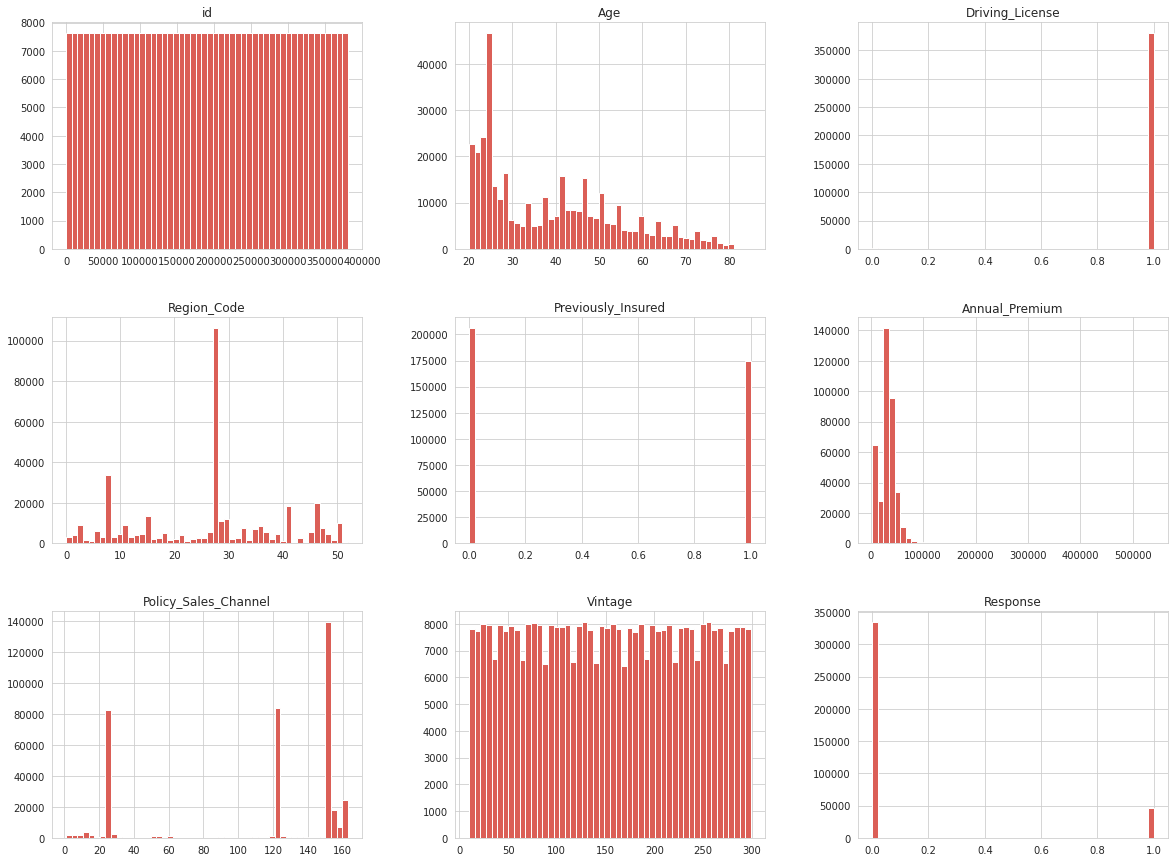

In [5]:
# make a copy of the initial dataset
train = train_data.copy()

# set a common style for the plots
sns.set_style("whitegrid")
sns.set_palette("hls",8)

# display the histogram chart for each feature
train.hist(bins=50, figsize=(20,15))
plt.show()

Taking a look at the target feature's distribution and the ratio of customers giving positive or negative response:

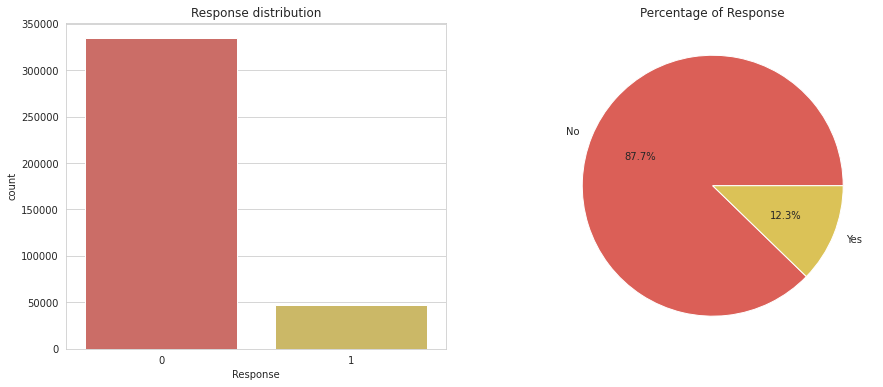

In [286]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
sns.countplot(x='Response', data=train,ax=ax1)
ax1.set_title('Response distribution')

ax2.pie(train['Response'].value_counts() ,autopct='%.1f%%', labels=['No', 'Yes'])
ax2.set_title('Percentage of Response')

plt.show()

> **Observations**:
* The responses of the customers to the vehicle insurance were predominantly negative, more than 87% answered with no.

The insurance company apparently needs a good strategy to convince more customers to have Vehicle insurance as well.

First, we study the features independently and their relationship with the target feature, Response, then by comparing it to other features.

## Categorical features

For the features which contain categories of values, we generate plots to visualize the partition of the data into distict categories. 
The category features are the following:
* Driving_License = {0, 1} (* show if the customer has a driving license *)
* Gender = {Male, Female}
* Vehicle_Age = {<1 year, 1-2 years, > 2 years}
* Vehicle_Damage = {No, Yes} (* shows whether or not the customer's car has been damaged before *)
* Previously_Insured = {0, 1} (* shows if the customer already had a car insurance before *)

* **Driving license**

First, we analyze the response of the customers relative to whether or not they own a driving license:

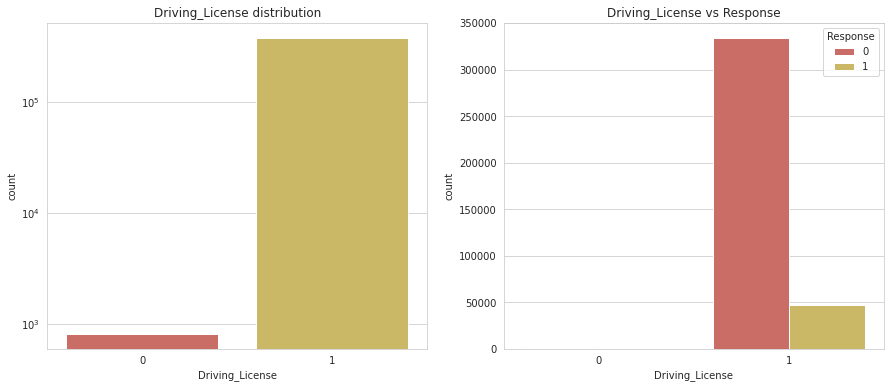

Nr of customers having a driving license:  380297
   vs Nr of customers having NO driving license:  812
Nr of positive responses customers having a driving license:  46669
Ratio of customers with a driving license responding positively: 0.1227 (12.27%) 


In [287]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Driving_License distribution')
g1 = sns.countplot(x=train.Driving_License, ax=ax1)
g1.set(yscale = "log")
ax2.set_title('Driving_License vs Response')
sns.countplot(x = 'Driving_License', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_drivers = len(train[train.Driving_License == 1])
nr_non_drivers = len(train[train.Driving_License == 0])
nr_positive_responses_drivers = len(train[(train.Driving_License == 1) & (train.Response == 1)])
ratio_of_positive_responses_drivers = nr_positive_responses_drivers/nr_drivers

print("Nr of customers having a driving license: " , nr_drivers)
print("   vs Nr of customers having NO driving license: " , nr_non_drivers)
print("Nr of positive responses customers having a driving license: " , nr_positive_responses_drivers)
print("Ratio of customers with a driving license responding positively: " + str(round(ratio_of_positive_responses_drivers,4)) + " (" + str(round(ratio_of_positive_responses_drivers * 100,2)) + "%) ")

> **Observations**:
* From the first plot, we can see that most of the customers have a driving license, which is as we would expect.
* What is more surprising, is the relatively small ratio of customers having a driving license, who responded positively to the possibilty of a car insurance, more precisely less than 13%. This would imply that having a driving license has little influence on the choice of the customer to pay for a car insurance.

* **Gender**

Next, we are curious to find out how the gender would affect the response of the customers:

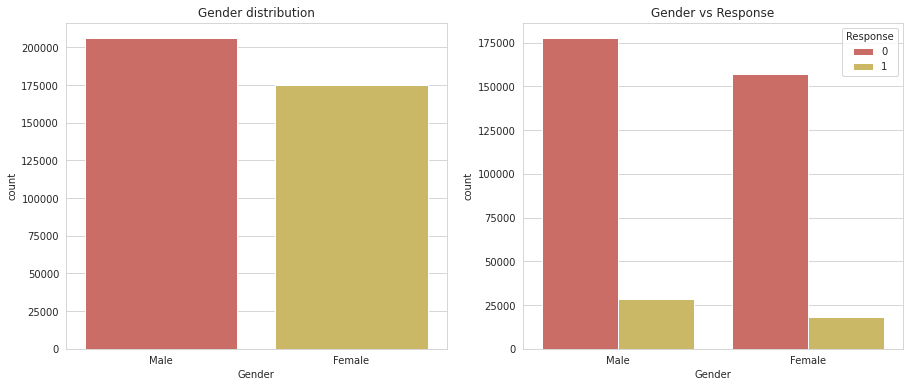

Nr of positive responses from male customers:  28525
Ratio of males responding positively: 0.1384 (13.84%) 
-------------------------------------------------------------------------------
Nr of positive responses from female customers:  18185
Ratio of females responding positively: 0.1039 (10.39%) 


In [288]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Gender distribution')
sns.countplot(x=train.Gender, ax=ax1)
ax2.set_title('Gender vs Response')
sns.countplot(x = 'Gender', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_male_customers = len(train[train.Gender == 'Male'])
nr_positive_responses_male = len(train[(train.Gender == 'Male') & (train.Response == 1)])
ratio_of_positive_responses_male = nr_positive_responses_male/nr_male_customers
print("Nr of positive responses from male customers: " , nr_positive_responses_male)
print("Ratio of males responding positively: " + str(round(ratio_of_positive_responses_male,4)) + " (" + str(round(ratio_of_positive_responses_male * 100,2)) + "%) ")
print("-------------------------------------------------------------------------------")

nr_female_customers = len(train[train.Gender == 'Female'])
nr_positive_responses_female = len(train[(train.Gender == 'Female') & (train.Response == 1)])
ratio_of_positive_responses_female = nr_positive_responses_female/nr_female_customers
print("Nr of positive responses from female customers: " , nr_positive_responses_female)
print("Ratio of females responding positively: " + str(round(ratio_of_positive_responses_female,4)) + " (" + str(round(ratio_of_positive_responses_female * 100,2)) + "%) ")

> **Observations**:
* As we can see, among the customers there is a fairly equal number of male and female, so the dataset is balanced from the point of view of the gender.
* Although for both genders, the number of responses is predomninantly negative, the Response of the customers related to the gender shows that the ratio of males responding positively is greater than the ratio of women. Therefore, it can be said that men are more interested in car insurance than women are.

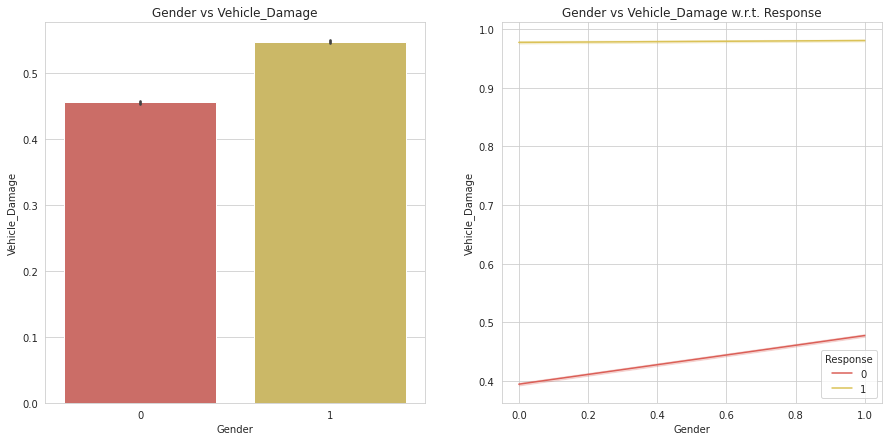

In [289]:
train_encoded = train.copy()
train_encoded['Gender'] = train_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
train_encoded['Vehicle_Damage'] = train_encoded['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,7))

sns.barplot(x='Gender', y='Vehicle_Damage',data=train_encoded,ax=ax1)
ax1.set_title('Gender vs Vehicle_Damage')
sns.lineplot(x='Gender', y='Vehicle_Damage',hue="Response",data=train_encoded,ax=ax2)
ax2.set_title('Gender vs Vehicle_Damage w.r.t. Response')

plt.show()

**Observations**:

*Gender vs Vehicle_Damage*: (positive correlation)

> The two plots show that:
* male customers had more damage to their vehicles than female customers;
* male customers with more damage to their cars responded more negatively to the insurance offer than female customers. However, the number of positive responses is similar independent of the gender.

Gender should be taken into consideration as well, because it positively influences Vehicle_Damage which has a strong positive correlation with Response.

* **Age of the vehicle**

Before analyzing the data related to the age of the vehicles, our initial intuition would be that as the age of the car increases, the interest of the customers for a car insurance also rises. This is due to the fact that older cars need more maintainance than newer models, for example, some parts get worn out or break down and need some replacement.

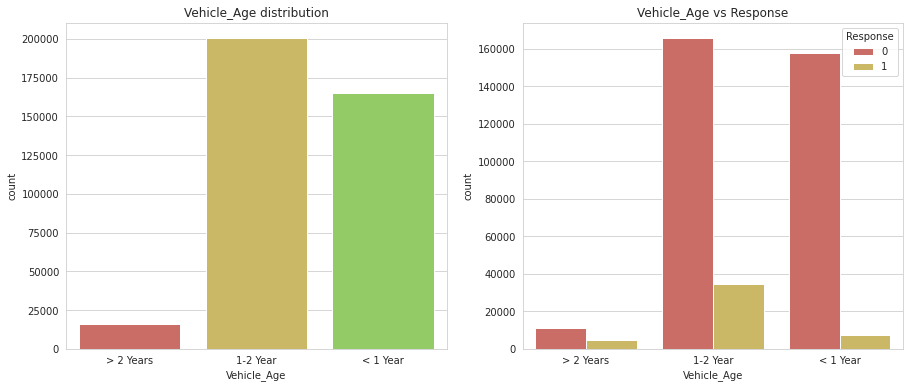

Nr of customers with vehicles of age < 1 Year:  164786
Nr of positive responses from customers with vehicles of age < 1 Year:  7202
Ratio of customers with cars < 1 Year of age responding positively: 0.0437 (4.37%) 
----------------------------------------------------------------------------------------
Nr of customers with vehicles of age 1-2 Year:  200316
Nr of positive responses from customers with vehicles of age 1-2 Year:  34806
Ratio of customers with cars 1-2 Year of age responding positively: 0.1738 (17.38%) 
----------------------------------------------------------------------------------------
Nr of customers with vehicles of age > 2 Years:  16007
Nr of positive responses from customers with vehicles of age > 2 Year:  4702
Ratio of customers with cars > 2 Years of age responding positively: 0.2937 (29.37%) 
----------------------------------------------------------------------------------------


In [290]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Vehicle_Age distribution')
sns.countplot(x=train.Vehicle_Age, ax=ax1)
ax2.set_title('Vehicle_Age vs Response')
sns.countplot(x = 'Vehicle_Age', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_new_vehicles = len(train[train.Vehicle_Age == '< 1 Year'])
nr_positive_responses_new_vehicles = len(train[(train.Vehicle_Age == '< 1 Year') & (train.Response == 1)])
ratio_of_positive_responses_new_vehicles = nr_positive_responses_new_vehicles/nr_new_vehicles

print("Nr of customers with vehicles of age < 1 Year: ", nr_new_vehicles)
print("Nr of positive responses from customers with vehicles of age < 1 Year: " , nr_positive_responses_new_vehicles)
print("Ratio of customers with cars < 1 Year of age responding positively: " + str(round(ratio_of_positive_responses_new_vehicles,4))  + " (" + str(round(ratio_of_positive_responses_new_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")

nr_young_vehicles = len(train[train.Vehicle_Age == '1-2 Year'])
nr_positive_responses_nr_young_vehicles = len(train[(train.Vehicle_Age == '1-2 Year') & (train.Response == 1)])
ratio_of_positive_responses_young_vehicles = nr_positive_responses_nr_young_vehicles/nr_young_vehicles
print("Nr of customers with vehicles of age 1-2 Year: ", nr_young_vehicles)
print("Nr of positive responses from customers with vehicles of age 1-2 Year: " , nr_positive_responses_nr_young_vehicles)
print("Ratio of customers with cars 1-2 Year of age responding positively: " + str(round(ratio_of_positive_responses_young_vehicles,4)) + " (" + str(round(ratio_of_positive_responses_young_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")

nr_old_vehicles = len(train[train.Vehicle_Age == '> 2 Years'])
nr_positive_responses_old_vehicles = len(train[(train.Vehicle_Age == '> 2 Years') & (train.Response == 1)])
print("Nr of customers with vehicles of age > 2 Years: ", nr_old_vehicles)
print("Nr of positive responses from customers with vehicles of age > 2 Year: " , nr_positive_responses_old_vehicles)
ratio_positive_responses_old_vehicles = nr_positive_responses_old_vehicles/nr_old_vehicles
print("Ratio of customers with cars > 2 Years of age responding positively: " + str(round(ratio_positive_responses_old_vehicles,4)) + " (" + str(round(ratio_positive_responses_old_vehicles * 100,2)) + "%) ")
print("----------------------------------------------------------------------------------------")


> **Observations**:
* Most of the customers had relatively new cars with ages between 1-2 years.
* Among the customers with new cars, with age less than 1 year, only a very small ratio, less than 5%, was interested in car insurance. Which is understandable as new cars are not supposed to break down very easily or need their parts replaced, however they are just as much at risk of being damaged in an accident or by some natural hazard, such as hail.
* As the age of the car increases, the ratio of customers opting for a car insurance also increases, as it is shown in the case of the cars with age greater than 2 years. Although, the nr of older cars (age > 2 Years) is more than 10% smaller than the nr of new cars (age < 1 Year), the ratio of customers interested in a car insurance is almost 30%.
* This clearly indicates that the customers having older cars are more interested in having an insurance for their cars.

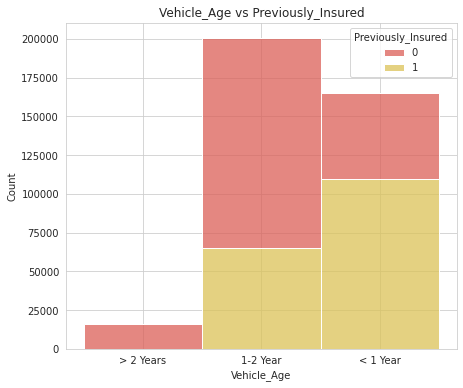

In [291]:
plt.figure(figsize=(7,6))

sns.histplot(binwidth=0.5, hue="Previously_Insured", 
                 x="Vehicle_Age", data=train, 
                 stat="count", multiple="stack")
plt.title("Vehicle_Age vs Previously_Insured")
plt.show()

> **Observations**:
* *Vehicle_Age vs Previously_Insured*: Customers having new vehicles, of age less than 1 year, are more likely to have had an insurance previously, while customer with older vehicles are less likely to have been insured before.

* **Vehicle damage**

We would expect that people who once had their cars damaged would be more interested in a car insurance, in case the same would happen to them in the future.

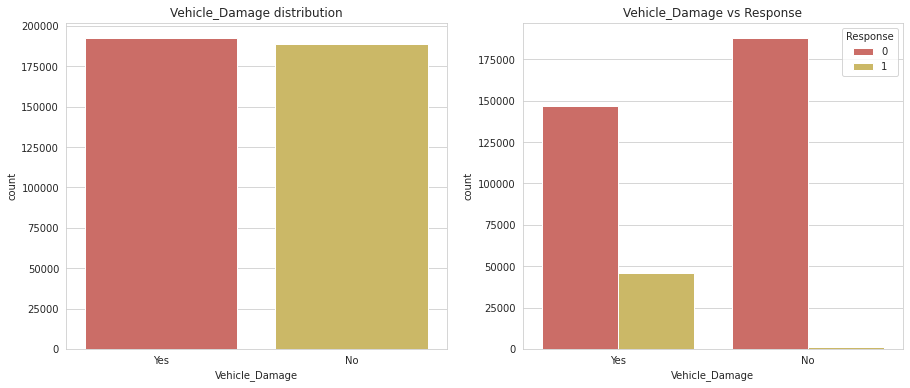

Nr of customers having their vehicles previously damaged:  192413
   vs Nr of customers having no previous damage to their vehicles:  188696
Nr of POSITIVE responses of customers having their vehicles previously damaged:  45728
   vs Nr of NEGATIVE responses of customers having their vehicles previously damaged:  146685
Ratio of customers, having their vehicles previously damaged, who responded positively: 0.2377 (23.77%) 


In [292]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Vehicle_Damage distribution')
sns.countplot(x=train.Vehicle_Damage, ax=ax1)
ax2.set_title('Vehicle_Damage vs Response')
sns.countplot(x = 'Vehicle_Damage', hue = 'Response', data = train,ax=ax2)
plt.show()

nr_damaged_vehicles = len(train[train.Vehicle_Damage == 'Yes'])
nr_not_damaged_vehicles = len(train[train.Vehicle_Damage == 'No'])
nr_positive_responses_damaged_vehicles = len(train[(train.Vehicle_Damage == 'Yes') & (train.Response == 1)])
nr_negative_responses_damaged_vehicles = len(train[(train.Vehicle_Damage == 'Yes') & (train.Response == 0)])
ratio_of_positive_responses_damaged_vehicles = nr_positive_responses_damaged_vehicles/nr_damaged_vehicles

print("Nr of customers having their vehicles previously damaged: ", nr_damaged_vehicles)
print("   vs Nr of customers having no previous damage to their vehicles: ", nr_not_damaged_vehicles)
print("Nr of POSITIVE responses of customers having their vehicles previously damaged: ", nr_positive_responses_damaged_vehicles)
print("   vs Nr of NEGATIVE responses of customers having their vehicles previously damaged: ", nr_negative_responses_damaged_vehicles)
print("Ratio of customers, having their vehicles previously damaged, who responded positively: "+ str(round(ratio_of_positive_responses_damaged_vehicles,4)) + " ("+ str(round(ratio_of_positive_responses_damaged_vehicles * 100,2)) + "%) ")

> **Observations**:
* As the figures show, among the customers, around half of them had their cars previously damaged.
* From the ones who already had some damage to their cars in the past, more than 23% have responded affirmatively to the option of having a car insurance, which shows:
  * First, that customers who already know the expenses of repairing a damaged car, are appreciating more the possibility of an insurance on their vehicles, to prevent future costs.
  * Second, that previous damage to the vehicle has more influence on the response of the customers than having a driving license.
* Another remark, is that on the second plot it seems that customers who had no previous damage to their cars all responded negatively to the offer of a car insurance, however after a closer look to the numbers, we can see that there are still a few people who would like to have an insurance on their cars even though they haven't suffered damage before.

In [293]:
nr_positive_responses_not_damaged_vehicles = len(train[(train.Vehicle_Damage == 'No') & (train.Response == 1)])
nr_negative_responses_not_damaged_vehicles = len(train[(train.Vehicle_Damage == 'No') & (train.Response == 0)])
print("Nr of POSITIVE responses of customers having no previous damage to their vehicles: ", nr_positive_responses_not_damaged_vehicles)
print("Nr of NEGATIVE responses of customers having no previous damage to their vehicles: ", nr_negative_responses_not_damaged_vehicles)

Nr of POSITIVE responses of customers having no previous damage to their vehicles:  982
Nr of NEGATIVE responses of customers having no previous damage to their vehicles:  187714


This means that the scale of the nr of customers with previous vehicle damage and the nr of customers with positive response doesn't match. This can be corrected however, by using a logarithmic scale for the nr of responses.

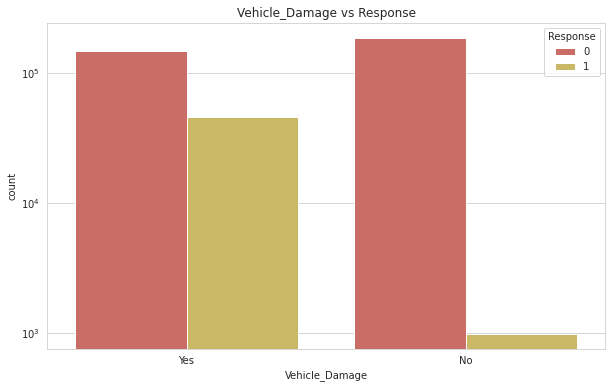

In [294]:
plt.figure(figsize=(10,6))
plt.title('Vehicle_Damage vs Response')
g = sns.countplot(x = 'Vehicle_Damage', hue = 'Response', data = train)
g.set(yscale="log")
plt.show()

##### _Vehicle_Damage vs other features_

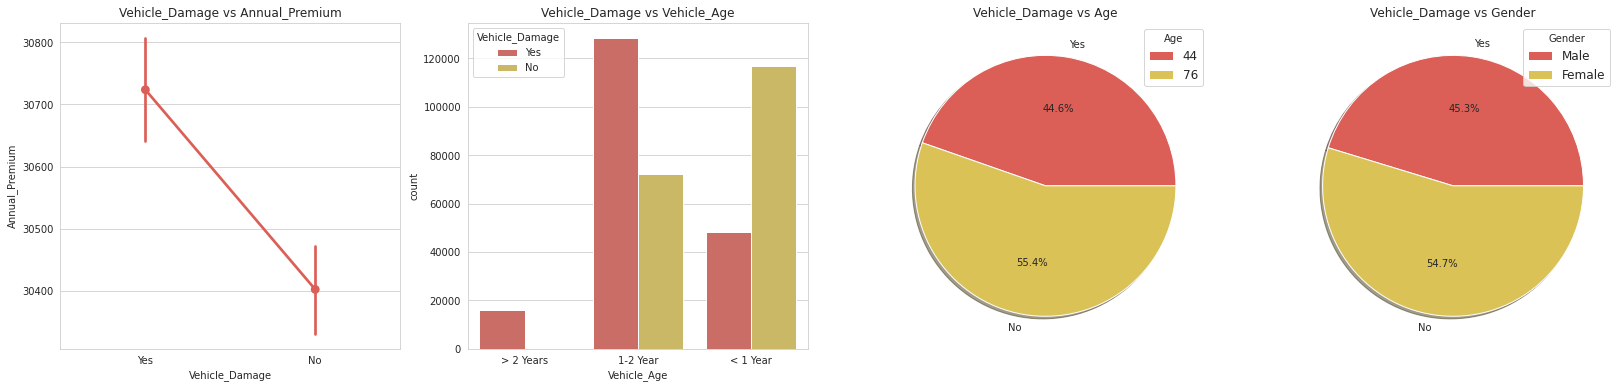

In [323]:
fig, axes = plt.subplots(1,4, figsize=(28,6))

sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium', data = train,ax=axes[0])
axes[0].set_title('Vehicle_Damage vs Annual_Premium')

# transform Vehicle_Age to numerical value to be able to represent it
vehicle_age_encoded = train.copy()
vehicle_age_encoded['Vehicle_Age'] = vehicle_age_encoded['Vehicle_Age'].apply(lambda x: 0 if x == "< 1 Year" else 1 if x == "1-2 Year" else 2)

sns.countplot(hue = 'Vehicle_Damage', x = 'Vehicle_Age', data = train,ax=axes[1])
axes[1].set_title('Vehicle_Damage vs Vehicle_Age')

axes[2].pie( x= train.groupby('Vehicle_Damage')['Age'].mean(), 
            labels=train['Vehicle_Damage'].unique(), autopct='%1.1f%%', 
            shadow=True)
axes[2].set_title('Vehicle_Damage vs Age')
axes[2].legend(labels=train['Age'].unique(), title = "Age", 
           fontsize = 'large', title_fontsize = "10")

# transform gender to numerical value to be able to represent it
gender_encoded = train.copy()
gender_encoded['Gender'] = gender_encoded['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

axes[3].pie( x= gender_encoded.groupby('Vehicle_Damage')['Gender'].sum(), 
            labels=gender_encoded['Vehicle_Damage'].unique(), autopct='%1.1f%%', 
            shadow=True)
axes[3].set_title('Vehicle_Damage vs Gender')
axes[3].legend(labels=train['Gender'].unique(), title = "Gender", 
           fontsize = 'large', title_fontsize = "10")

plt.show()

> **Observations**:
* _Vehicle_Damage vs Annual_Premium_: Those who had damaged vehicles before have to pay a higher amount for Annual Premium.
* _Vehicle_Damage vs Vehicle_Age_: Newer cars, with age < 1 Year, were less likely to have damage to them, while the cars with ages 1-2 Years were the most likely to have had some damage to them before.
* _Vehicle_Damage vs Age_: Older Customers were more likely to have had damaged cars before than younger customers.
* _Vehicle_Damage vs Gender_: More female customers had damage to their cars before than male customers.

* **Previous insurance**



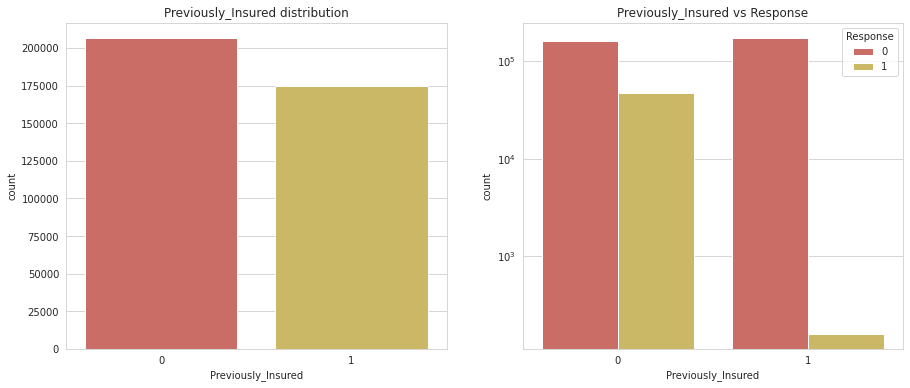

Nr of customers having previously insured:  174628
   vs Nr of customers having NO previous insurance:  206481
Nr of positive responses from customers having previously insured:  158
   vs Nr of positive responses from customers having NO previous insurance:  46552
Ratio of customers having previously insured and responding positively: 0.0009 (0.09%) 


In [324]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Previously_Insured distribution')
sns.countplot(x=train.Previously_Insured, ax=ax1)
ax2.set_title('Previously_Insured vs Response')
g = sns.countplot(x = 'Previously_Insured', hue = 'Response', data = train,ax=ax2)
g.set(yscale="log")
plt.show()

nr_prev_insured = len(train[train.Previously_Insured == 1])
nr_not_prev_insured = len(train[train.Previously_Insured == 0])
nr_positive_responses_prev_insured = len(train[(train.Previously_Insured == 1) & (train.Response == 1)])
nr_positive_responses_not_prev_insured = len(train[(train.Previously_Insured == 0) & (train.Response == 1)])
ratio_of_positive_responses_prev_insured = nr_positive_responses_prev_insured/nr_prev_insured

print("Nr of customers having previously insured: " , nr_prev_insured)
print("   vs Nr of customers having NO previous insurance: ", nr_not_prev_insured)
print("Nr of positive responses from customers having previously insured: " , nr_positive_responses_prev_insured)
print("   vs Nr of positive responses from customers having NO previous insurance: " , nr_positive_responses_not_prev_insured)
print("Ratio of customers having previously insured and responding positively: " + str(round(ratio_of_positive_responses_prev_insured,4)) + " (" + str(round(ratio_of_positive_responses_prev_insured * 100,2)) + "%) ")

> **Observations**:
* As we can see, around half of the customers have had a car insurance before, but only 9 out of 10000 of them would like to have an insurance on their vehicles in the future as well. On the other side, from the customers who did not have a car insurance previously, half of them responded positively.
* This means, that having had a car insurance previously doesn't increase the number of positive responses directly, however it could have a larger impact on the Responses of the customers if analyzed in combination with the Vehicle_Damage or the Vehicle_Age features.

##### _Previously_Insured vs other features_

We would expect that, customers having had a car insurance previously would like to extend their insurance contract if they have a very old car or if they have had some damage to their vehicles, in which cases an insurance would seem very advantageous to them. 

Therefore, aside from analyizing the data of having a previous insurance relative to the positive response of the customers, it would also seem interesting to compare it against the age of the vehicle and the previous damage, to see if these combined would increase the number of positive responses or not.

Previously_Insured vs Vehicle_Damage


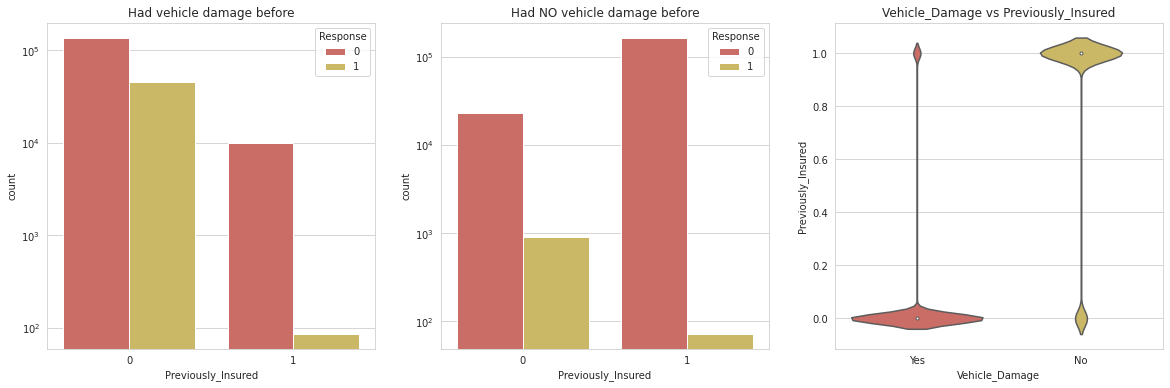

In [325]:
vehicle_damage = train[train.Vehicle_Damage == 'Yes']
no_vehicle_damage = train[train.Vehicle_Damage == 'No']

print("Previously_Insured vs Vehicle_Damage")

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))

g1 = sns.countplot(x = 'Previously_Insured', hue = 'Response', data=vehicle_damage, ax = ax1)
g1.set(yscale="log")
ax1.set_title('Had vehicle damage before')

g2 = sns.countplot(x = 'Previously_Insured', hue = 'Response', data=no_vehicle_damage, ax = ax2)
g2.set(yscale="log")
ax2.set_title('Had NO vehicle damage before')

sns.violinplot(y='Previously_Insured', x='Vehicle_Damage',data=train,ax=ax3)
ax3.set_title('Vehicle_Damage vs Previously_Insured')

plt.show()

> **Observations**:
* From the first 2 plots, we can see that those who had NOT been previously insured but had suffered damage to their vehicles are more interested in a car insurance, than those who also have NOT been previously insured but had no damage to their cars yet, which is a reasonable outcome.
* *Previously_Insured vs Vehicle_Damage*: Those who have not been previously insured and had their cars damaged in the past, would be more interested in a car insurance than those, who had an insurance before but their car was not damaged. 

Next, we analyze the Previously_Insured w.r.t. Vehicle_Age:

Previously_Insured vs Vehicle_Age


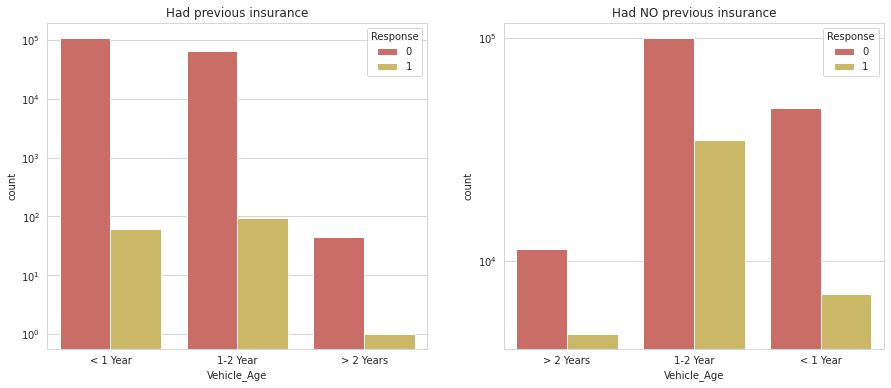

In [326]:
prev_insurance = train[train.Previously_Insured == 1]
no_prev_insurance = train[train.Previously_Insured == 0]

print("Previously_Insured vs Vehicle_Age")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.set_title('Had previous insurance')
g1 = sns.countplot(x = 'Vehicle_Age', hue = 'Response', data=prev_insurance, ax = ax1)
g1.set(yscale="log")
ax2.set_title('Had NO previous insurance')
g2 = sns.countplot(x = 'Vehicle_Age', hue = 'Response', data=no_prev_insurance, ax = ax2)
g2.set(yscale="log")
plt.show()

> **Observations**:
* From the plots, we can conclude that among the customers with vehicles of ages between 1-2 years, those who had no previous insurance were more interested in having an insurance in the future, than those who already owned one. 
* Interesting to note that the customers owning newer cars, of less than 1 year, or older ones, of more than 2 years, were much less likely to have an insurance in the future, regardless of whether they had one before or not.

## Numerical features

Next, for the features containing numerical values we generate distribution plots to analyze the influence of these values on the final response of the customers.

Numerical feautures are:
* Age: between 20 to 85 years
* Annual_Premium: how much the customer has to pay for insurance in a year, ranges between 2630.0	to max 540165.0
* Vintage: how long the customer has been associated with the insurance company, ranges between 10 to 299 days
* Policy_Sales_Channel: 163 distinct channels, encoded anonyomously, which represent the communication channel on which the customer can be reached, for ex. phone, mail, webpage announcement, etc.
* Region_Code: between 0 to 52, which represent the encoding of the region where the customer lives

#### **Age**

First, we look at how the age influences the choice of the customer of opting for a car insurance:

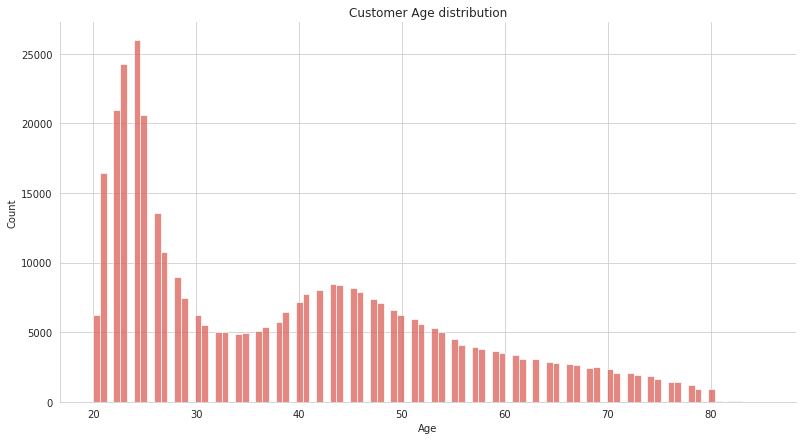

In [327]:
sns.displot(x = 'Age', data = train, height = 6, aspect=15/8)
plt.title('Customer Age distribution')
plt.show()

As we can see the ages are quite varying, but there are some clusters around specific ranges, therefore we can distinguish 3 age groups:
* young: 20-30
* middle-aged: 30-50
* old: 50-80

Interesting to note that most of the customers are young, with ages between 20-30 years, or middle aged, between 30-50 years, representing the working class.

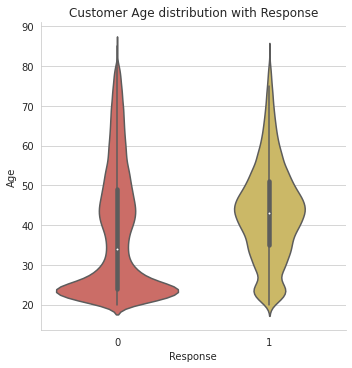

In [328]:
sns.catplot(x="Response", y='Age', data=train, kind="violin")
plt.title("Customer Age distribution with Response")
plt.show()

In [329]:
 # categorize the 'Age' feature
train['Age_Group'] = train['Age'].apply(lambda x:'Young' if x<30 else 'MiddleAged' if x<50 else 'Old')

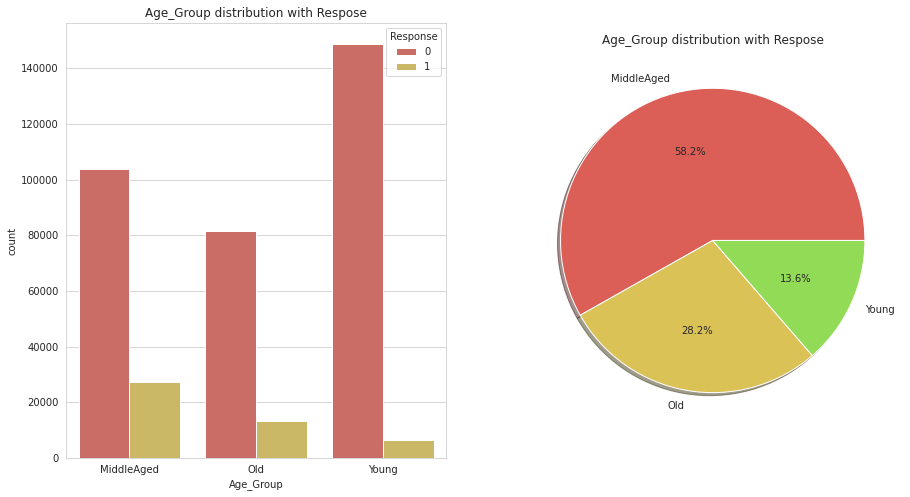

In [330]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(x = 'Age_Group', data = train, hue='Response',ax=ax1)
ax1.set_title("Age_Group distribution with Respose")

ax2.pie( x= train.groupby('Age_Group')['Response'].sum(), 
            labels=train['Age_Group'].unique(), autopct='%1.1f%%', 
            shadow=True)
ax2.set_title("Age_Group distribution with Respose")

plt.show()

> Looking at the above plot and analyzing the Responses relative to the ages of the customers we find out that *Middle-Aged* customers with ages between 30-50 years, and *Older* customers above the age of 50, had the majority of positive responses, which means they were more interested in having a car insurance, than *Young* customers with ages between 20-30.

In [331]:
nr_young = len(train[train.Age_Group == 'Young'])
nr_positive_responses_young = len(train[(train.Age_Group == 'Young') & (train.Response == 1)])
ratio_of_positive_responses_young = nr_positive_responses_young/nr_young

print("Nr of young customers: " , nr_young)
print("Nr of positive responses from young customers: " , nr_positive_responses_young)
print("Ratio of positive responses from young customers: " ,  str(round(ratio_of_positive_responses_young,4)) + " (" + str(round(ratio_of_positive_responses_young * 100,2)) + "%) ")
print("--------------------------------------------------------------------------------------------------------")

nr_middle_aged = len(train[train.Age_Group == 'MiddleAged'])
nr_positive_responses_middle_aged = len(train[(train.Age_Group == 'MiddleAged') & (train.Response == 1)])
ratio_of_positive_responses_middle_aged = nr_positive_responses_middle_aged/nr_middle_aged

print("Nr of middleAged customers: " , nr_middle_aged)
print("Nr of positive responses from middleAged customers: " , nr_positive_responses_middle_aged)
print("Ratio of positive responses from middleAged customers: " ,  str(round(ratio_of_positive_responses_middle_aged,4)) + " (" + str(round(ratio_of_positive_responses_middle_aged * 100,2)) + "%) ")
print("--------------------------------------------------------------------------------------------------------")

nr_old = len(train[train.Age_Group == 'Old'])
nr_positive_responses_old = len(train[(train.Age_Group == 'Old') & (train.Response == 1)])
ratio_of_positive_responses_old = nr_positive_responses_old/nr_old

print("Nr of old customers: " , nr_old)
print("Nr of positive responses from old customers: " , nr_positive_responses_old)
print("Ratio of positive responses from old customers: " ,  str(round(ratio_of_positive_responses_old,4)) + " (" + str(round(ratio_of_positive_responses_old * 100,2)) + "%) ")
print("--------------------------------------------------------------------------------------------------------")

Nr of young customers:  155203
Nr of positive responses from young customers:  6374
Ratio of positive responses from young customers:  0.0411 (4.11%) 
--------------------------------------------------------------------------------------------------------
Nr of middleAged customers:  131099
Nr of positive responses from middleAged customers:  27175
Ratio of positive responses from middleAged customers:  0.2073 (20.73%) 
--------------------------------------------------------------------------------------------------------
Nr of old customers:  94807
Nr of positive responses from old customers:  13161
Ratio of positive responses from old customers:  0.1388 (13.88%) 
--------------------------------------------------------------------------------------------------------


> Comparing the ratio of positive and negative responses per age category, our the calculations show, that 4% of the younger customers wanted a car insurance, 20% of the middle aged ones, and 13% of the retired customers. From here, we can conclude that the insurance in the vehicle is more popular among the middle-aged and older generations, and young customers had the most negative answers.

This tells us, that age indeed, represents an important factor in determining whether or not a customer would be interested in a car insurance.

##### _Age vs other features_

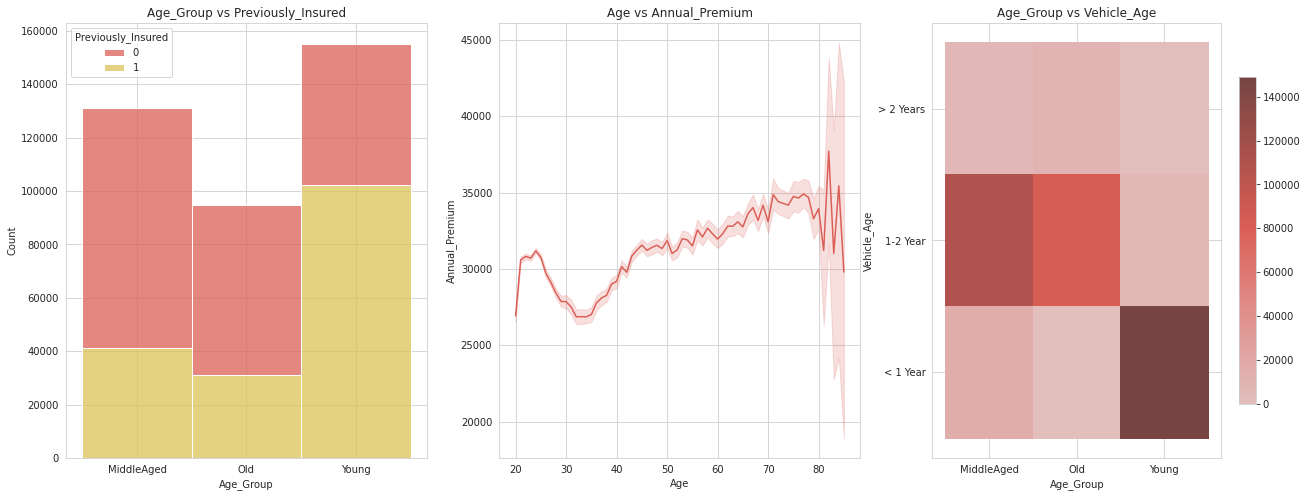

In [332]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(22,8))

sns.histplot(binwidth=0.5, x="Age_Group", hue="Previously_Insured", stat="count", multiple="stack", data=train,ax=ax1)
ax1.set_title("Age_Group vs Previously_Insured")

sns.lineplot(x="Age",y="Annual_Premium",data=train, ax = ax2)
ax2.set_title("Age vs Annual_Premium")

sns.histplot(x="Age_Group",y="Vehicle_Age",data=train,  cbar=True, cbar_kws=dict(shrink=.75), ax = ax3)
ax3.set_title("Age_Group vs Vehicle_Age")

plt.show()

**Observations**:
* *Age_Group vs Previously_Insured*:Younger customers were more likely to have had a previous insurance, while MiddleAged and Old customers had not.
* *Age vs Annual_Premium*: Younger customer with ages between 20-30, are more likely to pay a larger sum for insurance, as well as those with ages 50-80. The customers with ages between 30-40 are paying the least amount for annual premium.
* *Age_Group vs Vehicle_Age*:  Younger customers had newer cars, with age < 1 year, MiddleAged customers had mainly cars of 1-2 years and Old customers had rather older cars than 2 years. This shows that older generations were more likely to own also older vehicles.

#### **Annual premium**

The annual premium paid for insurance should be measured against the income of a person, but in this case we do not have data about how much the customers earn. 

As an initial guess, we would assume that those who already pay very much for an insurance would be less interested in having a car insurance, than those who pay a reasonable amount.

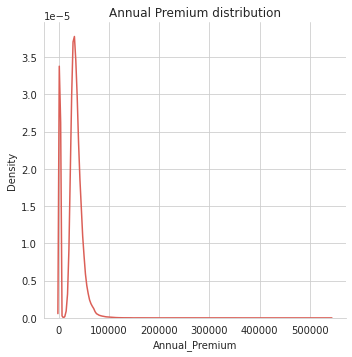

In [333]:
sns.displot(train.Annual_Premium, kind="kde", common_norm=False)
plt.title('Annual Premium distribution')
plt.show()

From the above plot, we can see that there are some values which lie very much outside the common range of values, which distort the plot as well, the figure appearing strongly right-skewed.

In [334]:
UpperLimit = 2.5 * train['Annual_Premium'].quantile(0.75) - 1.5 * train['Annual_Premium'].quantile(0.25)
# remove outlier values based on the previously computed UpperLimit
train['Annual_Premium_Treated'] = np.where(train['Annual_Premium']>UpperLimit, UpperLimit, train['Annual_Premium'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


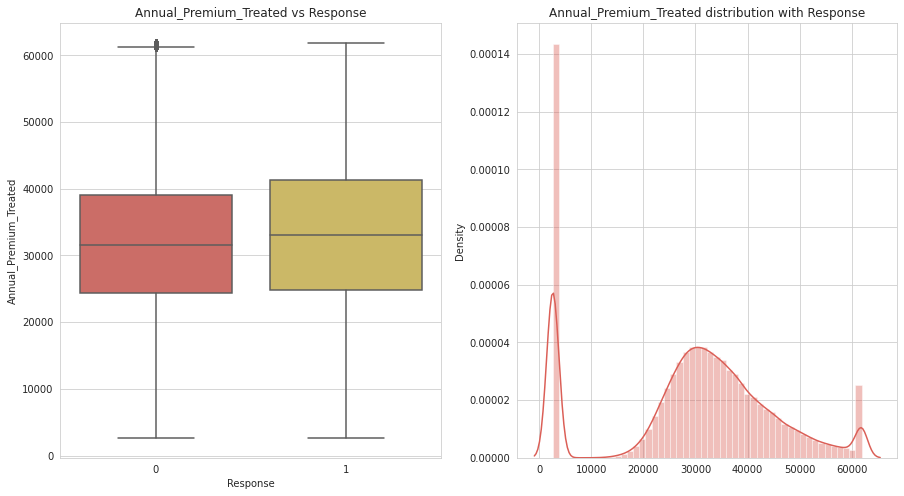

In [335]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(ax = ax1, y = 'Annual_Premium_Treated',x = 'Response', data = train)
ax1.set_title("Annual_Premium_Treated vs Response")

sns.distplot(ax = ax2, x = train['Annual_Premium_Treated'])
ax2.set_title("Annual_Premium_Treated distribution with Response")

plt.show()

> After removing the outlier values and rescaling the range of values, we observe form the plots that most of the people pay around the same amount of Annual Premium, and the responses were also balanced for those who pay a fairly similar amount for Annual Premium, therefore, it doesn't influence the customer's response as much as one would expect.

##### *Annual_Premium_Treated vs other features*

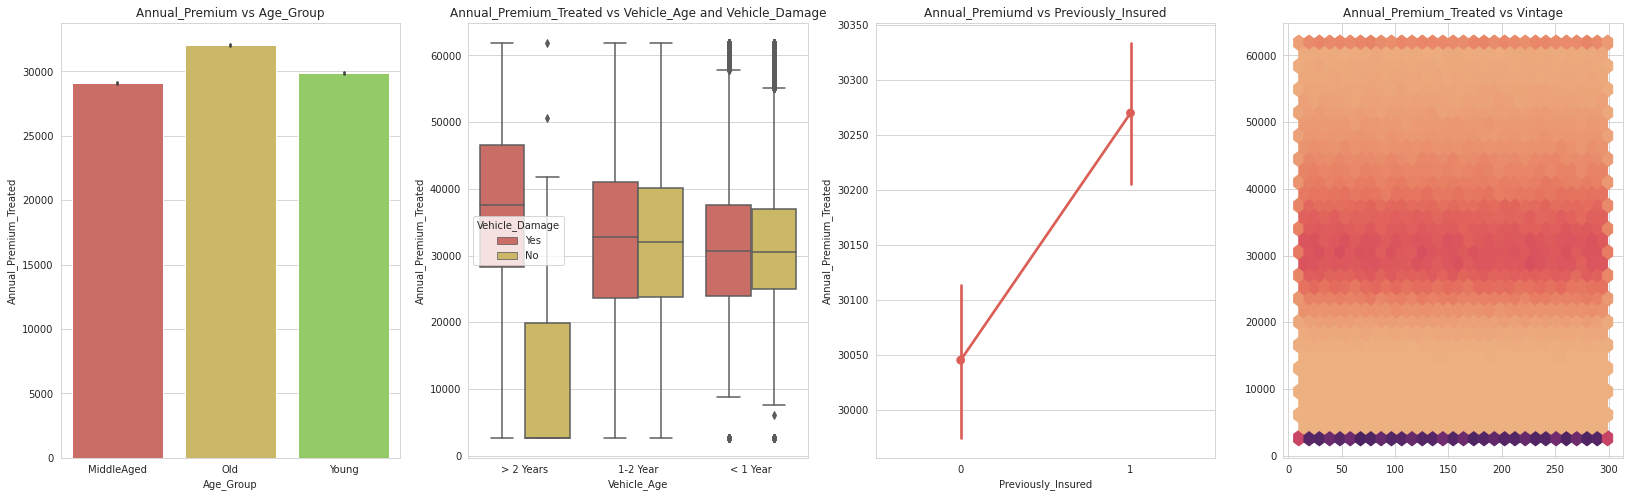

In [336]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(28,8))

sns.barplot(x = 'Age_Group',y = 'Annual_Premium_Treated', data= train, ax=ax1)
ax1.set_title("Annual_Premium vs Age_Group")

sns.boxplot( x = 'Vehicle_Age', y = 'Annual_Premium_Treated', hue = 'Vehicle_Damage', data=train ,ax=ax2)
ax2.set_title("Annual_Premium_Treated vs Vehicle_Age and Vehicle_Damage")

sns.pointplot(x="Previously_Insured",y="Annual_Premium_Treated",data=train, ax = ax3)
ax3.set_title("Annual_Premiumd vs Previously_Insured")

ax4.hexbin(x="Vintage", y="Annual_Premium_Treated", data=train, gridsize = 30, cmap='flare')
ax4.set_title("Annual_Premium_Treated vs Vintage")

plt.show()

> **Observations**:
* *Annual_Premium_Treated vs Age_Group*: it seems that _Old_ customers have to pay the most for annual premium, and _MiddleAged_ customers pay less.
* *Annual_Premium_Treated vs Vehicle_Age and Vehicle_Damage*: Customers with cars older than 2 years with no previous damage pay the smallest amount of annual premium, while those who have older cars which have been damaged before, pay the largest amount. Customers with newer cars pay roughly the same amount for Annual premium, independent of whether the car has been damaged before or not.
* *Annual_Premium_Treated vs Previously_Insured*: it seems that customers who have been previously insured have to pay more for Annual premium than those who have not been insured before.
* *Annual_Premium_Treated vs Vintage*: The majority of the customers pay the same amount of money for annual insurance, an average value, independent of their vintage.

#### **Vintage**

As it shows in the plot below, the Vintage value is equally dispersed among the customers, meaning that there are customers who joined the company only recently, or those who have been associated with the insurance company from longer ago. No customer has been associated with the company for more than a year, which means all of them are relatively new customers.

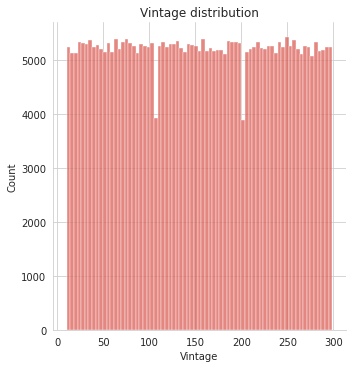

In [337]:
sns.displot(x = train['Vintage'])
plt.title("Vintage distribution")
plt.show()

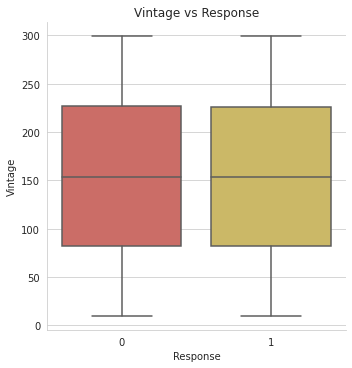

In [338]:
sns.catplot(y = 'Vintage',x = 'Response', data = train, kind="box")
plt.title("Vintage vs Response")
plt.show()

Analyzing the response of the customers relative to their vintage, we can see that the vintage value is between 100-230 for the majority of them, and their responses are divided equally. Therefore, the Vintage is not so relevant for the Response feature.

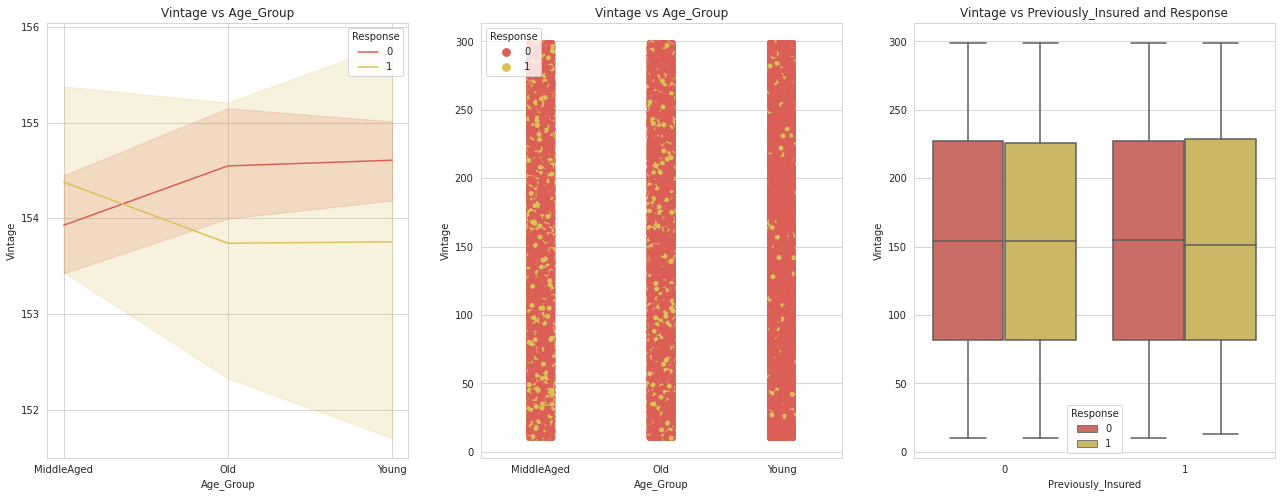

In [339]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(22,8))

sns.lineplot( x="Age_Group", y="Vintage", hue = 'Response', data=train,ax=ax1)
ax1.set_title("Vintage vs Age_Group")

sns.stripplot( x="Age_Group", y="Vintage", hue = 'Response', data=train,ax=ax2)
ax2.set_title("Vintage vs Age_Group")

sns.boxplot( x = 'Previously_Insured', y = 'Vintage', hue = 'Response', data=train ,ax=ax3)
ax3.set_title("Vintage vs Previously_Insured and Response")

plt.show()

> **Observations**:
*  *Vintage vs Age_Group*: MiddleAged customers who have been associated with the company for longer (have higher Vintage) also have the most positive responses, while Young customers who have been associated with the insurance company for longer had the most negative responses.
* *Vintage vs Previously_Insured*: The Vintage value of the customers doesn't affect the Previously_Insured and Response features, as we can see for both insured and not insured customers, the responses were equally distributed.

* **Region_Code**

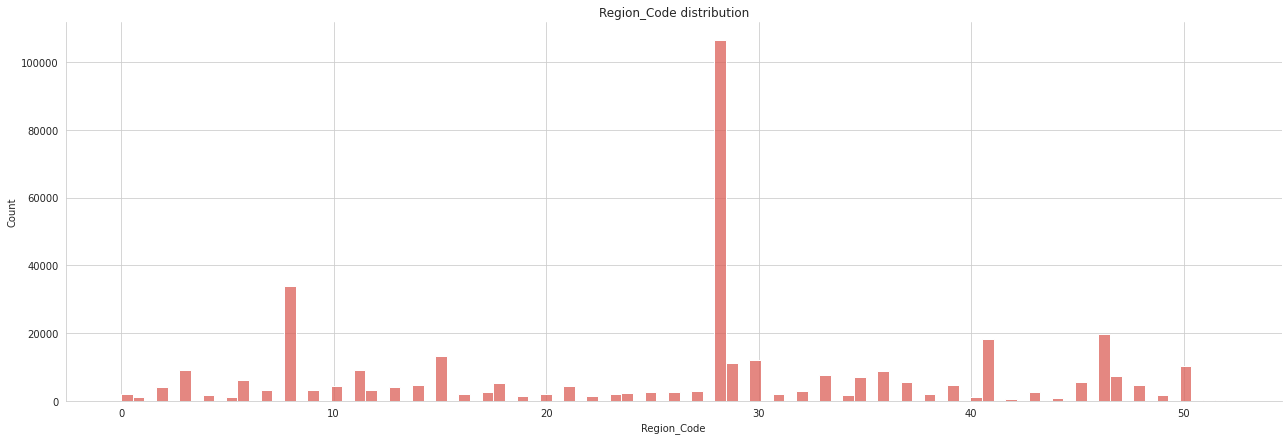

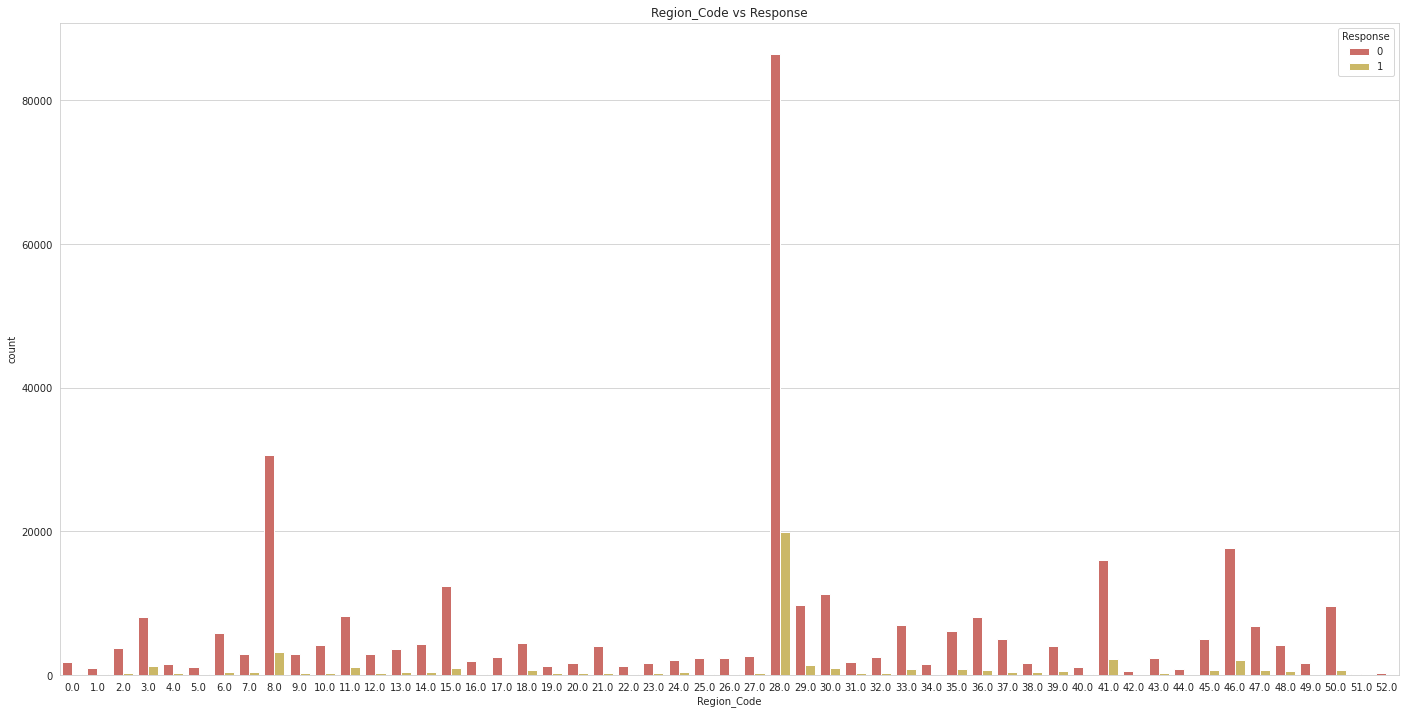

In [340]:
sns.displot(x = train['Region_Code'], height = 6, aspect=3)
plt.title("Region_Code distribution")
plt.show()

plt.figure(figsize=(24,12))
plt.title("Region_Code vs Response")
sns.countplot(x = "Region_Code" ,hue = "Response" , data = train )
plt.show()

In [341]:
positive_responses = len(train[(train["Region_Code"] == 28) & (train["Response"] == 1)])
all_responses = len(train[train["Region_Code"] == 28])
print(positive_responses/all_responses)

0.18716346379739698


> **Observations**:
* The highest number of positive responses came from customers from region 28, but also the most negative responses came from the same region.
* However, as for positive vs negative responses ratio, the leading region remains 28, with a ratio of 0.18 in favour of positive responses.

From the above plot, we can see that there appear to be region codes from of every value between the rage 0-52.

Therefore, we can distinguish 3 categories for the region codes:

* Region_A: representing those regions from where more than 100000 customers come
* Region_B: those regions belong here which have between 10000 and 35000 customers
* Region_C: regions with less than 10000 customers.

In [342]:
# Categorizing Region Code feature
x = train['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
category_map = dict(zip(x.keys(),x.values))
train['Region_Code_Group'] = train['Region_Code'].map(category_map)

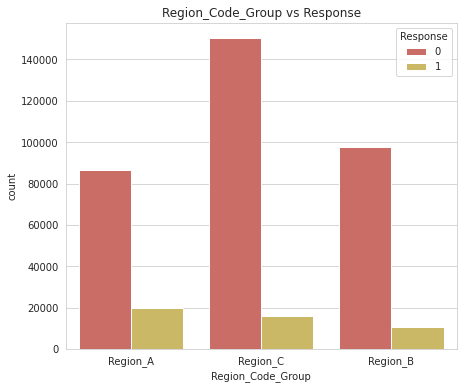

In [343]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'Region_Code_Group', data = train, hue='Response')
plt.title("Region_Code_Group vs Response")
plt.show()

> After projecting the response of the customers on the 3 new regions, we can see that most of the positive responses came from regions A and C, but most of the negative responses came also from region C.

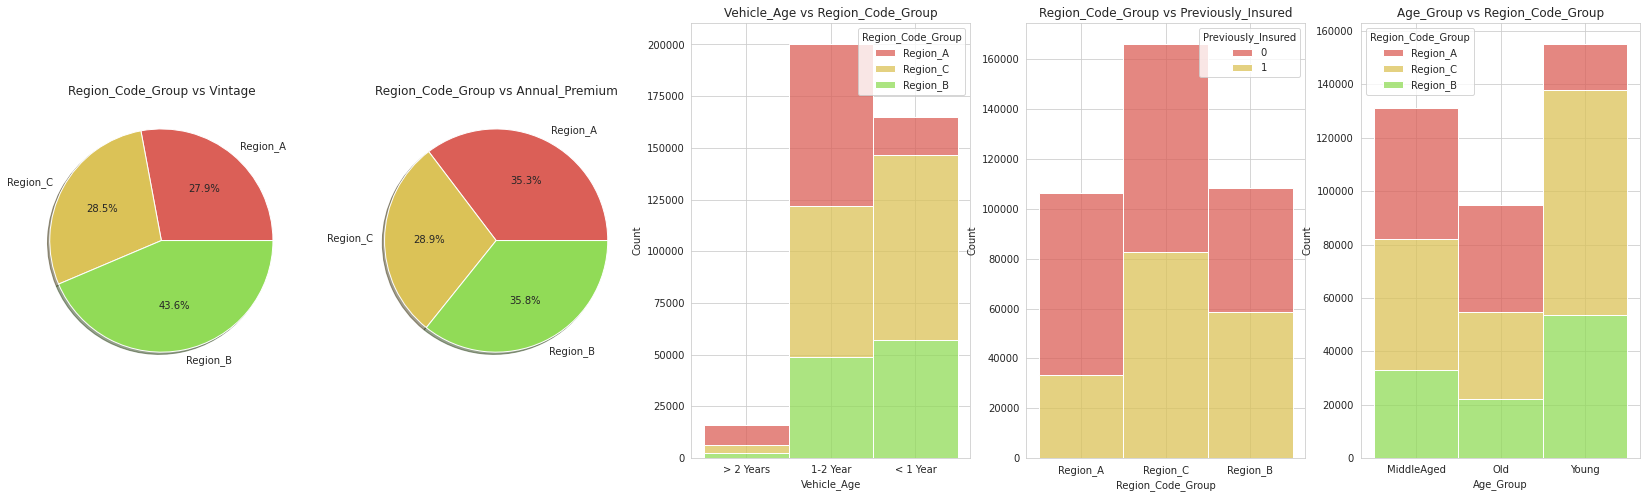

In [344]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(29,8))

ax1.pie( x= train.groupby('Region_Code_Group')['Vintage'].sum(), 
            labels=train['Region_Code_Group'].unique(), autopct='%1.1f%%', 
            shadow=True)
ax1.set_title("Region_Code_Group vs Vintage")

ax2.pie( x= train.groupby('Region_Code_Group')['Annual_Premium'].sum(), 
            labels=train['Region_Code_Group'].unique(), autopct='%1.1f%%', 
            shadow=True);
ax2.set_title("Region_Code_Group vs Annual_Premium")

sns.histplot(binwidth=0.5, hue="Region_Code_Group", 
                 x="Vehicle_Age", data=train, 
                 stat="count", multiple="stack",ax=ax3)
ax3.set_title("Vehicle_Age vs Region_Code_Group")

sns.histplot(binwidth=0.5, hue="Previously_Insured", 
                 x="Region_Code_Group", data=train, 
                 stat="count", multiple="stack",ax=ax4)
ax4.set_title("Region_Code_Group vs Previously_Insured")

sns.histplot(binwidth=0.5, x="Age_Group", 
                 hue="Region_Code_Group", data=train, 
                 stat="count", multiple="stack",ax=ax5)
ax5.set_title("Age_Group vs Region_Code_Group")

plt.show()

> **Observation**:
* *Region_Code_Group vs Vintage*: The customers belonging to Region_B had the highest Vintage values and the newest customers come from Region_A. That means the insurance company has recently become more popular among customers from the regions of category Region_A.
* *Region_Code_Group vs Annual_Premium*: customers from Region_B and Region_A pay almost the same amount of annual premium for insurance.
* *Vehicle_Age vs Region_Code_Group*: Customers with newer cars, of age less than 1 year, are more likely to have come from Region_C, while those with cars  of age between 1-2 years could have come from Region_A or Region_C as well. Those who own cars older than 2 years are more likely to reside in Region_A.
* *Region_Code_Group vs Previously_Insured*: Customers from Region_A are less likely to have had an insurance previously, while the customers from Region_C are equally likely to have had an insurance before.
* *Age_Group vs Region_Code_Group*: Younger customers were most likely from regions of category Region_C and Region_B, while the majority of the MiddleAge and Old customers came from regions from categories Region_A and Region_C.

* **Policy Sales Channel**


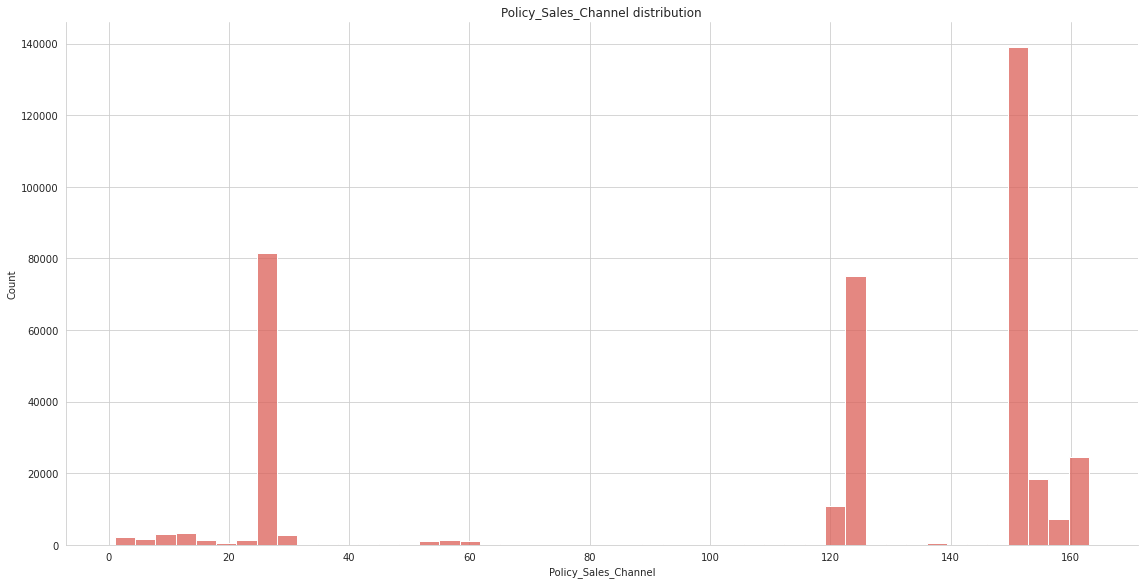

In [345]:
sns.displot(x = train['Policy_Sales_Channel'],  height = 8, aspect=2)
plt.title("Policy_Sales_Channel distribution")
plt.show()

In [346]:
print("Channel #nr-s reaching the highest nr of customers:")
print(train[(train["Policy_Sales_Channel"] > 140) & (train["Policy_Sales_Channel"] < 160)]["Policy_Sales_Channel"].value_counts().sort_values(ascending=False).head(1))
print(train[(train["Policy_Sales_Channel"] > 20) & (train["Policy_Sales_Channel"] < 30)]["Policy_Sales_Channel"].value_counts().sort_values(ascending=False).head(1))
print(train[(train["Policy_Sales_Channel"] > 120) & (train["Policy_Sales_Channel"] < 140)]["Policy_Sales_Channel"].value_counts().sort_values(ascending=False).head(1))

Channel #nr-s reaching the highest nr of customers:
152.0    134784
Name: Policy_Sales_Channel, dtype: int64
26.0    79700
Name: Policy_Sales_Channel, dtype: int64
124.0    73995
Name: Policy_Sales_Channel, dtype: int64


> **Observations**:
* Most of the customers were reached through channels 152, 26 and 124.

Similarly, as in case of the Region_Code feature, we can observe that the Policy_Sales_Channel codes also take all the values in the range 0-160. 

In order to better visualize the plots, we differentiate again 3 categories, as indicated by the 4 peak values and distribute the policy channels into these categories:
* Channel_A : those channels which helped reaching more than 100000 customers. These are the most used communication channels.
* Channel_B: those channels on which the company can reach around 75000-100000 customers
* Channel_C: which can reach out to between 10000-75000 customers
* Channel_D: which can reach out less than 10000 customers. These are the least used communication channels.

In [347]:
x = train['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 75000<x<100000 else 'Channel_C' if 10000<x<=75000 else 'Channel_D') 
category_map = dict(zip(x.keys(),x.values))
train['Policy_Sales_Channel_Group'] = train['Policy_Sales_Channel'].map(category_map) 

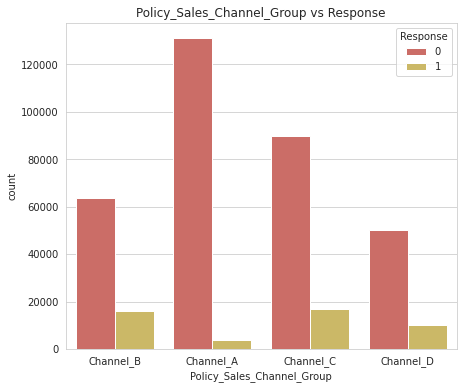

In [348]:
plt.figure(figsize=(7,6))
sns.countplot(x = 'Policy_Sales_Channel_Group', data = train, hue='Response')
plt.title("Policy_Sales_Channel_Group vs Response")
plt.show()

> **Observations**:
* From the plot, it show that Channel_B and Channel_C are the most effective ways of reaching the customers in order to inform them about the possibility of a car insurance, as they have the most positive responses. 
* Channel_A seems to be the worst choice as it has few positive responses and it also had the most negative responses.

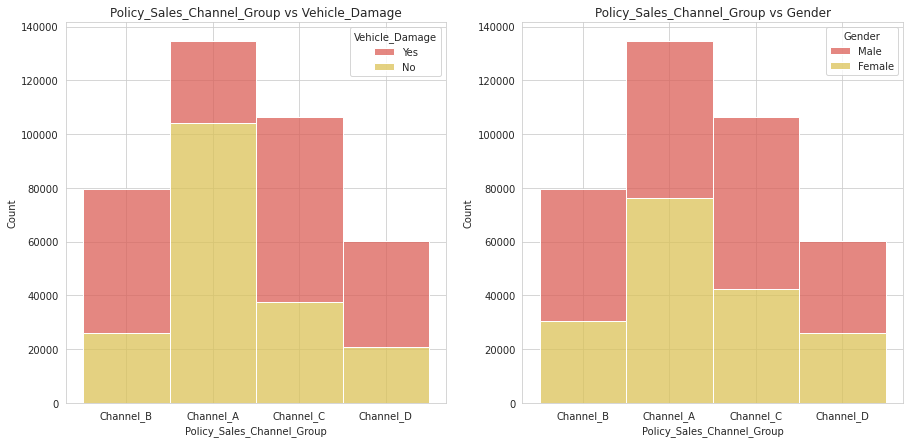

In [349]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(binwidth=0.5, hue="Vehicle_Damage", 
                 x="Policy_Sales_Channel_Group", data=train, 
                 stat="count", multiple="stack",ax=ax1)
ax1.set_title("Policy_Sales_Channel_Group vs Vehicle_Damage")

sns.histplot(binwidth=0.5, hue="Gender", 
                 x="Policy_Sales_Channel_Group", data=train, 
                 stat="count", multiple="stack",ax=ax2)
ax2.set_title("Policy_Sales_Channel_Group vs Gender")

plt.show()

> **Observations**:
* *Policy_Sales_Channel_Group vs Vehicle_Damage*: Customers reached through Channel_A are the least likely to have damaged their vehicles before, while more customers, reached through Channel_C, claimed to have had damaged vehicles before.
* *Policy_Sales_Channel_Group vs Gender*: Female customers were more likely to be reached out through Channel_A, while male customers on the other hand, could be reached out more likely on Channel_C and Channel_B.

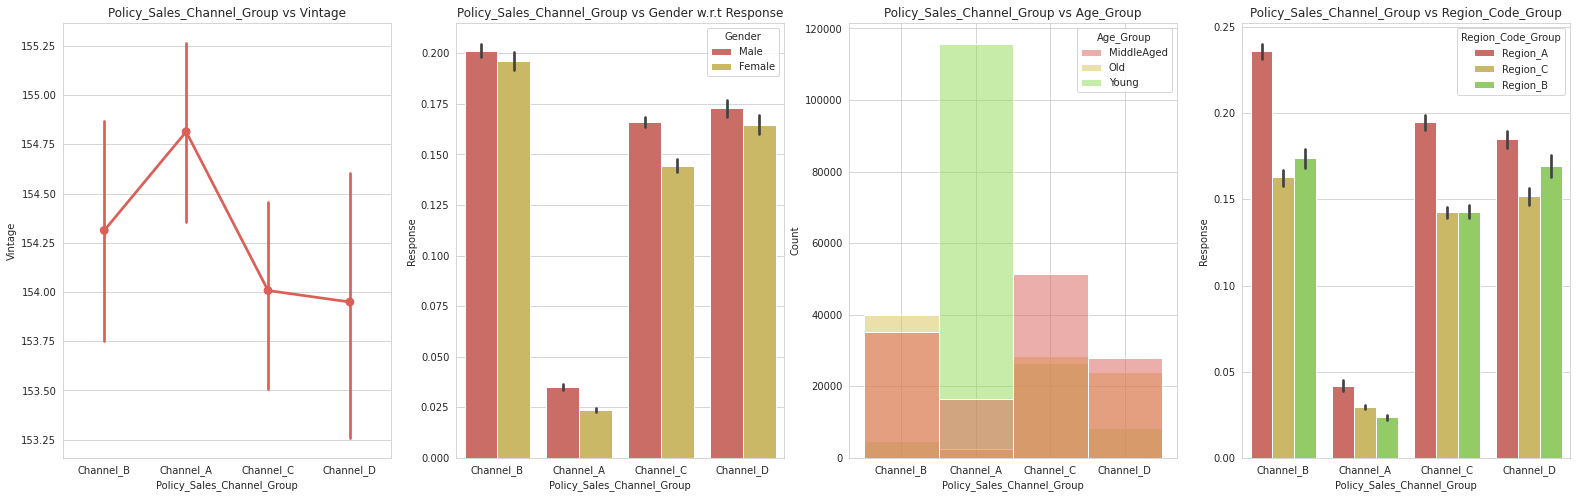

In [350]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(1, 4, figsize=(27,8))

sns.pointplot( y="Vintage", x="Policy_Sales_Channel_Group", data=train,ax=ax1)
ax1.set_title("Policy_Sales_Channel_Group vs Vintage")

sns.barplot( y = 'Response', hue = 'Gender',x="Policy_Sales_Channel_Group", data=train,ax=ax2)
ax2.set_title("Policy_Sales_Channel_Group vs Gender w.r.t Response")

sns.histplot( hue="Age_Group", x="Policy_Sales_Channel_Group", data=train,ax=ax3)
ax3.set_title("Policy_Sales_Channel_Group vs Age_Group")

sns.barplot( y = 'Response', hue="Region_Code_Group", x="Policy_Sales_Channel_Group", data=train,ax=ax4)
ax4.set_title("Policy_Sales_Channel_Group vs Region_Code_Group")

plt.show()

> **Observations**:
* *Policy_Sales_Channel_Group vs Vintage*: Customers who have been with the insurance company were reached mainly through channels from category Channel_A, while newer customers through channels from category Channel_D.
* *Policy_Sales_Channel_Group vs Gender*: The number of male and female customers were reached out through each channel is equally distributed, therefore Gender doesn't really affect the distribution. However, interesting to note that the least popular channels to contact customers were proven to be from category Channel_A.
* *Policy_Sales_Channel_Group vs Age_Group*: Most of the Young customers could be reached through channels from category Channel_A, MiddleAged customer were reached through channels from categories Channel_C and Channel_D, while Old customers through channels from categories Channel_C.
* *Policy_Sales_Channel_Group vs Region_Code_Group*: Most of the customers from regions of category Region_A were reached through channels from Channel_B. The customers from Region_B and Region_C were mainly reached through Channel_B and Channel_D. Again, through Channel_A were reached the least amount of customers, independent of region.

# Analyzing correlation between features



In order to determine which features have a greater influence on the Response, it is not enough to observe them individually, as they could influence one another in some way, therefore we are curious to find a relationship/correlation between some of the features and to isolate features that are completely independent of the others and may have no relevance to the result.

For finding the correlation between features, we can use Pearsson's formula for correlation, already implemented in the Pandas library. 

In [ ]:
corr_matrix = train.corr()
corr_matrix["Response"].sort_values(ascending=False)

Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

Attributes which influence positively the Response attribute:
* **Vehicle_Damage**
* **Age**
* **Gender**
* **Annual_Premium**
* **Region_Code**
* **Driving_License**



The correlation between the independent attributes and the target feature, Response, can be better understood when looking at a heatmap:

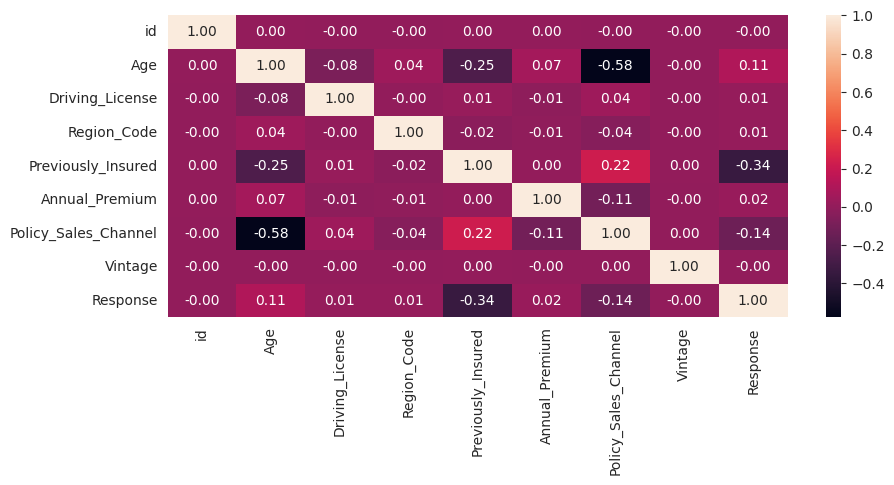

In [ ]:
# generate a heatmap
fig, ax1 = plt.subplots(figsize=(10, 4), dpi=100)
sns.heatmap(corr_matrix, annot=True,fmt="0.2f", ax=ax1)
plt.show()

> At first glance, we can already tell from the heatmap which features have little to no effect on the result, the ones with correlation values very close to 0 for every other feature are: 
* **id**: it's completely independent of the other features, and also of the target feature, Response, therefore it is useless for the model.
* **Vintage**: also 0 correlation with all the other features.

> We can also see that, **Vehicle_Damage** has the highest positive influence on the Response feature's value, while **Previously_Insured** has the highest negative influence. These 2 features are strongly negatively correlated, having correlation factor -0.82.

In other words, those who have not been previously insured and had their cars damaged in the past, would be more interested in a car insurance than those, who had an insurance before but their car was not damaged.


Strong positive correlation between the following pairs of features:
* **Vehicle_Age** and **Policy_Sales_Channel**
* **Previously_Insured** and **Policy_Sales_Channel**
* **Age** and **Vehicle_Damage**
* **Age** and **Annual_Premium**
* **Age** and **Gender**

### Visualizing the relationship between strongly correlated features

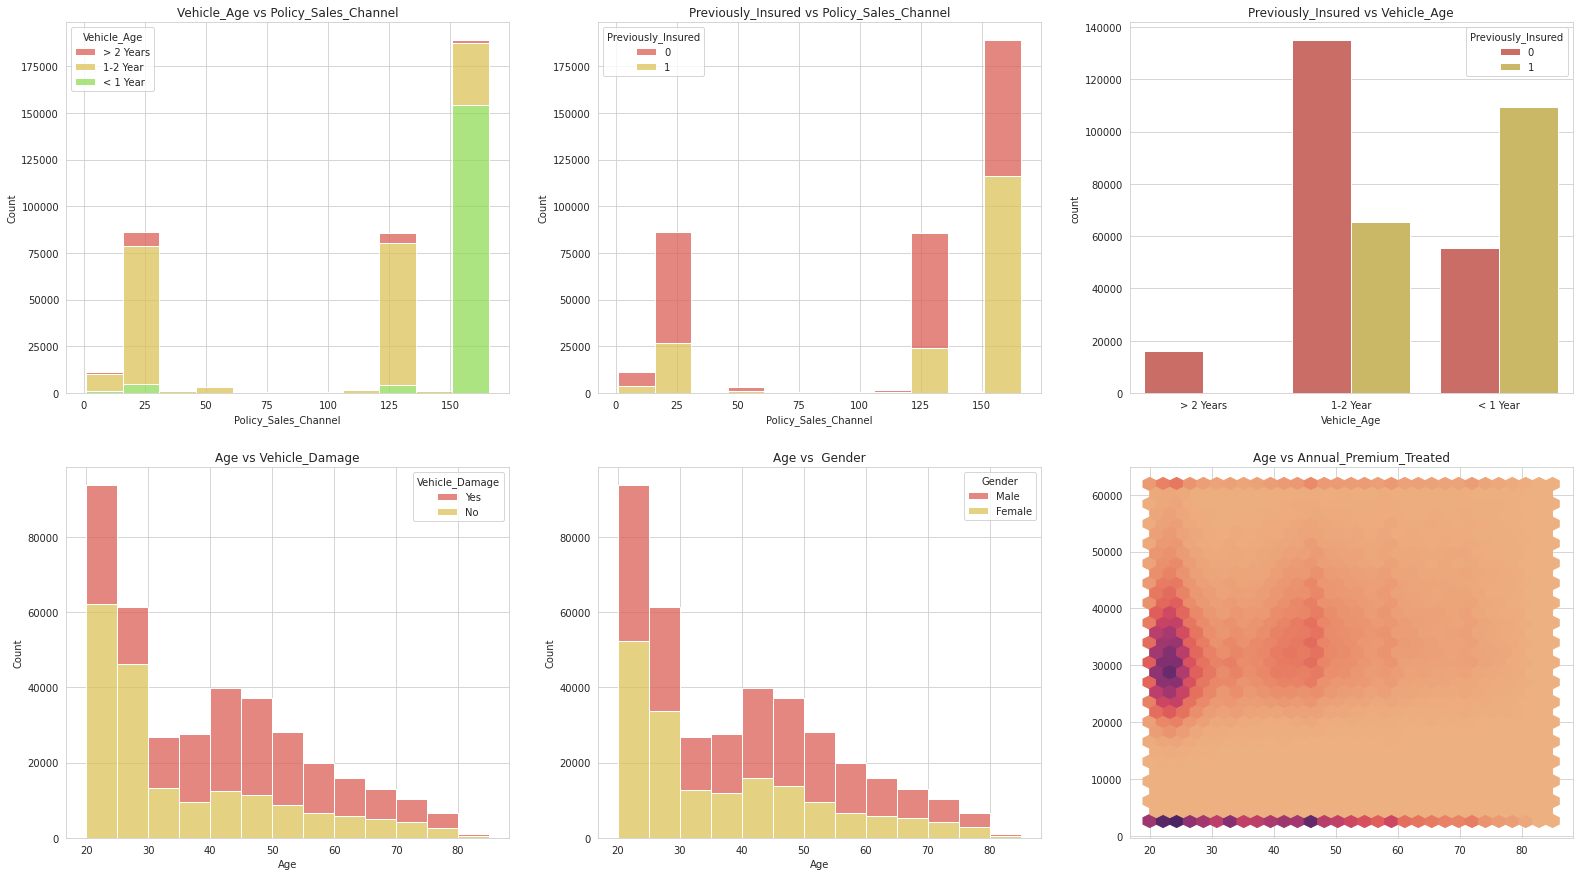

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(27,15))

sns.histplot(binwidth=15, x="Policy_Sales_Channel", 
                 hue="Vehicle_Age", data=train,
                 stat="count", multiple="stack",ax=axes[0][0])
axes[0][0].set_title("Vehicle_Age vs Policy_Sales_Channel")

sns.histplot(binwidth=15,hue="Previously_Insured", 
                 x="Policy_Sales_Channel", data=train,ax=axes[0][1],
             stat="count", multiple="stack")
axes[0][1].set_title("Previously_Insured vs Policy_Sales_Channel")

sns.countplot(hue="Previously_Insured", 
                 x="Vehicle_Age", data=train, ax=axes[0][2])
axes[0][2].set_title("Previously_Insured vs Vehicle_Age")

sns.histplot(binwidth=5, hue="Vehicle_Damage", 
                 x="Age", data=train, 
                 stat="count", multiple="stack",ax=axes[1][0])
axes[1][0].set_title("Age vs Vehicle_Damage")

sns.histplot(binwidth=5, x="Age",hue="Gender", data=train,ax = axes[1][1], stat="count", multiple="stack")
axes[1][1].set_title("Age vs  Gender")

axes[1][2].hexbin(x="Age", y="Annual_Premium_Treated", data=train, gridsize = 30,cmap = "flare" )
axes[1][2].set_title("Age vs Annual_Premium_Treated")

plt.show()

> **Observations**:
* *Vehicle_Age vs Policy_Sales_Channel*: Customers reached through channel 152 are more likely to have newer cars, with age less than 1 year. Those reached through channels 25 and 125 have cars of age 1-2 years.
* *Previously_Insured vs Policy_Sales_Channel*: Customers reached through channel 152 are more likely to have had car insurance before, while those reached through channels 26 and 124 are less likely.
* *Previously_Insured vs Vehicle_Age*: Customers having newer vehicles, less than 1 year, are more likely to have had a car insurance before, while customers owning cars of age 1-2 years, have a higher probability to not have had previous insurance.
* *Age vs Vehicle_Damage*: Younger customers are more likely to have not damaged previously their cars, while MiddleAged and Old customers have a higher probability to have had damaged vehicles before.
* *Age vs Gender*: Among the younger customers there are more females and among the older ones more males.
* *Age vs Annual_Premium_Treated*: Each customer pays roughly the same amount for Annual Premium, but younger customers are in majority, therefore they are more likely to pay an average amount.

### Analysis Summary

Studying the customer's data with respect to their response, we arrive to the conclusion that the insurance company should target customers who:
1. have a driving license
3. have vehicles of age older than 1 year
4. had not been previously insured
5. had vehicle damage in the past
6. middle-aged, having an age between 30-50 or older, as younger customers have shown less interest in insurance
7. come from regions from category Region_A, for example region 28.
8. can be reached out through the top policy sales channels 152, 26 or 124.

### Correlation between numerical and categorical features

The dataset contains both numerical and categorical features, but the correlation matrix computed above is based on the Pearson's formula which can be used to determine only the correlation between numerical features. In order to compare and find out the association between numerical and categorical features we can use some of the functions provided by the dython library.

In [ ]:
pip install dython

     |████████████████████████████████| 11.2 MB 5.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 900 kB 48.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from dython.nominal import cluster_correlations
categorical_features=identify_nominal_columns(train_data)

Response (con)                1.000000
Vehicle_Damage (nom)          0.354400
Vehicle_Age (nom)             0.221937
Age (con)                     0.111147
Gender (nom)                  0.052440
Annual_Premium (con)          0.022575
Region_Code (con)             0.010570
Driving_License (con)         0.010155
Vintage (con)                -0.001050
id (con)                     -0.001368
Policy_Sales_Channel (con)   -0.139042
Previously_Insured (con)     -0.341170
Name: Response (con), dtype: float64

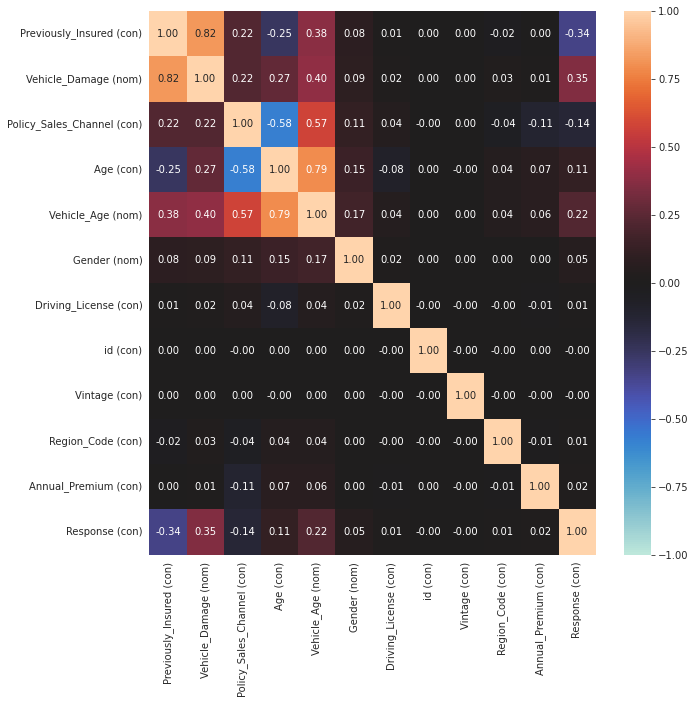

In [ ]:
correlations = associations(train_data, compute_only=True, figsize=(10, 10), mark_columns=True)['corr']
correlations, _ = cluster_correlations(correlations)
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, cmap="icefire", fmt=".2f")
correlations["Response (con)"].sort_values(ascending = False)

According to the generated heatmap and the correlation matrix, we can see that:
* **Vehicle_Damage** and **Vehicle_Age** are in _strong positive_ correlation with Response label.
* **Age** is in _weak positive_ correlation with Response
* **Previously_Insured** is _strongly negatively_ correlated to Response
* **Policy_Sales_Channel** is in _weakly negatively_ correlated to Response

Analyzing the correlation between independent features, we observe that theer is a **strong positive** correlation between:
* **Vehicle_Damage** and **Previously_Insured**
* **Vehicle_Age** and **Age**
* **Vehicle_Age** and **Policy_Sales_Channel**
* **Vehicle_Age** and **Vehicle_Damage**

Also, there is a **strong negative** correlation between:
* **Age** and **Policy_Sales_Channel**

From the correlation matrix it is also visible that the **Id**, **Vintage** and **Driving_License** have little to no correlation with any other feature.



# Prepare data for machine learning algorithms

In [6]:
insurance = train_data.drop("Response", axis=1) # drop labels for training set
insurance_labels = train_data["Response"].copy()

## Data cleaning

Before starting to build the model to predict if a customer would be interested in vehicle insurance, we should prepare the dataset by removing the invalid (empty) or unecessary data.


In [7]:
# copy the initially loaded data
insurance = insurance.copy()
insurance.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0   > 2 Years            Yes         40454.0                  26.0      217  
1    1-2 Year             No         33536.0                  26.0      183  
2   > 2 Years            Yes         38294.0                  26.0       27  
3    < 1 Year             No         28619.0                 152.0      203  
4    < 1 Year             No         27496.0                 152.0       39

### Remove null (empty) values if any

It seems that there are no features with empty values, each has 381109 non-null values, so no line has to be removed or filled with some default value.

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [9]:
# Another way for checking for missing values
insurance.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

### Remove duplicates if any:


Check for duplicates

In [10]:
insurance.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 381109, dtype: bool

Remove duplicates:

In [11]:
insurance.drop_duplicates()
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


It seems that no values were removed so there are no duplicates in our dataset.

## Data processing

### Remove unneccesary features

The features, which don't influence in any way the response, are for example:
* **id** of the clients, which is only used to distinguish the different customers.
* **Vintage**, because most of the customers have been with the company for the same amount of time, around 150 days, so it doesn't affect the result much. 
Also, from the correlation matrix it is evident that there is 0 correlation between Vintage, respectively id, and any other attribute.
* **Driving_License** as the majority of the customers own a driving license.

Out of these, only the **id** feature is removed eventually. **Vintage** and **Driving_License** do not seem very important in predicting the response, they are not correlated with any feature, or just weakly, but since the correlation between features is not linear, we cannot exclude them entirely from our analysys, as they could, at some point, influence the Response directly or through other features.

In [12]:
unnecessary_columns = ['id']
insurance.drop(columns = unnecessary_columns, inplace = True)
insurance.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0            Yes         40454.0                  26.0      217  
1             No         33536.0                  26.0      183  
2            Yes         38294.0                  26.0       27  
3             No         28619.0                 152.0      203  
4             No         27496.0                 152.0       39

### Removing outlier values for numerical features (Skew-correct)

Remove the values which are very far from the majority of the values, because they could cause problems and introduce errors, distortions in the prediction model. This approch can be applies for the Annual_Premium feature, as it contains outlier values, as previously shown in the plots.

In [13]:
# compute the upper limit which represents a threshold for filtering out the outlier values
def get_upper_limit(x):
  upper_limit = 2.5 * x.quantile(0.75)  - 1.5 * x.quantile(0.25)
  return upper_limit

In [14]:
upper_limit_for_Annual_Premium = get_upper_limit(insurance['Annual_Premium'])

# identify outlier values based on the previously computed UpperLimit, and replace them with the upper limit's value
insurance['Annual_Premium'] = np.where(insurance['Annual_Premium'] > upper_limit_for_Annual_Premium, upper_limit_for_Annual_Premium, insurance['Annual_Premium'])

### Encoding categorical features
As we have seen, some of these categorical features, mainly those which represent more than 2 (binary) categories, contain values in form of a text, which have to be encoded using numerical labels in order to use them later for our model.

Using a **LabelEncoder** we can assign a unique numerical code for each distinct *binary* category inside a feature, and the final form of the data becomes:
* for binary categories 0 represents if the property is present, 1 if it is missing, for ex. having or not having Previous Damage to the vehicle. In case of Gender, 1 means 'Male', while 0 means 'Female'.

For categories where the order matters, such as Vehicle_Age we can use an **OrdinalEncoder**:
* as for the categories with multiple values, in this case only the Vehicle_Age, 0 stands for '1-2 Years', 1 means having '< 1 Years' and 2 for '> 2 Years.

In [15]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# assign labels for each category
label_encoder = LabelEncoder()
categorical_features = ['Gender','Vehicle_Damage']
insurance[categorical_features] = insurance[categorical_features].apply(label_encoder.fit_transform)
ordinal_encoder = OrdinalEncoder()
insurance[['Vehicle_Age']] = ordinal_encoder.fit_transform(insurance[['Vehicle_Age']])
insurance.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0          2.0   
1       1   76                1          3.0                   0          0.0   
2       1   47                1         28.0                   0          2.0   
3       1   21                1         11.0                   1          1.0   
4       0   29                1         41.0                   1          1.0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                  26.0      217  
1               0         33536.0                  26.0      183  
2               1         38294.0                  26.0       27  
3               0         28619.0                 152.0      203  
4               0         27496.0                 152.0       39

### Scaling

We have already removed the outlier values so we can use MixMaxScaler to scale down the independent features: (otherwise we would need to use a StandardScaler)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# normalize the data to fit in the scale of [0,1] 
numerical_features = ['Annual_Premium','Age','Region_Code','Policy_Sales_Channel','Vintage']

for nf in numerical_features:
  insurance[nf] = scaler.fit_transform(insurance[nf].values.reshape(-1,1))  

insurance.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1  0.369231                1     0.538462                   0   
1       1  0.861538                1     0.057692                   0   
2       1  0.415385                1     0.538462                   0   
3       1  0.015385                1     0.211538                   1   
4       0  0.138462                1     0.788462                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0          2.0               1        0.638245              0.154321  0.716263  
1          0.0               0        0.521510              0.154321  0.598616  
2          2.0               1        0.601797              0.154321  0.058824  
3          1.0               0        0.438540              0.932099  0.667820  
4          1.0               0        0.419591              0.932099  0.100346

In [17]:
insurance.describe().T

count      mean       std  min       25%       50%  \
Gender                381109.0  0.540761  0.498336  0.0  0.000000  1.000000   
Age                   381109.0  0.289578  0.238640  0.0  0.076923  0.246154   
Driving_License       381109.0  0.997869  0.046110  0.0  1.000000  1.000000   
Region_Code           381109.0  0.507477  0.254421  0.0  0.288462  0.538462   
Previously_Insured    381109.0  0.458210  0.498251  0.0  0.000000  0.000000   
Vehicle_Age           381109.0  0.516388  0.577698  0.0  0.000000  0.000000   
Vehicle_Damage        381109.0  0.504877  0.499977  0.0  0.000000  1.000000   
Annual_Premium        381109.0  0.464344  0.261150  0.0  0.367433  0.490006   
Policy_Sales_Channel  381109.0  0.685397  0.334593  0.0  0.172840  0.814815   
Vintage               381109.0  0.499472  0.289520  0.0  0.249135  0.498270   

                           75%  max  
Gender                1.000000  1.0  
Age                   0.446154  1.0  
Driving_License       1.000000  1.0  
Region_Code           0.673077  1.0  
Previously_Insured    1.000000  1.0  
Vehicle_Age           1.000000  2.0  
Vehicle_Damage        1.000000  1.0  
Annual_Premium        0.620460  1.0  
Policy_Sales_Channel  0.932099  1.0  
Vintage               0.750865  1.0

### All in one:

In [18]:
def prepare_data(data):
  # setup
  from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
  from sklearn.preprocessing import MinMaxScaler

  # create a copy of the initial data set
  prep_data = data.copy()

  # remove the 'id' column
  prep_data.drop(columns = 'id', inplace = True)

  x = prep_data['Annual_Premium']
  upper_limit = 2.5 * x.quantile(0.75)  - 1.5 * x.quantile(0.25)

  # identify outlier values based on the previously computed UpperLimit, and replace them with the upper limit's value
  prep_data['Annual_Premium'] = np.where(prep_data['Annual_Premium'] > upper_limit, upper_limit, prep_data['Annual_Premium'])

  # assign labels for each category
  label_encoder = LabelEncoder()
  categorical_features = ['Gender','Vehicle_Damage']
  prep_data[categorical_features] = prep_data[categorical_features].apply(label_encoder.fit_transform)
  ordinal_encoder = OrdinalEncoder()
  prep_data[['Vehicle_Age']] = ordinal_encoder.fit_transform(prep_data[['Vehicle_Age']])

  scaler = MinMaxScaler()
  # normalize the data to fit in the scale of [0,1] 
  numerical_features = ['Annual_Premium','Age','Region_Code','Policy_Sales_Channel','Vintage','Vehicle_Age']
  for nf in numerical_features:
    if nf in prep_data:
      prep_data[nf] = scaler.fit_transform(prep_data[nf].values.reshape(-1,1))  

  return prep_data

In [19]:
# check if the data processing function works correctly
prepare_data(train_data).head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1  0.369231                1     0.538462                   0   
1       1  0.861538                1     0.057692                   0   
2       1  0.415385                1     0.538462                   0   
3       1  0.015385                1     0.211538                   1   
4       0  0.138462                1     0.788462                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0          1.0               1        0.638245              0.154321   
1          0.0               0        0.521510              0.154321   
2          1.0               1        0.601797              0.154321   
3          0.5               0        0.438540              0.932099   
4          0.5               0        0.419591              0.932099   

    Vintage  Response  
0  0.716263         1  
1  0.598616         0  
2  0.058824         1  
3  0.667820         0  
4  0.100346         0

# Building the model



We would like to predict if a customer would be interested in having a car insurance, therefore the predicted result is a binary value, indicating 'Yes' or 'No' answer. Classification algorithms should be considered in this case, as they are used to predict discrete values, in this case: 'Customer interested'/ 'Not interested'.

#  Training and evaluating the model

The problem is labeled as a classification problem with only 2 possible outcomes, therefore the task is reduced to selecting a binary classifier model, which can predict if a given set of customers would be interested in having a vehicle insurance. The output should be a probability, based on which we can determine if the response of the customer would be Yes(1) or No(0).

We will build and train multiple models and analyze their performance based on some predefined metrics in order to find the best suited model for our case.

The selected algorithms, commonly used in _supervised learning_ and classification problems, are the following:
* Logistic Regression 
* Stochastic Gradient Descent 
* Decision Tree Classifier
* Random Forest Classifier 
* Support Vector Classifier
* K-Nearest Neighbour 
* Naive Bayes 

_Supervised learning algorithms_ = learns a function to make predictions of a defined label based on an input data. It tries to model the relationship between the input features and the target prediction output.

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.utils import shuffle

%matplotlib inline

### Separate train and validation sets:

In [36]:
X = train_data.drop('Response', axis=1)
y = train_data['Response']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
print('Positive cases % in validation set: ', round(100 * len(y_test[y_test == 1]) / len(y_test), 3), '%')
print('Positive cases % in train set: ', round(100 * len(y_train[y_train == 1]) / len(y_train), 3), '%')

Positive cases % in validation set:  12.256 %
Positive cases % in train set:  12.256 %


> We can already see a problem with our dataset, namely that the number of instances that belong to the 2 classes, positive and negative, is **highly imbalanced** (we have more negative labels than positive ones)!

### Imbalanced Classification Problem

> **Imbalanced classification** refers to a classification predictive modeling problem where the number of examples in the training dataset for each class label is not balanced. Instances of one class are **more frequent** than the other.

This could introduce errors in the predicted outcome, such as overfitting, and it makes difficult to train a model.

In this case, the majority class represents the negative responses, but we are more curious about the positive responses, the **minority class**. Therefore, a model which can predict correctly the class label for the minority class is more important to us.

However, most machine learning algorithms for classification models are designed for problems with an equal distribution of classes. This means that the model can potentially **neglect** the examples of the minority class and focus mainly on the instances of the majority class.

Similarly, when measuring the performance of the models it could give a very **high accuracy** on the imbalanced data, as it considers that the best option would be to always predict the majority class and so to achieve high accuracy. This leads to **overfitting**, when the predicted result is too closesly aligned to a particular set of data, fits exactly the training data.

There could be multiple solutions to correct this:
1. **Collect more data**: a larger dataset could be more balanced on the two classes, as it contains more instances.
2. **Resample the dataset**: add more instances from the under-represented class (over-sampling) or delete some instances of the over-represented class (under-sampling).
3. **Use different evaluation metrics**: as accuracy could be misleading on imbalanced data, use different evaluation metrics such as precision, recall, F1-score or confusion matrix.

As we do not have access to more data, the selected methods are the last two, namely taking an equal distribution of samples from both classes and using different evaluation metrics, not only accuracy to determine which model performs better on our dataset.


Trying a different sampling method using the StratifiedShuffleSplit:

In [39]:
sss=StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=9)
for x_index, y_index in sss.split(X, y):
     X_train_balanced, y_train_balanced = X.iloc[x_index,:], y[y_index]

In [40]:
print('Positive cases % in train set: ', round(100 * len(y_train[y_train == 1]) / len(y_train), 3), '%')

Positive cases % in train set:  12.256 %


As we can see the train dataset is still very skewed, the proportion of the 2 classes is 1/8, which means the dataset is highly imbalanced.

Next, we try re-sampling the train dataset by combining an under-sampler and an over-sampler:

In [41]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

def resample_data(X, y, over, under):
  # define oversampling strategy
  over = RandomOverSampler(sampling_strategy=over)
  # fit and apply the transform
  X, y = over.fit_resample(X, y)

  # define undersampling strategy
  under = RandomUnderSampler(sampling_strategy=under)
  # fit and apply the transform
  X, y = under.fit_resample(X, y)

  return X, y

In [42]:
from collections import Counter

X = train_data.drop('Response', axis=1)
y = train_data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# resample the train dataset
X_train_balanced, y_train_balanced = resample_data(X_train, y_train, over=0.3, under=0.7)

print('Original train dataset shape %s' % Counter(y_train))
print('Sampled train dataset shape %s' % Counter(y_train_balanced))

print('Positive cases % in train set: ', round(100 * len(y_train_balanced[y_train_balanced == 1]) / len(y_train_balanced), 3), '%')

# the validation set remains unchanged
print('Positive cases % in validation set: ', round(100 * len(y_test[y_test == 1]) / len(y_test), 3), '%')

Original train dataset shape Counter({0: 267519, 1: 37368})
Sampled train dataset shape Counter({0: 114650, 1: 80255})
Positive cases % in train set:  41.176 %
Positive cases % in validation set:  12.256 %


As we can see, now the training data is almost balanced, which means now it can be used to train our models.

> Increasing anymore the under-sampling ratio would result in removing too many instances from the negative class, which might hav e a negative impact on the learning of the models, while increasing the over-sampling ratio might add too many duplicates from the positive class to the dataset. Therefore, we settle for an averagely good ratio 41% which approximates a balanced dataset.

> **Remark**: Only the train set should be re-sampled, the validation (test) set remains untouched!

### Evaluate the performance of a model


The metrics used to evaluate the performance of each model are:
* **Accuracy**: measures the percentage (ratio) of correct predictions: _What  is the fraction of predictions our model got right?_ 
            accuracy = (TP + TN) / (TP + FP + TN + FN)
* **Precision**: the accuracy of positive predictions, the fraction of correctly predicted positive output: _What proportion of positive identifications was actually correct?_
            precision = TP /  (TP + FP)
* **Recall** (sensitivity/true positive rate): the ratio of positive responses that are correctly detected by the classifier: _What proportion of actual positives was identified correctly?_
            recall = TP /  (TP + FN)
* **F1_score**: represents the harmonic mean of the precision and recall. It reaches the best value at 1 and the worst score at 0.
            F1 = (2 * Precision * Recall) / (Precision + Recall)

> Tradeoff between precision and recall:

> High recall means to _low false negative rate_, while high precision means _low false positive rate_. This way, higher recall will result in lower precision and vice versa, therefore there is a tradeoff between the two measures.
> * High recall but low precision means that the model returns many positive results and most of the predicted labels are incorrect compared to the training labels.
> * High precision but low recall means that the model return fewer positive results, but most of the predicted labels are correct.

> High scores for both would mean that the classifier returns accurate results (high precision) and the majority of the positive results (high recall). This is achieved when AUC has the highest value.

In [43]:
def compare_performance_on_different_datasets(model, data_0, data_1, dataset_0_name = 'Dataset 0', dataset_1_name = 'Dataset 1'):
  # create a copy of the initial model
  model_1 = clone(model)

  [X_train_0, X_test_0, y_train_0, y_test_0] = data_0
  [X_train_1, X_test_1, y_train_1, y_test_1] = data_1

  # train the model on the first dataset
  model.fit(prepare_data(X_train_0), y_train_0)
  # make predictions
  predictions = model.predict(prepare_data(X_test_0))

  metrics_0 = []
  metrics_0.append(metrics.accuracy_score(y_test, predictions))
  metrics_0.append(metrics.precision_score(y_test, predictions))
  metrics_0.append(metrics.recall_score(y_test, predictions))
  metrics_0.append(metrics.f1_score(y_test, predictions))

   # train the model on the second dataset
  model_1.fit(prepare_data(X_train_1), y_train_1)
  # make predictions
  predictions = model_1.predict(prepare_data(X_test_1))

  metrics_1 = []
  metrics_1.append(metrics.accuracy_score(y_test, predictions))
  metrics_1.append(metrics.precision_score(y_test, predictions))
  metrics_1.append(metrics.recall_score(y_test, predictions))
  metrics_1.append(metrics.f1_score(y_test, predictions))

  return pd.DataFrame({'Metrics': ['Accuracy', 'Precision','Recall', 'F1_score'], dataset_0_name: metrics_0, dataset_1_name: metrics_1})


def compute_evaluation_metrics(model, X_train, y_train, X_test, y_test):
  """
    Verify the performance of a model based on some important metrics, such as:
      - accuracy;
      - precision;
      - recall;
      - f1_score.

      First evaluate the model on the imbalanced dataset then repeat the same measurements
      after training the model on the balanced dataset and combine the results.
  """

  # resample the train dataset
  X_train_balanced, y_train_balanced = resample_data(X_train, y_train, over=0.3, under=0.7)

  imbalanced_data = [X_train, X_test, y_train, y_test]
  balanced_data = [X_train_balanced, X_test, y_train_balanced, y_test]

  return compare_performance_on_different_datasets(model, imbalanced_data, balanced_data, dataset_0_name = 'Imbalanced', dataset_1_name = 'Balanced')

* **ROC (receiver operating characteristic)**: represents the plot of the _true positives rate (recall)_ against the  _false positives rate_ at different classifictaion thresholds.
Classifiers that produce curves closer to the top-left corner have better performance, the closer the points are lying to the main diagonal, the less accurate is the test.

> Tradeoff: the higher the recall the more false positives it produces.

* **AUC (area under the curve)**: represents the area under the ROC curve. It is a common approach to compare different classifiers. Higher AUC indicates better performance. A perfect classifier would have an AUC equal to 1, while a purely random classifier would have an AUC equal to 0.5.

In [44]:
def display_roc_curve(model, X_train, y_train, X_test, y_test):
  """
    Display the ROC curve:
     - axis x = TPR (true positive rate ~ Sensitivity/ Recall)
     - axis y = FPR (false positive rate ~ Specificity)

    Compute the AUC (area under the curve).
  """
  fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(15,8))

  # train model on imbalanced dataset
  model.fit(prepare_data(X_train), y_train)
  predictions = model.predict_proba(prepare_data(X_test))[:,1]
  fpr0, tpr0, _ = metrics.roc_curve(y_test, predictions)

  ax0.set_title('ROC curve for imbalanced data')
  ax0.set_xlabel('FPR (Precision)')
  ax0.set_ylabel('TPR (Recall)')

  ax0.plot(fpr0,tpr0)
  ax0.plot((0,1), ls='dashed',color='black')

  # resample the train dataset
  X_train_balanced, y_train_balanced = resample_data(X_train, y_train, over=0.3, under=0.7)

  # train model on a balanced dataset
  model.fit(prepare_data(X_train_balanced), y_train_balanced)
  predictions = model.predict_proba(prepare_data(X_test))[:,1]
  fpr1, tpr1, _ = metrics.roc_curve(y_test, predictions)

  ax1.set_title('ROC curve for balanced data')
  ax1.set_xlabel('FPR (False Positive Rate')
  ax1.set_ylabel('TPR (True Positive Rate)')

  ax1.plot(fpr1,tpr1)
  ax1.plot((0,1), ls='dashed',color='black')
  
  plt.show()

  print ('Area under curve (AUC) for imbalanced dataset: ', metrics.auc(fpr0,tpr0))
  print ('Area under curve (AUC) for balanced dataset: ', metrics.auc(fpr1,tpr1))

* **Confusion Matrix**:

A better way to evaluate the performance of a classifier is to analyze the _confusion matrix_. 

If the accuracy is very high, it could indicate  that we are dealing with a skewed dataset, when some classes are more frequent than others. In this case the negative Response is more frequent, therefore we need another performance measure to determine which model is better.
 
> In the confusion  matrix the **columns** represent the **Predicted labels** while the **rows** represent the **Actual(True) labels**.
* (0,0) = TN (true negatives) = the nr of negative responses predicted correctly
* (0,1) = FP (false positive) = the nr of negative responses wrongly classified as positive
* (1,0) = FN (false negative) = the nr of positive responses wrongly classified as negative
* (1,1) = TP (true positive) = the nr of positive responses predicted correctly

A perfect classifier would have only true positives and true negatives, so it would have 0-s on the main diagonal.

In [45]:
def display_confusion_matrix(model, X_train, y_train, X_test, y_test):
  """
    Compute and display the confusion matrix.
  """

   # train model on imbalanced dataset
  model.fit(prepare_data(X_train), y_train)
  predictions = model.predict(prepare_data(X_test))
  conf_matrix_0 = metrics.confusion_matrix(y_test, predictions)

  # resample the train dataset
  X_train_balanced, y_train_balanced = resample_data(X_train, y_train, over=0.3, under=0.7)

  # train model on a balanced dataset
  model.fit(prepare_data(X_train_balanced), y_train_balanced)
  predictions = model.predict(prepare_data(X_test))
  conf_matrix_1 = metrics.confusion_matrix(y_test, predictions)

  fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(15,5))
  sns.heatmap(conf_matrix_0, annot=True, ax = ax0, fmt='g')
  sns.heatmap(conf_matrix_1, annot=True, ax = ax1, fmt='g')

  ax0.set_title("Confusion matrix on imbalanced dataset")
  ax0.set_xlabel('Predicted labels')
  ax0.set_ylabel('True labels')

  ax1.set_title("Confusion matrix on balanced dataset")
  ax1.set_xlabel('Predicted labels')
  ax1.set_ylabel('True labels')

  plt.show()

In [46]:
def performance_overview(model, X_train, y_train, X_test, y_test):
    """
      Evaluate the performance of a model based on the previously presented metrics:
      - Accuracy, Precision, Recall, F1
      - ROC curve
      - Confusion matrix
    """
    print(compute_evaluation_metrics(model, X_train, y_train, X_test, y_test))
    display_roc_curve(model, X_train, y_train, X_test, y_test)
    display_confusion_matrix(model, X_train, y_train, X_test, y_test)

Visualize the result of the predictions using different models, with respect to the true values (expected values). Plot the Response for each feature separately.

In [47]:
def display_predictions(model, X_train, y_train, X_test, y_test):
    """
      Display the result of the predictions with respect to the True (expected) values for each feature.
    """
    model.fit(prepare_data(X_train), y_train)
    pred = model.predict(prepare_data(X_test))

    # set a common style for the plots
    sns.set_style("whitegrid")
    sns.set_palette("hls",8)
    import matplotlib.patches as mpatches

    fig, axes = plt.subplots(2, 5, figsize=(28,13))

    sns.regplot(x=X_test['Policy_Sales_Channel'], y=y_test, line_kws={'color': 'green'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][0])
    sns.regplot(x=X_test['Policy_Sales_Channel'], y=pred, line_kws={'color': 'brown'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][0])
    axes[0][0].legend(labels = ["True values", "Predictions"])
    axes[0][0].set_title("Policy_Sales_Channel vs Response")

    sns.regplot(x=X_test['Region_Code'], y=y_test, line_kws={'color': 'green'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][1])
    sns.regplot(x=X_test['Region_Code'], y=pred, line_kws={'color': 'brown'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][1])
    axes[0][1].legend(labels = ["True values", "Predictions"])
    axes[0][1].set_title("Region_Code vs Response")

    sns.regplot(x=X_test['Age'], y=y_test, line_kws={'color': 'green'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][2])
    sns.regplot(x=X_test['Age'], y=pred, line_kws={'color': 'brown'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][2])
    axes[0][2].legend(labels = ["True values", "Predictions"])
    axes[0][2].set_title("Age vs Response")

    sns.regplot(x=X_test['Annual_Premium'], y=y_test, line_kws={'color': 'green'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][3])
    sns.regplot(x=X_test['Annual_Premium'], y=pred, line_kws={'color': 'brown'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][3])
    axes[0][3].legend(labels = ["True values", "Predictions"])
    axes[0][3].set_title("Annual_Premium vs Response")

    sns.regplot(x=X_test['Vintage'], y=y_test, line_kws={'color': 'green'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][4])
    sns.regplot(x=X_test['Vintage'], y=pred, line_kws={'color': 'brown'}, scatter_kws={'color': 'orange'},
                logistic=True, ci=None,ax=axes[0][4])
    axes[0][4].legend(labels = ["True values", "Predictions"])
    axes[0][4].set_title("Vintage vs Response")

    sns.pointplot( y=y_test, x=X_test["Vehicle_Damage"], ax=axes[1][0], color='green')
    sns.pointplot( y=pred, x=X_test["Vehicle_Damage"], ax=axes[1][0], color='brown')
    axes[1][0].legend(handles = [mpatches.Patch(color = 'green', label="True values"), mpatches.Patch(color = 'brown', label="Predictions")])
    axes[1][0].set_title("Vehicle_Damage vs Response (predicted)")

    sns.pointplot( y=y_test, x=X_test["Gender"], ax=axes[1][1], color='green')
    sns.pointplot( y=pred, x=X_test["Gender"], ax=axes[1][1], color='brown')
    axes[1][1].legend(handles = [mpatches.Patch(color = 'green', label="True values"), mpatches.Patch(color = 'brown', label="Predictions")])
    axes[1][1].set_title("Gender vs Response (predicted)")

    sns.pointplot( y=y_test, x=X_test["Previously_Insured"], ax=axes[1][2], color='green')
    sns.pointplot( y=pred, x=X_test["Previously_Insured"], ax=axes[1][2], color='brown')
    axes[1][2].legend(handles = [mpatches.Patch(color = 'green', label="True values"), mpatches.Patch(color = 'brown', label="Predictions")])
    axes[1][2].set_title("Previously_Insured vs Response (predicted)")

    sns.pointplot( y=y_test, x=X_test["Driving_License"], ax=axes[1][3], color='green')
    sns.pointplot( y=pred, x=X_test["Driving_License"], ax=axes[1][3], color='brown')
    axes[1][3].legend(handles = [mpatches.Patch(color = 'green', label="True values"), mpatches.Patch(color = 'brown', label="Predictions")])
    axes[1][3].set_title("Driving_License vs Response (predicted)")

    sns.pointplot( y=y_test, x=X_test["Vehicle_Age"], ax=axes[1][4], color='green')
    sns.pointplot( y=pred, x=X_test["Vehicle_Age"], ax=axes[1][4], color='brown')
    axes[1][4].legend(handles = [mpatches.Patch(color = 'green', label="True values"), mpatches.Patch(color = 'brown', label="Predictions")])
    axes[1][4].set_title("Vehicle_Age vs Response (predicted)")

    plt.show()

### 1. Logistic Regression
Because the response we would like to predict is a binary value, 0 or 1, we can use Logictic Regression, which is commonly used to estimate the probability that an instance belongs to a particular class.
It works like a binary classifier in the sense that:
If the estimated probability is greater than 50% then the model predicts that the instance belongs to that class("1") or it predicts that it doesn't ("0"). 

It utilizes the sigmoid function (logistic function) to map input values from a wide range into a limited interval (0,1).

In [48]:
# shuffle the data using "liblinear" solver and a seed equal to the random_state for generating splits with random permutations
logistic_regression = LogisticRegression(solver="liblinear",  class_weight={1:2}, random_state=666)

> Evaluate the model first on the imbalanced dataset, then on the balanced dataset and compare the result:

     Metrics  Imbalanced  Balanced
0   Accuracy    0.872347  0.640091
1  Precision    0.324275  0.251066
2     Recall    0.038322  0.976557
3   F1_score    0.068543  0.399440


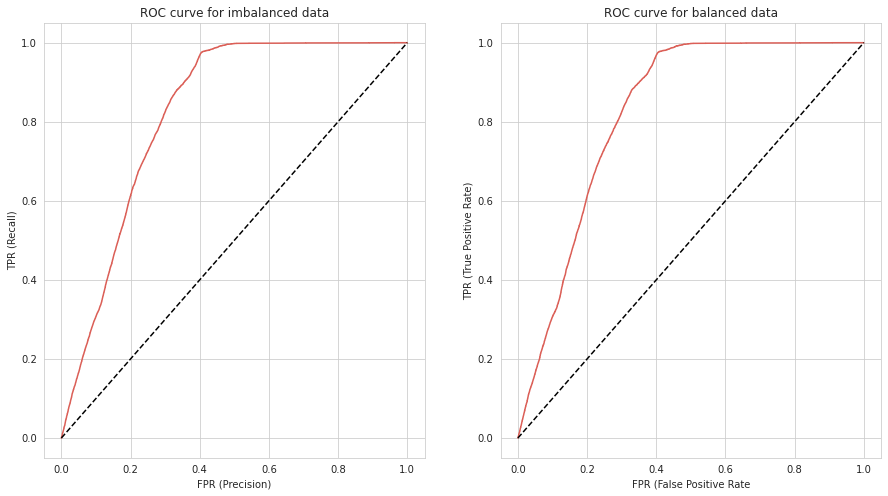

Area under curve (AUC) for imbalanced dataset:  0.8222966580801423
Area under curve (AUC) for balanced dataset:  0.8224347502250986


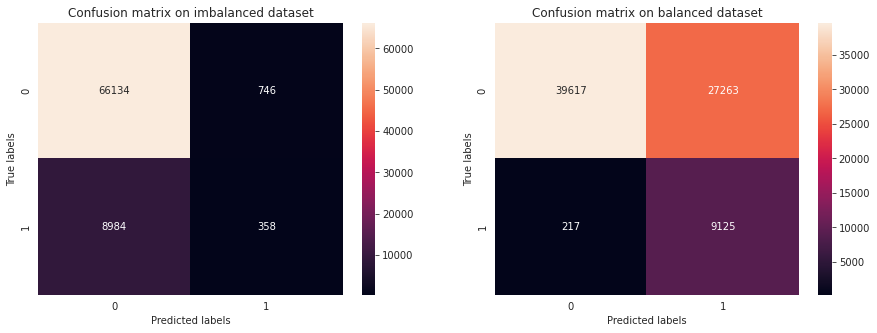

In [49]:
performance_overview(logistic_regression, X_train, y_train, X_test, y_test)

**Observation**:
* The Logistic Regression model trained on an imbalanced dataset has high accuracy, over 87%, but this is misleading as the labels in the two classes are not distributed evenly, and the model tends to choose the majority class. Furthermore, it has a very low Recall, around 0.04, which means that it can identify correctly only 4% of the positive responses. The precision is 0.34, meaning that when it predicts a positive response it is correct 34% of the time.
* The model trained on a balanced dataset has a lower accuracy, but a much higher recall, which indicates that it it correctly predicts 97% of the positive responses.
* The AUC value in both cases is almost identical.
* From the confusion matrix of the model trained on imbalanced data we can see that there are more false negatives than false positives, this is visible from the fact that the recall is smaller than the precision. Also, it is obvious from the confusion matrix that the Response is not balanced, there are more negative responses predicted than positive ones.
* From the confusion matrix of the model trained on balanced data, we can see that there are more false positives, as suggested by the low precision and high recall values, meaning that most of the times the model predicts a positive label, but in fact it belongs to the negative class.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


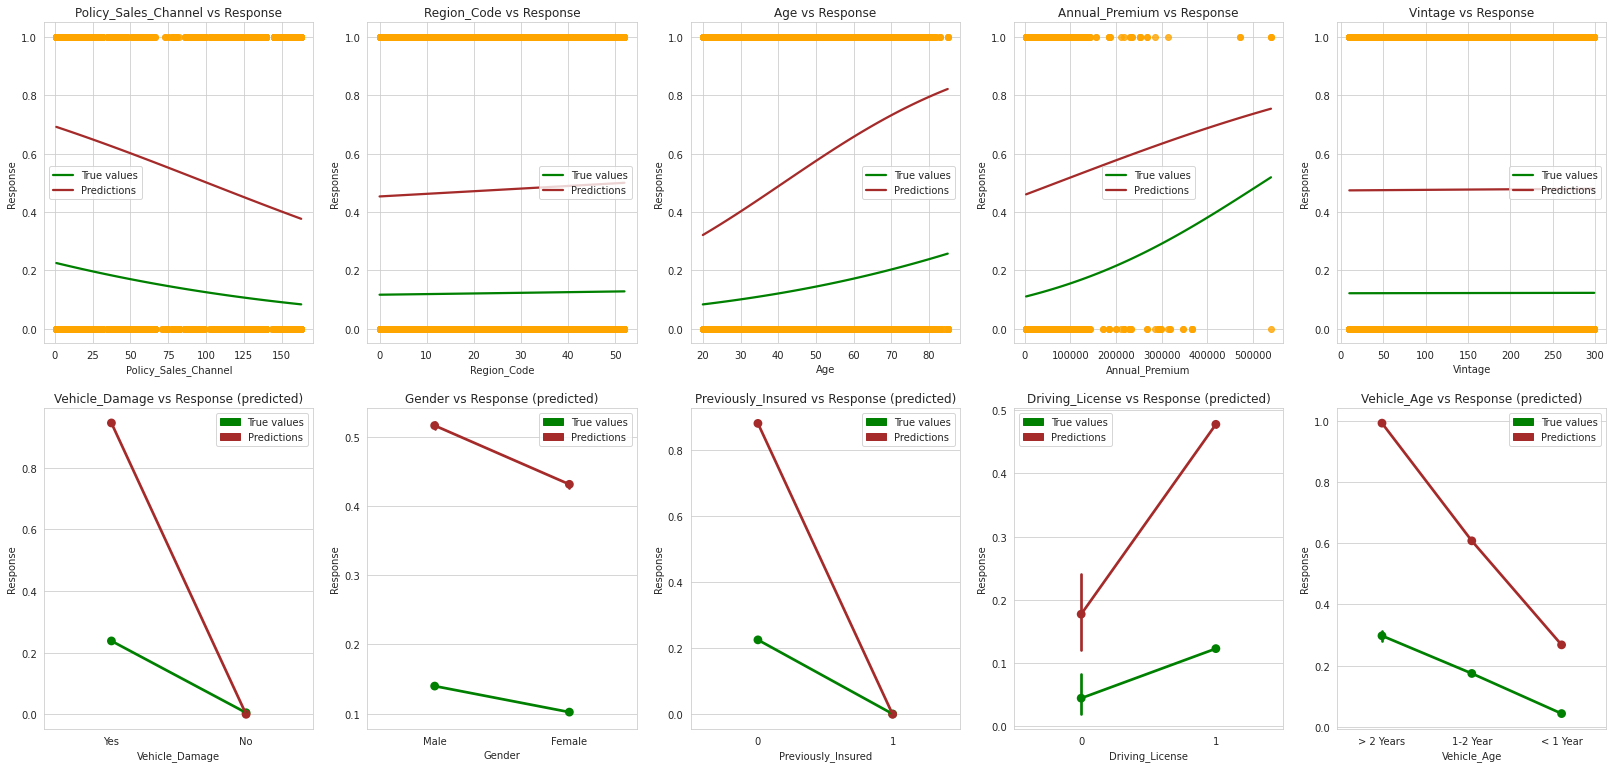

In [50]:
display_predictions(logistic_regression, X_train_balanced, y_train_balanced, X_test, y_test)

### 2. Stochastic Gradient Descent Classifier (SGD)

A simple but efficient algorithm for fitting linear classifiers, especially for large-scale and sparse data. It attempts to optimize the loss function of the Logistic Regression, by implementing a stochastic gradient descent learning algorithm (it relies on randomness during training by selecting randomly a sample of a smaller size and shuffling it at each iteration). 


In [51]:
# ensure the randomness by setting the value of the random seed
stochastic_gradient_descent = SGDClassifier(random_state=666,loss='log',class_weight={1:2})

     Metrics  Imbalanced  Balanced
0   Accuracy    0.873514  0.639172
1  Precision    0.329920  0.250666
2     Recall    0.031043  0.977200
3   F1_score    0.056746  0.398986


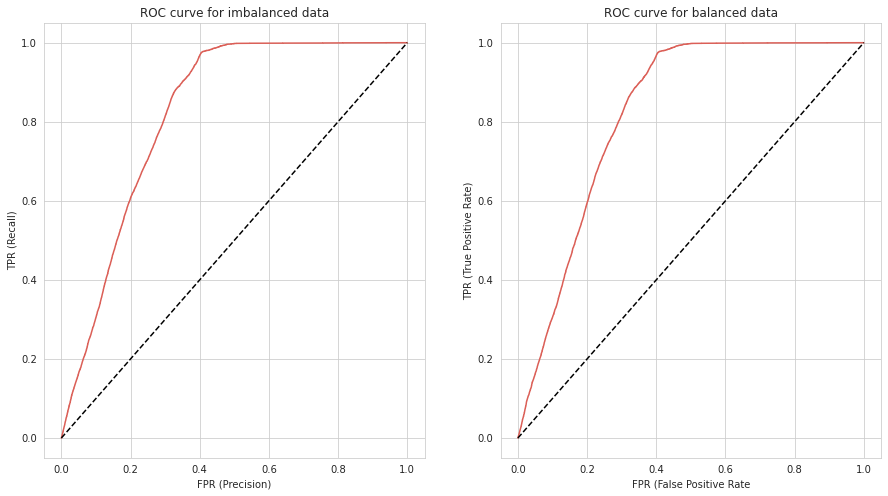

Area under curve (AUC) for imbalanced dataset:  0.8211569541372554
Area under curve (AUC) for balanced dataset:  0.8207837937226438


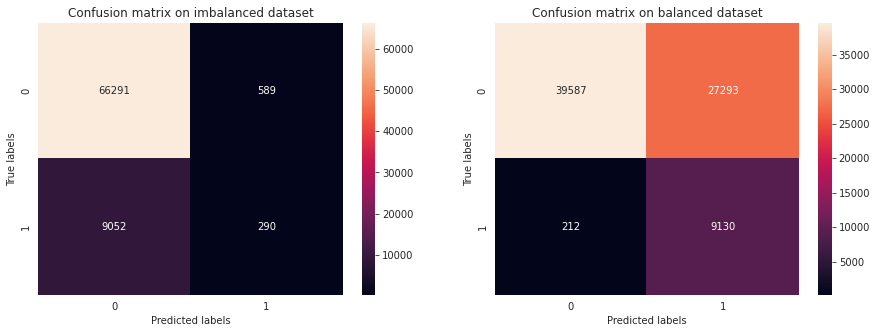

In [52]:
performance_overview(stochastic_gradient_descent, X_train, y_train, X_test, y_test)

**Observations**:
* The Stochastic Gradient Descent has similar ROC curve as the Logistic Regression, because the loss function was specified to be 'log' which gives logistic regression. However, the accuracy is higher than in case of the Logistic Regression.
* Still, the confusion matrix shows that it identifies more false positives or false negatives than the Logistic Regression model in case of using the imbalanced train set.

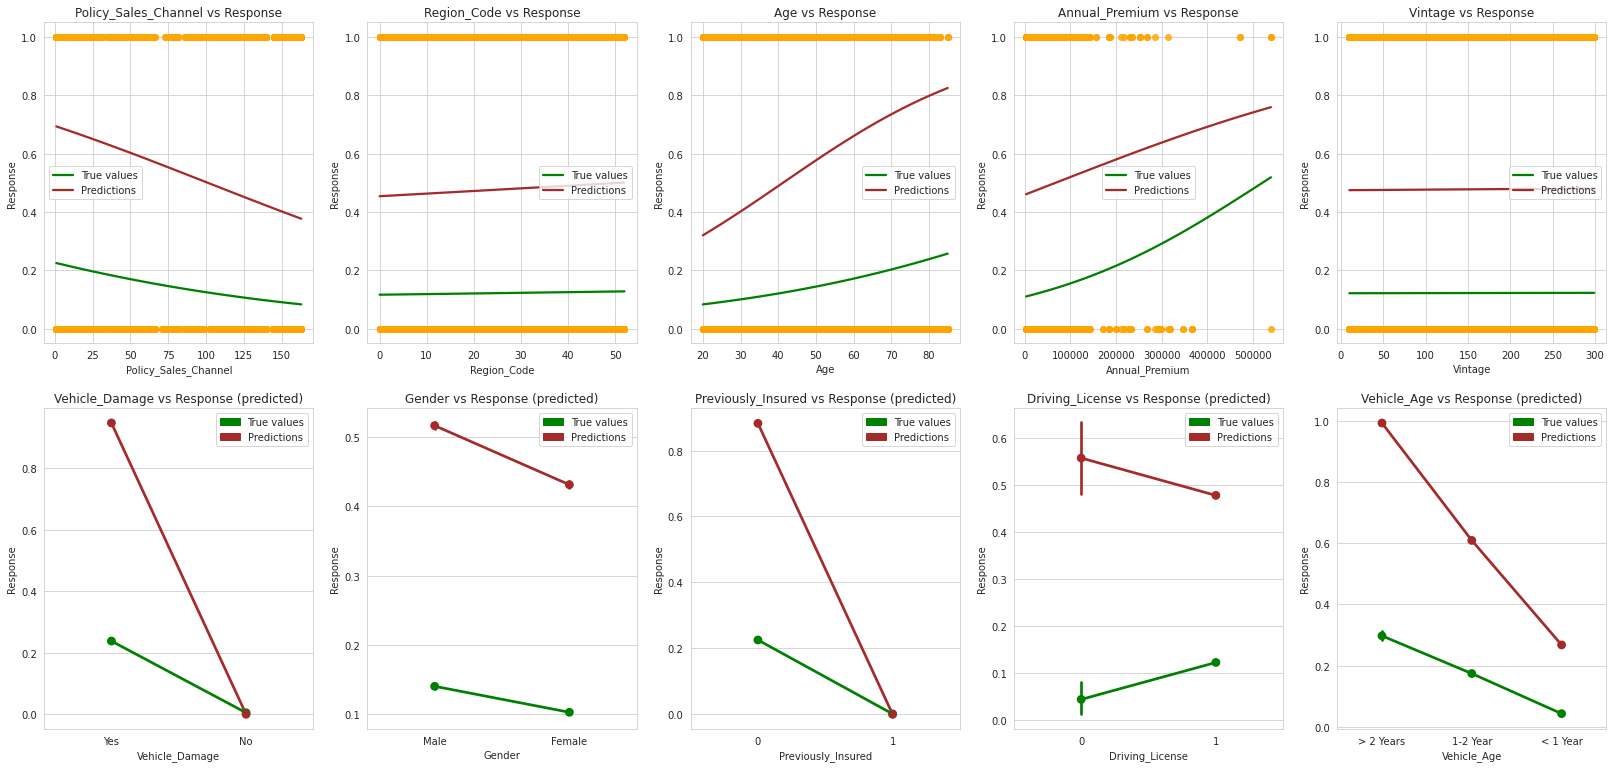

In [53]:
display_predictions(stochastic_gradient_descent, X_train_balanced, y_train_balanced, X_test, y_test)

### 3. Decision Tree Classifier 
The Decision Tree is based on a hierarchy approach, where each branch is considered to be an if-else conditional statement. At each node a condition is evaluated based on a feature, and the dataset is partitioned into subsets. The final classification is achieved at the level of the leaves.

Decision Trees are intuitive and easy to interpret, also called "white box models", as the decision they make can be easily traced and understood. Unlike Random Forests, which are ocnsidered "black box models" because it is more difficult to explain how they reached a certain decision.

In [54]:
decision_tree_classifier = DecisionTreeClassifier()

     Metrics  Imbalanced  Balanced
0   Accuracy    0.824040  0.786584
1  Precision    0.290336  0.280005
2     Recall    0.301648  0.471741
3   F1_score    0.295884  0.351421


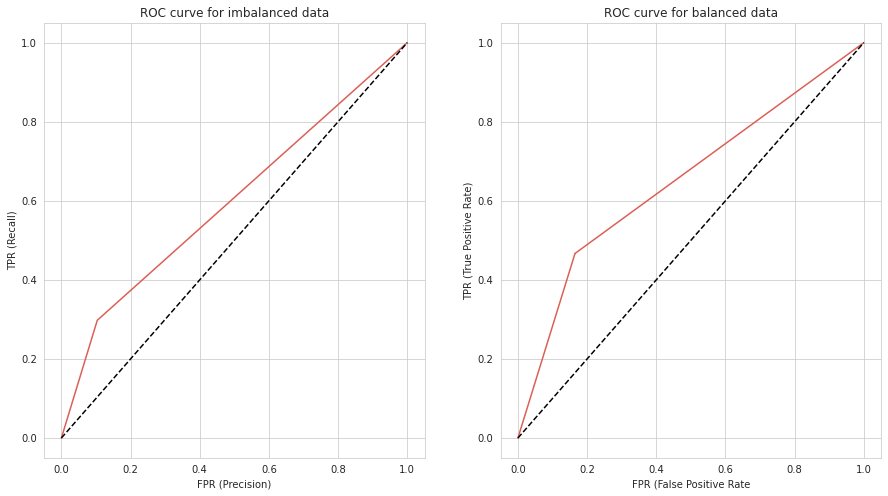

Area under curve (AUC) for imbalanced dataset:  0.5970022701600223
Area under curve (AUC) for balanced dataset:  0.6508849811623998


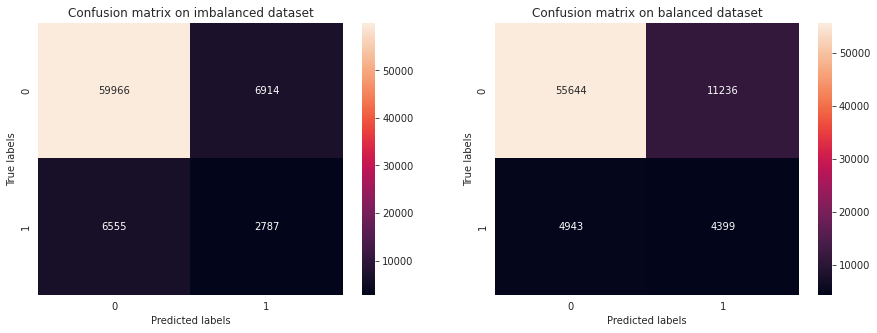

In [55]:
performance_overview(decision_tree_classifier, X_train, y_train, X_test, y_test)

**Observations**:
* The Decision Tree Classifier has a higher accuracy, 78% for the model trained on a balanced dataset, but lower recall then the previous model, around 0.47, which means that it correctly predicts 47% of the positive responses.
* It has a low F1-score, below 0.5, which means a poor balance between precision and recall.
* One improvement compared to the previous models is that it gives less false positives, and the number of false positives is almost equal to the number of false negatives. This is due to the fact that the precision and recall values are very close to each other.
* In both cases, the model has a very small AUC, around 60-65% which means the classifier is less likely to be able to distinguish the instances of the positive class from the negative class values. This is because the number of false positive and false negative predictions is still quite high.

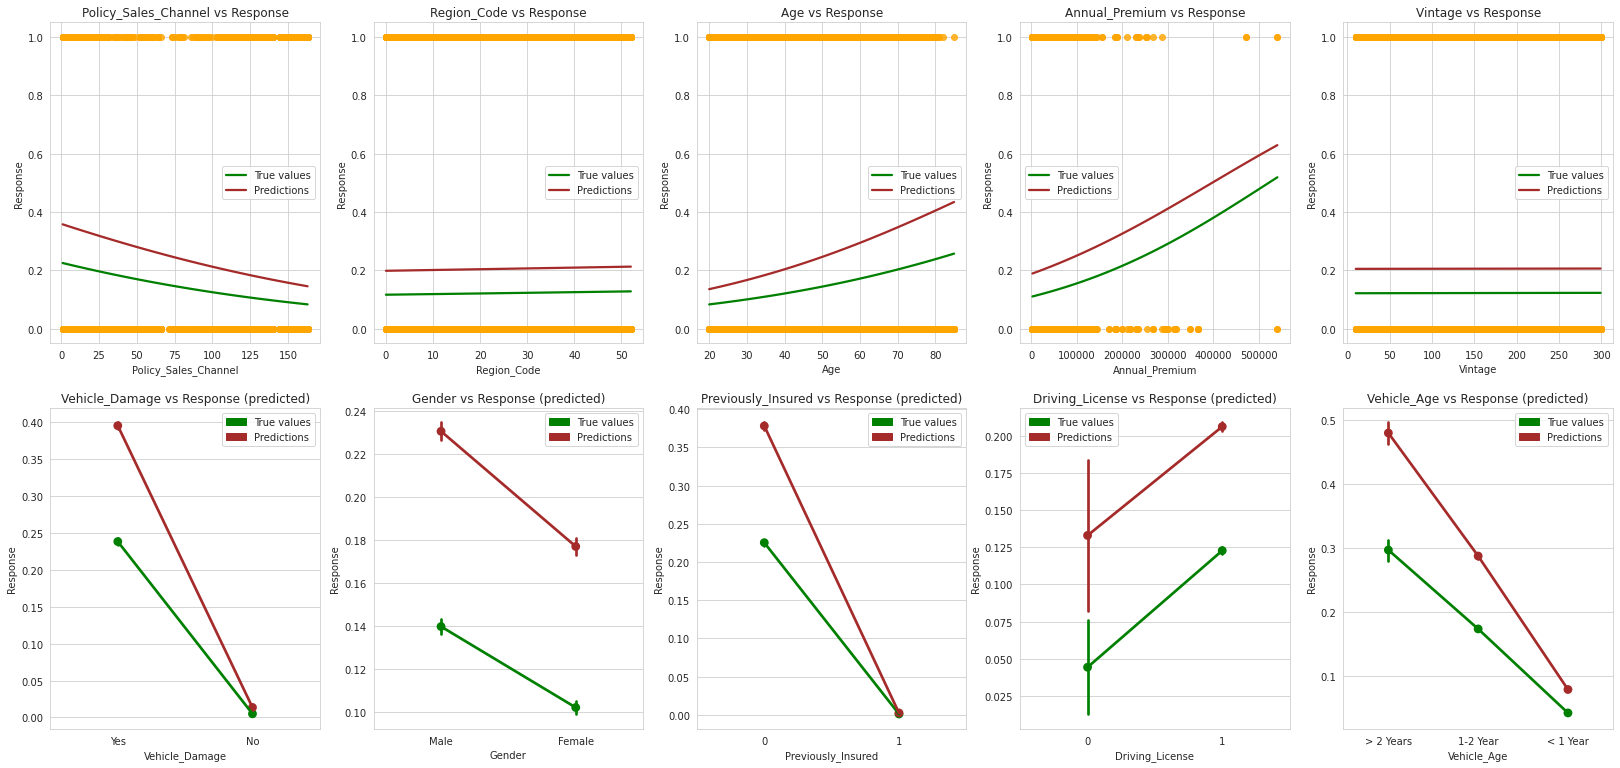

In [56]:
display_predictions(decision_tree_classifier, X_train_balanced, y_train_balanced, X_test, y_test)

### 4. Random Forest Classifier 
Random Forest is a collection of Decision Tree Classifiers. It aggregates results from multiple predictors and it uses a bagging technique, which allows training ecah tree on a randomly sampled dataset and take the majority vote from these trees. Compared to the decision tree, it is more general and has better prediction, but it is also more complex with multiple layers.

We se a BalancedRandomForestClassifier, because compared to the simple RandomForestClassifier this one uses averaging to improve the predictive accuracy and control over-fitting.

In [57]:
random_forest_classifier = BalancedRandomForestClassifier()

     Metrics  Imbalanced  Balanced
0   Accuracy    0.707762  0.762628
1  Precision    0.283780  0.304918
2     Recall    0.908478  0.732070
3   F1_score    0.432470  0.430518


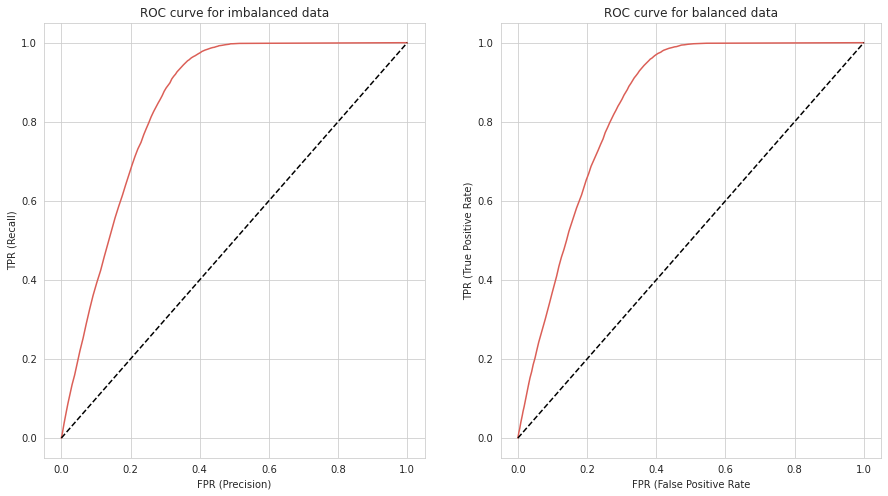

Area under curve (AUC) for imbalanced dataset:  0.8448625429454263
Area under curve (AUC) for balanced dataset:  0.8390220538016306


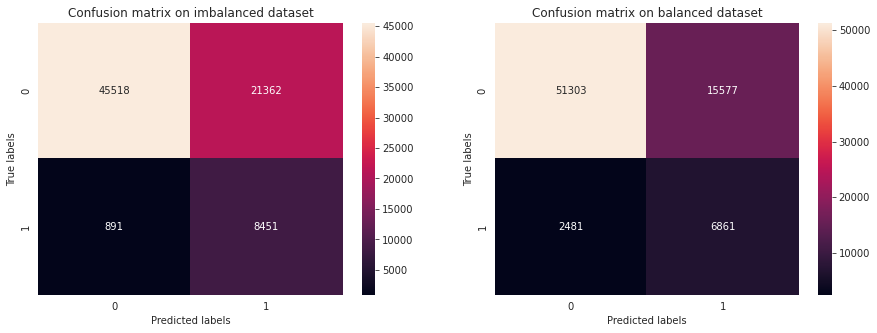

In [58]:
performance_overview(random_forest_classifier, X_train, y_train, X_test, y_test)

**Observations**:
* The Random Forest Classifier has an accuracy, over 70% in both cases (when trained on an imbalanced or balanced dataset).
* It has a lower recall and higher precision score when trained on the balanced dataset, meaning that it returns fewer positive responses, but the ones predicted as positive were most of the times correct (true positive).
* It has a higher F1-score, around 0.4, in both cases than the Decision Tree Classifier, which had an F1-score around 0.3.
* The confusion matrix shows that it gives more true positives/negatives than the Decision Tree Classifier alone. 
* The AUC value is much higher than in case of teh Logistic Regression model, around 85%, meaning that there is a higher chance that the classifier will be able to distinguish the positive responses from the negative ones (it can detect more true positives/negatives than false positives/negatives).

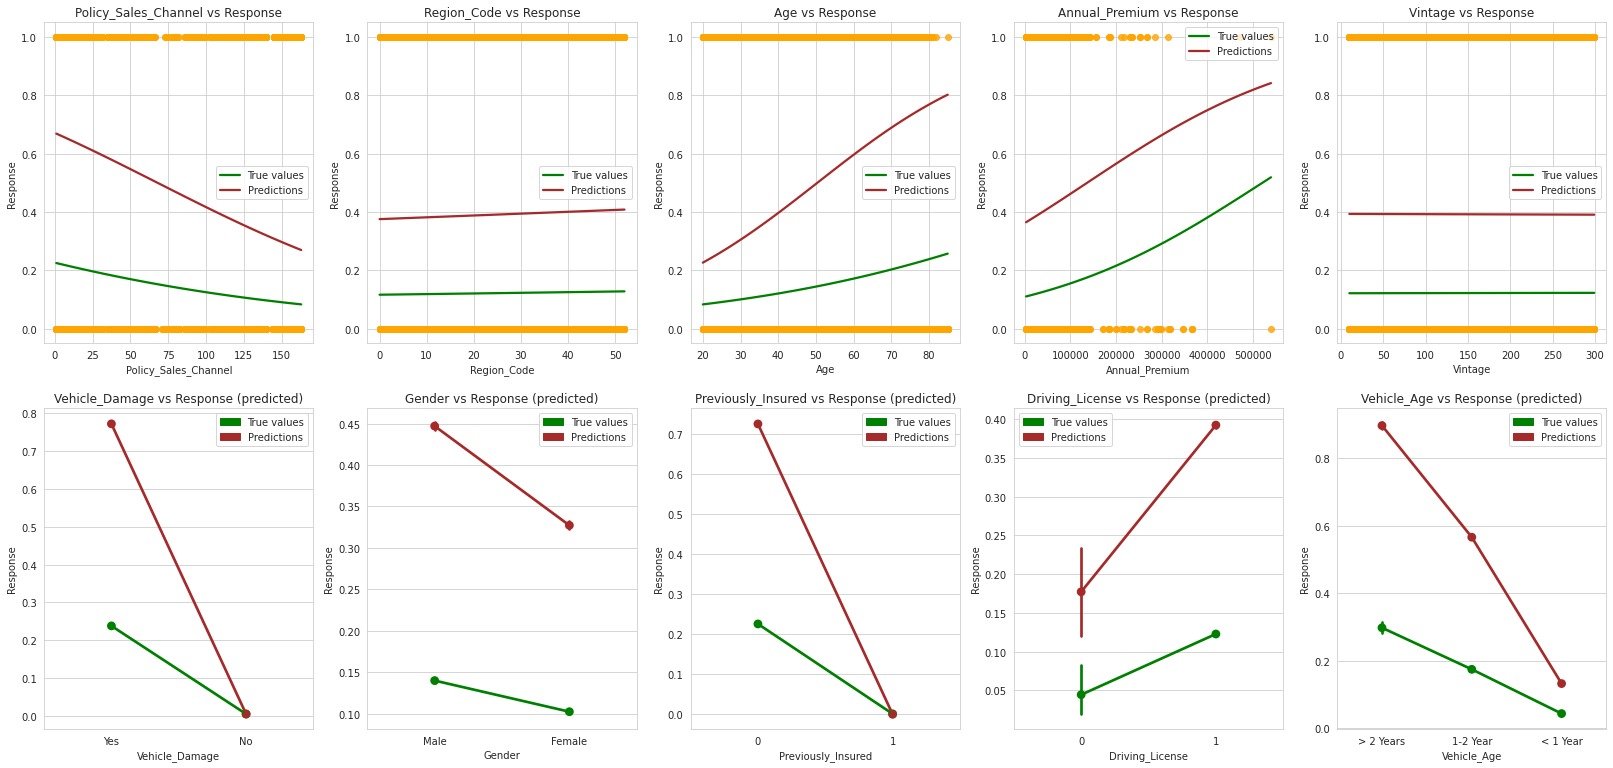

In [59]:
display_predictions(random_forest_classifier, X_train, y_train, X_test, y_test)

### 5. Support Vector Classifier
Support Vector Machines can find the best way to classifiy the data, when the 2 classes can be clearly separated with a straight line. The decision boundary of a Support Vector Classifier separates clearly the 2 classes and stays as far away from the closest training instances as possible. It tries to fit the widest possible street between 2 classes, aslo called the _large margin classification_.

The support vector machines are based around a kernel function and they do not need many training examples. To speed up the algorithm, we use a linear kernel and a smaller training set, only 10% of the original dataset:

In [60]:
support_vector_classifier = SVC(C=1, kernel='linear', probability=True)

In [61]:
def reduce_dataset(X, y, ratio):
  """
    Select randomly 10% of the data from the original training set
  """
  nr_samples = X.shape[0]*ratio;
  X_reduced, y_reduced = shuffle(X, y, random_state = 0, n_samples = int(nr_samples))

  return X_reduced, y_reduced

In [62]:
X_train_reduced, y_train_reduced = reduce_dataset(X_train, y_train, 0.1)

# check that the size of the training data has indeed been reduced
print("Original dataset shape:" , X_train.shape)
print("Reduced dataset shape:" , X_train_reduced.shape)

Original dataset shape: (304887, 11)
Reduced dataset shape: (30488, 11)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


     Metrics  Imbalanced  Balanced
0   Accuracy    0.877437  0.640196
1  Precision    0.000000  0.251122
2     Recall    0.000000  0.976557
3   F1_score    0.000000  0.399510


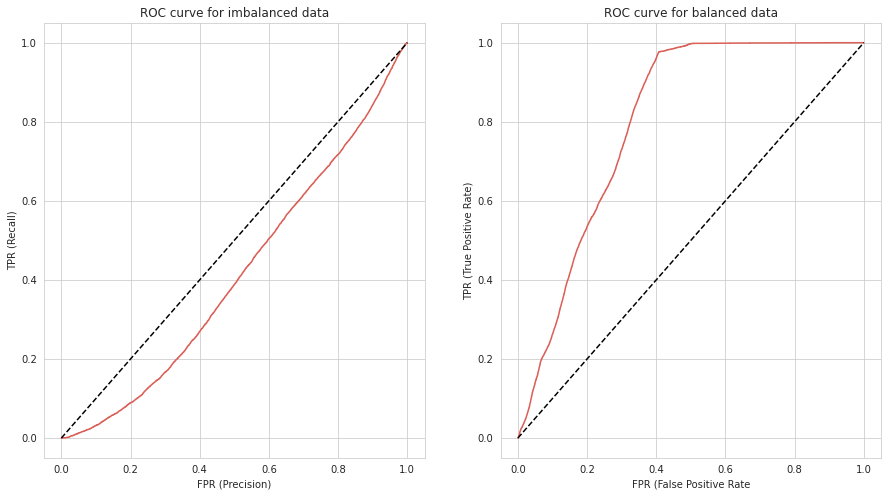

Area under curve (AUC) for imbalanced dataset:  0.41188802607506975
Area under curve (AUC) for balanced dataset:  0.8005036020252214


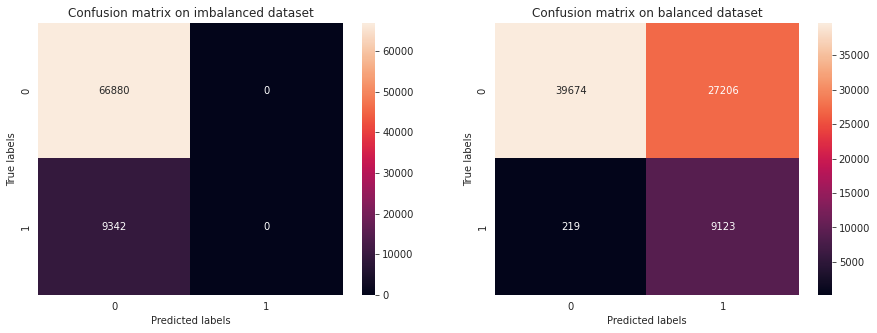

In [63]:
performance_overview(support_vector_classifier, X_train_reduced, y_train_reduced, X_test, y_test)

**Observations**:
* The accuracy is lower when the model is trained on a balanced dataset, which is what we would expect based on the previous explanations. In this case, the model can correctly identify 9123 positive responses (true positives) with a 64% accuracy.
* It is interesting to note that when the model is trained on a balanced dataset, it gives a very high recall value, meaning that it manages to correctly predict 97% of the positive responses.
* The AUC value is much higher when the model is trained on a balanced dataset, which means that the model has a 77% chance of correctly distinguishig between the positive and negative classes (true predictions).

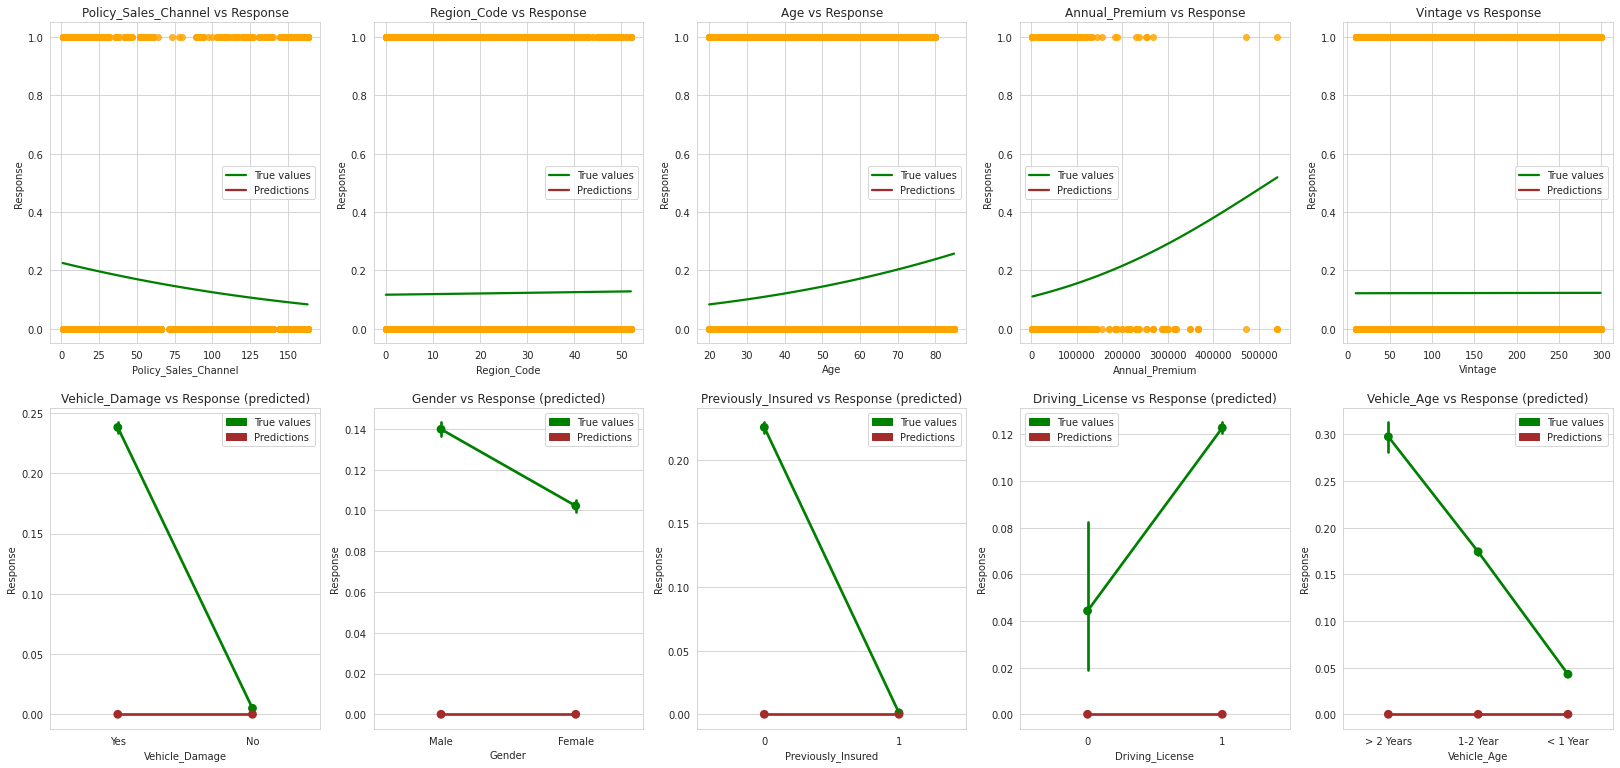

In [64]:
display_predictions(support_vector_classifier, X_train_reduced, y_train_reduced, X_test, y_test)

### 6. KNeighbours Classifier

In this case each data point is represented in an n-dimensional space defined by n-features, and it calculates the distance between 2 points assigning a label to it based on the labels of the neighbour points. It can be used to build recommendation systems which takes into consideration the previously computed and assigned labels when making a prediction.
In this case 10 features are used to train the model, so the points will be  defined in a 10-dimensional space.

In [65]:
kneighbours_classifier = KNeighborsClassifier()

     Metrics  Imbalanced  Balanced
0   Accuracy    0.855737  0.748340
1  Precision    0.332115  0.282127
2     Recall    0.175123  0.681974
3   F1_score    0.229324  0.399135


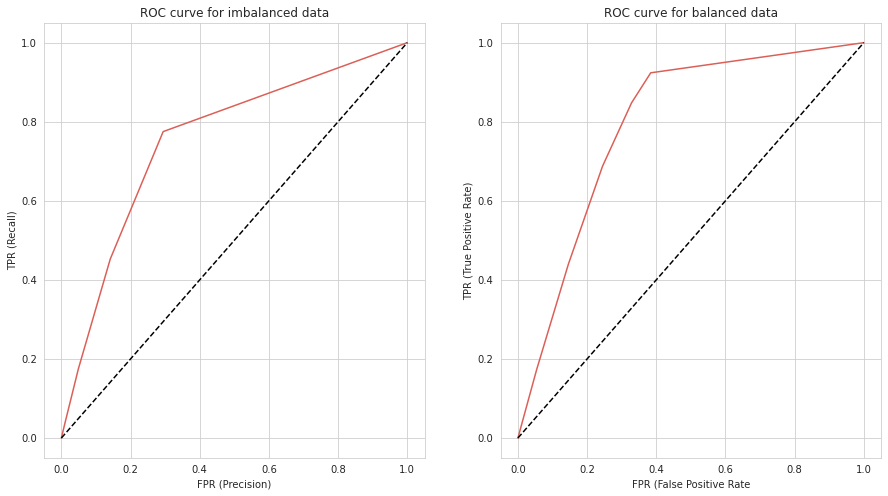

Area under curve (AUC) for imbalanced dataset:  0.7534967111345172
Area under curve (AUC) for balanced dataset:  0.7945114618448965


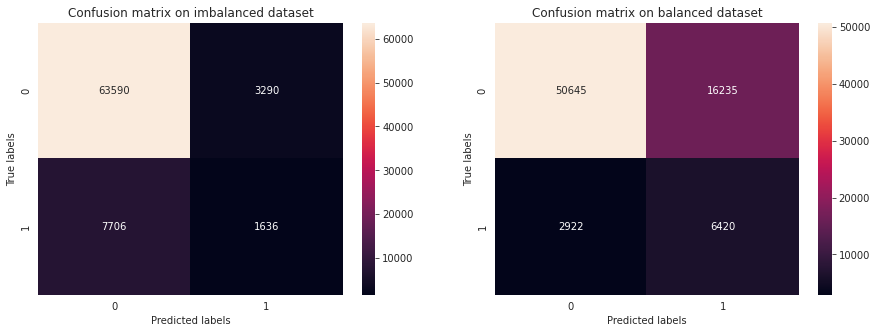

In [66]:
performance_overview(kneighbours_classifier, X_train, y_train, X_test, y_test)

**Observation**:
* Similarly to the Decision Tree Classifier, it has high accuracy score and precision, and the AUC value is quite high, around 0.75 respectively 0.79 for balanced dataset.
* We can also see that it identifies less false negatives, but more false positives in case of the balanced dataset due to the higher recall and lower precision scores, which mean that it can identify more positive responses, the number of true positives and false positives is higher, but most of the times it predicts an incorrect positive response (false positive).

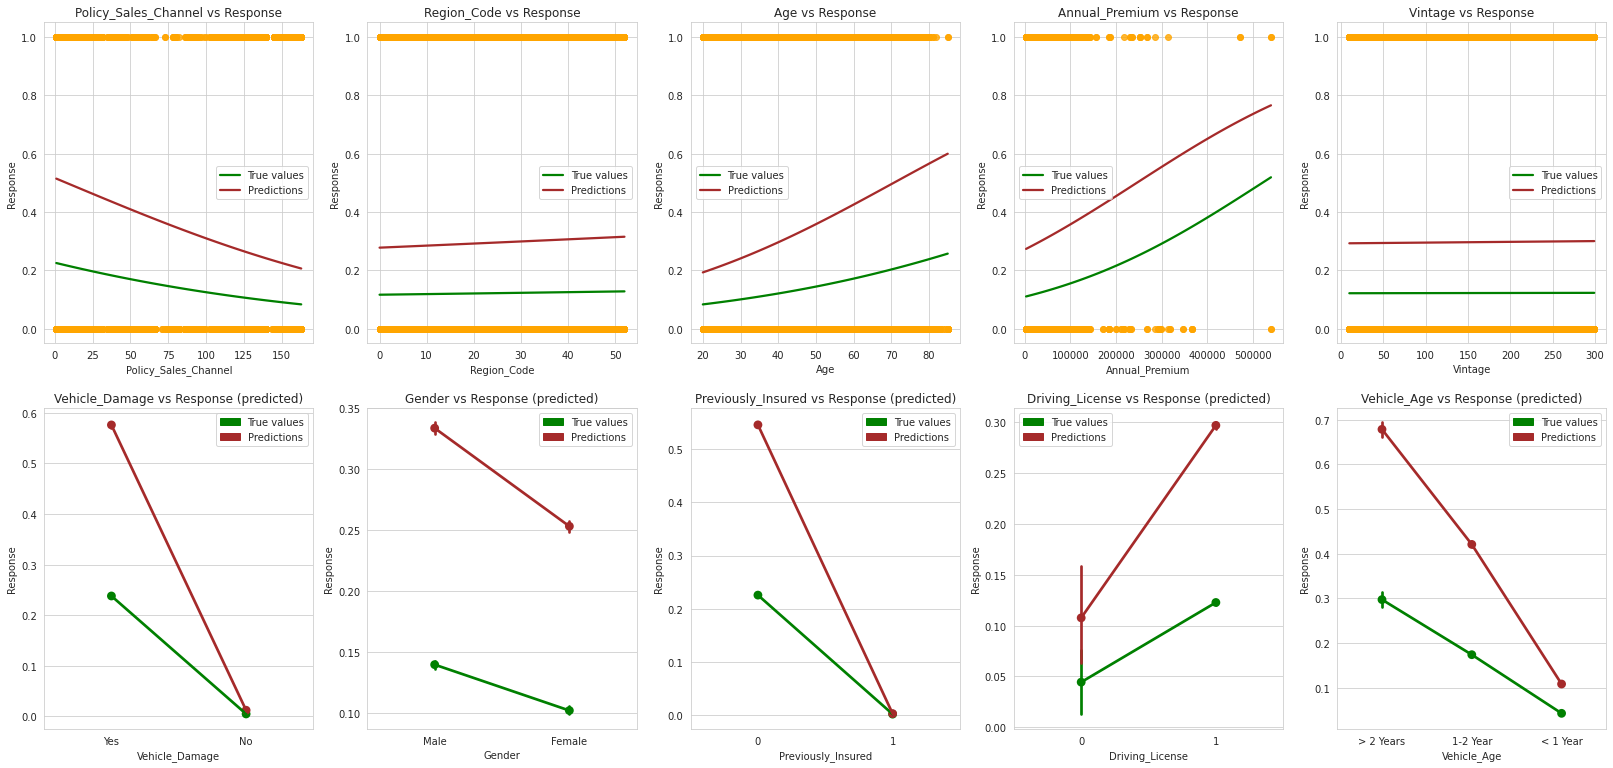

In [67]:
display_predictions(kneighbours_classifier, X_train_balanced, y_train_balanced, X_test, y_test)

### 7. Naive Bayes
Based on Bayes's Probability Theorem it calculates the conditional probabilities based on previous knowledge and assuming that each feature is independent of each other. Compared to the other algorithms it stands out due to the fact that it can perform relatively well even on a small dataset. 

The Gaussian Naive Bayes classifier has a normal distribution compared to the simple Naive Bayes Classifier.

In [68]:
gaussian_naive_bayes_classifier = GaussianNB()

     Metrics  Imbalanced  Balanced
0   Accuracy    0.640196  0.640196
1  Precision    0.251122  0.251122
2     Recall    0.976557  0.976557
3   F1_score    0.399510  0.399510


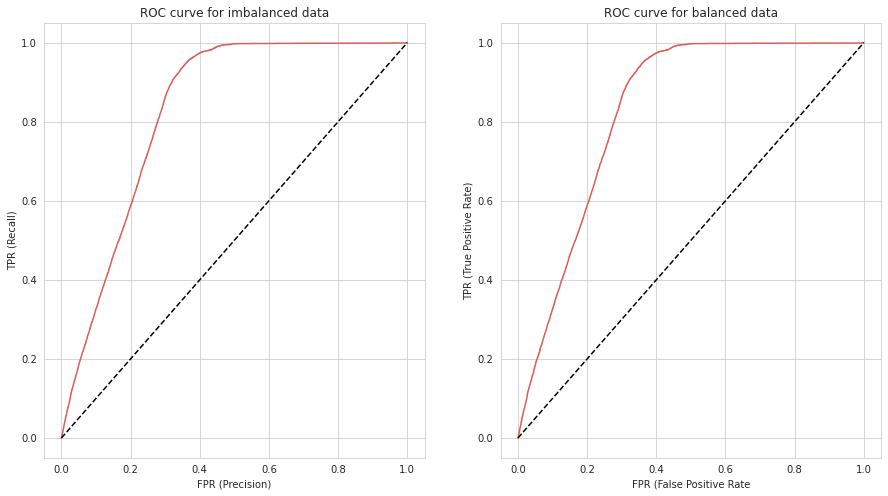

Area under curve (AUC) for imbalanced dataset:  0.826895552728379
Area under curve (AUC) for balanced dataset:  0.8270431232131682


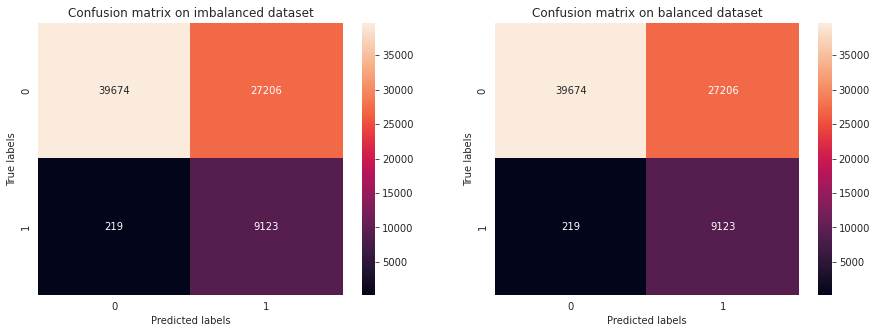

In [69]:
performance_overview(gaussian_naive_bayes_classifier, X_train, y_train, X_test, y_test)

**Observations**:
* We can see that, in this case, the Naive Bayes model performs the same way, independently whether it was trained on a balanced or imbalanced dataset.
* The Naive Bayes Classifier gives a very high value of false positives, which in turn results in a high recall but low precision, meaning that it returns more positive responses, but most of the predicted labels are incorrect.
* The F1-score is also high, 0.4, and also the AUC value, around 0.82, which means that overall, the relationship between the precision and recall is optimal.

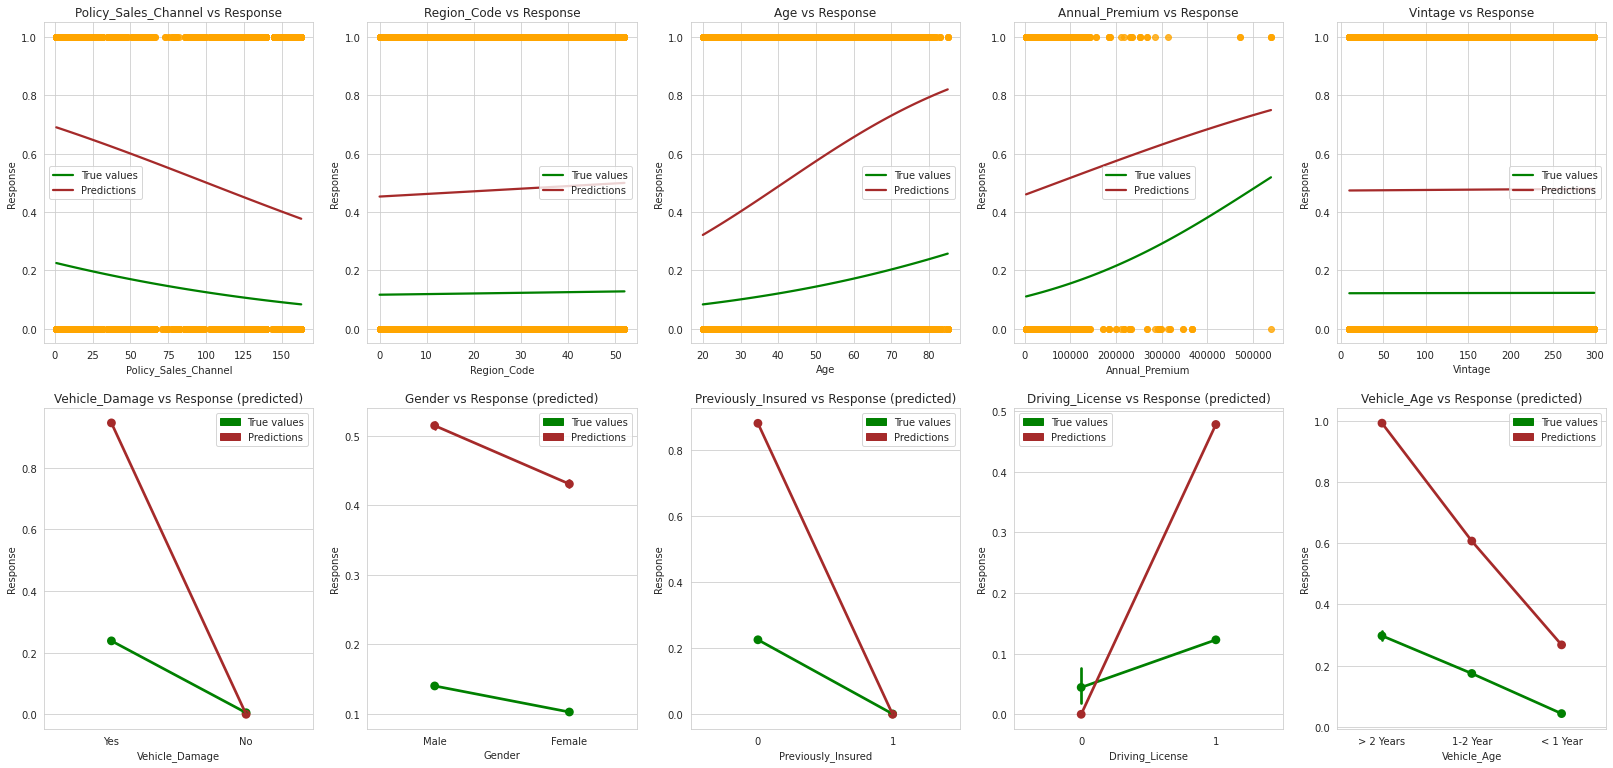

In [70]:
display_predictions(gaussian_naive_bayes_classifier, X_train, y_train, X_test, y_test)

## Boosting

### AdaBoost (Adaptive Boosting)

AdaBoost uses a technique for optimizing the predictions by taking into consideration the training instances that its predecessor has underfitted. 

First, it trains a first base classifier, for ex a Decision Tree, to make predictions on the training set, then it updates the weights of the misclassified instances and it trains a second classifier.
This way, the second classifier will do better than the first.

Similarly to the Gradient Descent Classifier it utilizes a sequential learning technique, but instead of trying to minimize the cost function of one predictor, it ensembles multiple predictors to perform better.

In [71]:
# as there are just 2 classes, we can use SAMME (Stagewise Additive Modeling using Multiclass Exponential loss function)
# SAMME.R relies on class probbailities, rather than predictions and it performs better
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME.R")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


     Metrics  Imbalanced  Balanced
0   Accuracy    0.877437  0.736795
1  Precision    0.000000  0.300995
2     Recall    0.000000  0.867801
3   F1_score    0.000000  0.446962


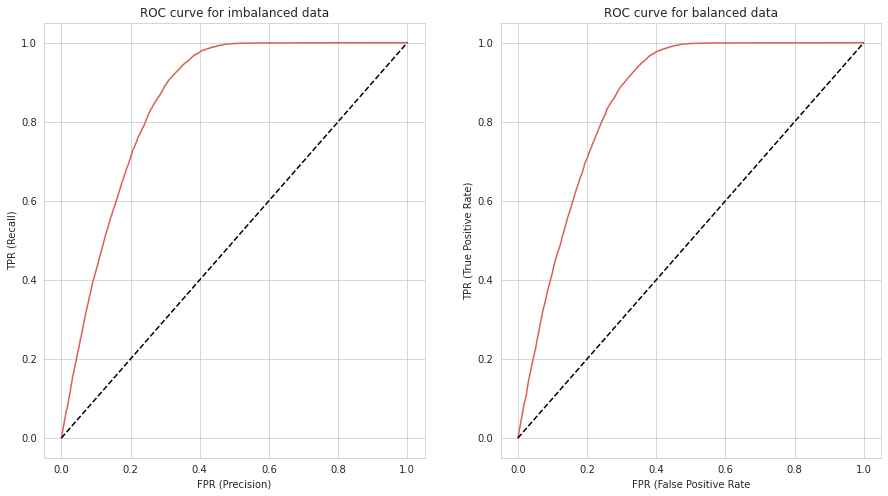

Area under curve (AUC) for imbalanced dataset:  0.853336645310472
Area under curve (AUC) for balanced dataset:  0.8529359797844074


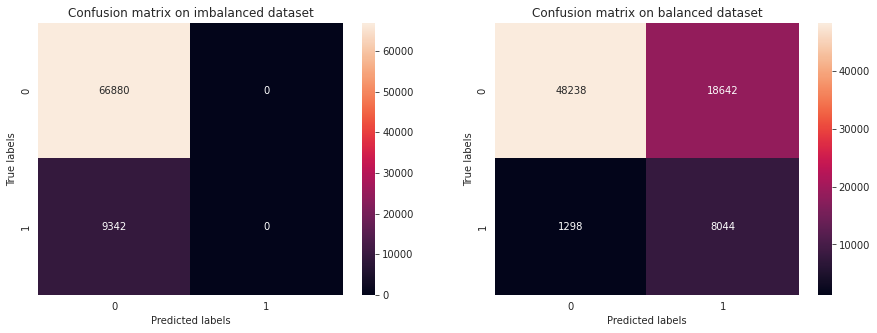

In [72]:
performance_overview(ada_boost, X_train, y_train, X_test, y_test)

**Observations**:
* The AdaBoost has a high accuracy, 0.87, when it is trained on an imbalanced dataset but the high value is misleading as shown in the second case, when it is trained on a balanced dataset and the accuracy is much lower, only 0.73.
* On the confusion matrix we can see that, in case of the imbalanced dataset no positive response were returned, meaning that the model is highly influenced by the majority class, and tends to predict a negative response as that one appeared more frequently in the training set as well. This is how it achieves such high accuracy.
* When trained on a balanced dataset, however, it is able to identify correctly 8088 positive responses, as shown in the corresponding confusion matrix. Furthermore it identifies many false positives as well indicating a high recall (85%).
* The AUC value is very good in for both imbalanced and balanced dataset, around 85%, but the F1-score is below 0.5, meaning that the precision and recall balance is not optimal.

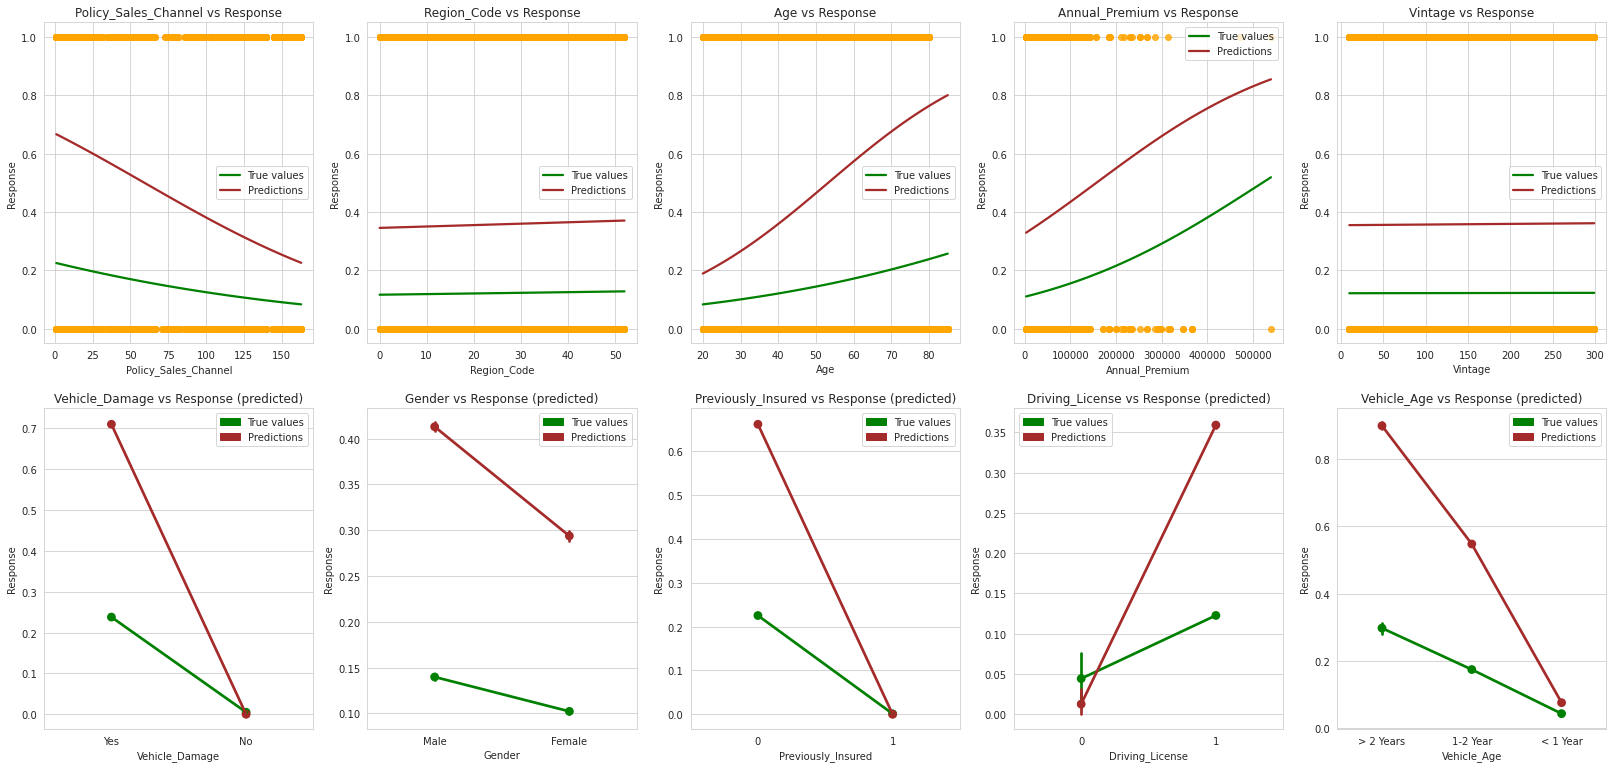

In [73]:
display_predictions(ada_boost, X_train_balanced, y_train_balanced, X_test, y_test)

### Gradient Boosting

Similarly to AdaBoost it sequentially adds predictors to an ensemble, each one adding corrections to the predictions of its predecessor. The difference is that Gradient Boosting tries to train the new predictor on the _residual errors_ (the difference between the expected/true outcome and the actual/predicted outcome) of the previous predictor.

In [74]:
gradient_boosting = GradientBoostingClassifier()

     Metrics  Imbalanced  Balanced
0   Accuracy    0.877411  0.736362
1  Precision    0.375000  0.300863
2     Recall    0.000321  0.869514
3   F1_score    0.000642  0.447043


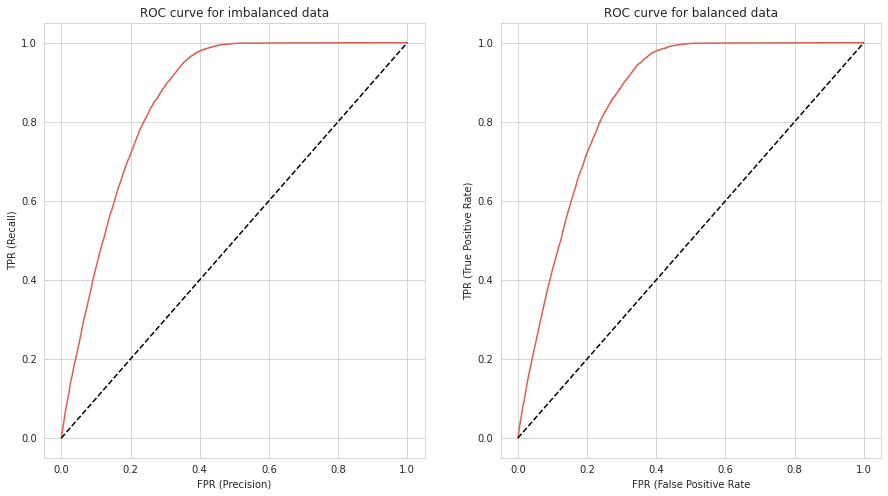

Area under curve (AUC) for imbalanced dataset:  0.8561910276645883
Area under curve (AUC) for balanced dataset:  0.8558466543861185


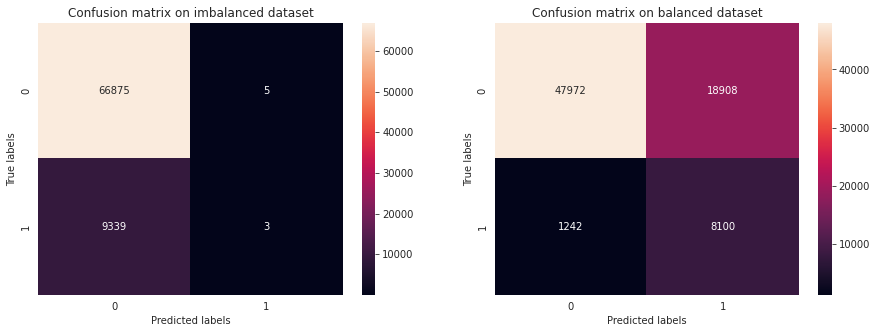

In [75]:
performance_overview(gradient_boosting, X_train, y_train, X_test, y_test)

**Observations**:
* Similarly to the AdaBoost, the recall is very low, and the number of true positives that resulted is few.
* The AUC value is also almost the same as in case of the AdaBoost algorithm, but the high value is misleading, because in fact the value of the predicted labels is skewed, there are more negative responses than positive.
* The recall value is very low in case the model is fitted on an imbalanced training set, because the number of positive responses returned by the model is also very small. But it gives a recall of 86% when fitted on a balanced training set. It means that it can predict correctly 86% of the positive responses. The precision is below 30%, meaning that when it predicts that a response is positive, it is correct only 30% of the times, which would result in a high number of false positives, as shown in the corresponding confusion matrix as well.

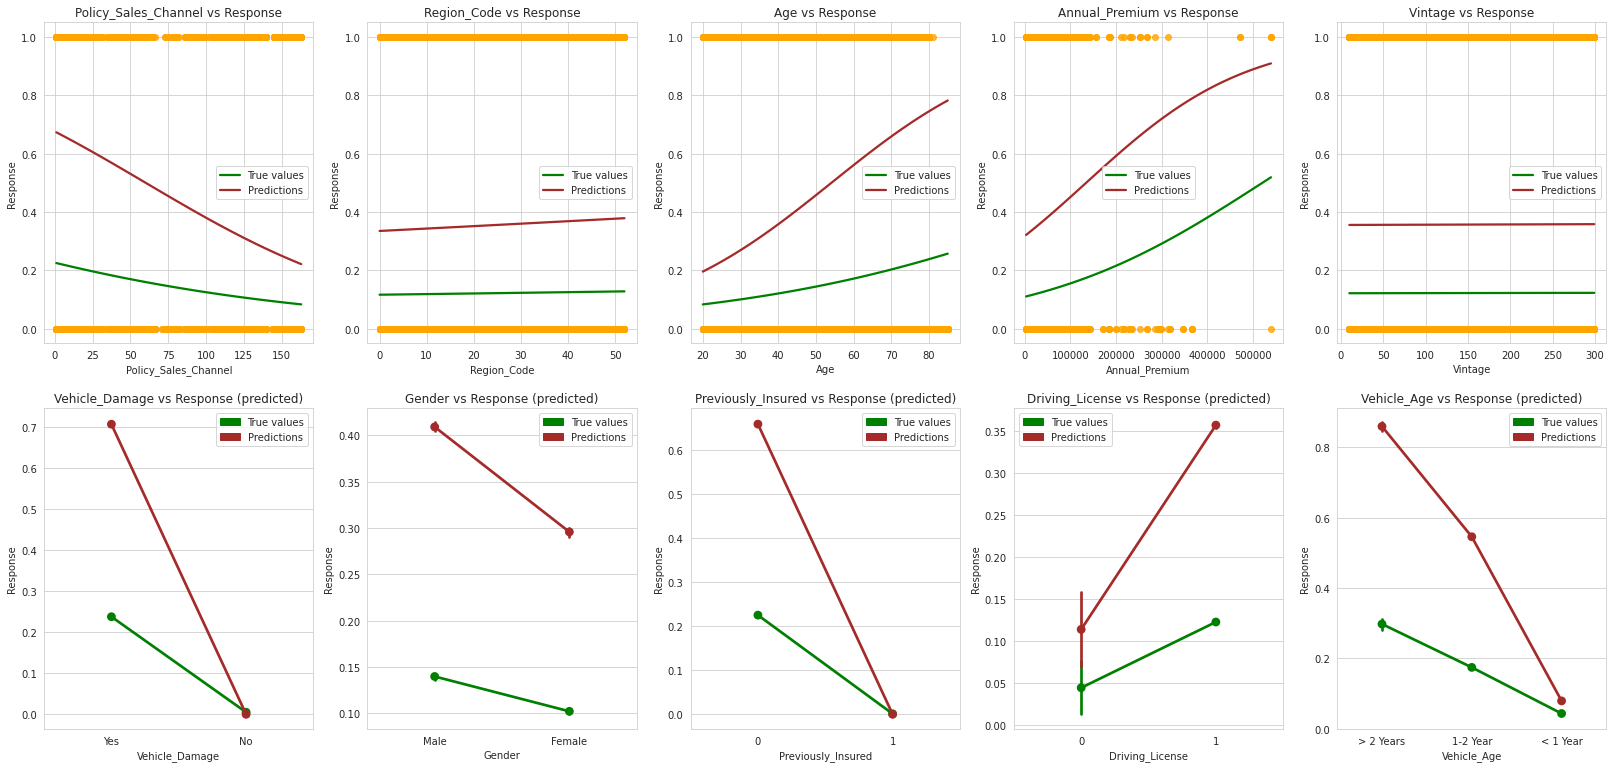

In [76]:
display_predictions(gradient_boosting, X_train_balanced, y_train_balanced, X_test, y_test)

## Compare different models:

In [77]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
  """
    Train and evaluate the given model based on some performance metrics.
  """
  # train the model
  model.fit(prepare_data(X_train), y_train)

  # make predictions
  predictions = model.predict(prepare_data(X_test))

  accuracy = metrics.accuracy_score(y_test, predictions)
  precision = metrics.precision_score(y_test, predictions)
  recall = metrics.recall_score(y_test, predictions)
  f1 = metrics.f1_score(y_test, predictions)
  fpr, tpr, _thresholds = metrics.roc_curve(y_test, predictions)
  auc = round(metrics.auc(fpr, tpr), 2)
  conf_matrix = metrics.confusion_matrix(y_test, predictions)
  
  return [accuracy, precision, recall, f1, auc, conf_matrix]

In [78]:
def compare_performance_of_models(models, X_train, y_train, X_test, y_test):
  """
     Collect the results of the measurements of different prediction models into a table.
  """

  model_names = []
  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []
  auc_list = []
  conf_matrix_list = []

  X_train_balanced, y_train_balanced = resample_data(X_train, y_train, over=0.3, under = 0.7)

  for name, model in models:
    [accuracy, precision, recall, f1, auc, conf_matrix] = evaluate_model(model, X_train_balanced, y_train_balanced, X_test, y_test)
    model_names.append(name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)
    conf_matrix_list.append(conf_matrix)

  return pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_list, 'Precision': precision_list, 'Recall': recall_list, 'F1-score': f1_list, 'AUC': auc_list, 'Confusion matrix': conf_matrix_list})

In [79]:
models = [('Logistic Regression', LogisticRegression(solver="liblinear",  class_weight={1:2}, random_state=666)),
  ('Stochastic Gradient Descent', SGDClassifier(random_state=666,loss='log',class_weight={1:2})),
  ('Decision Tree Classifier', DecisionTreeClassifier()),
  ('Random Forest Classifier', BalancedRandomForestClassifier()),
  ('KNeighbours Classifier', KNeighborsClassifier()),
  ('Gaussian Naive Bayes Classifier', GaussianNB()),
  ('AdaBoost Classifier',  AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME.R")),
  ('Gradient Boosting Classifier', GradientBoostingClassifier())]

comparison_table = compare_performance_of_models(models, X_train, y_train, X_test, y_test)

In [80]:
comparison_table

Model  Accuracy  Precision    Recall  F1-score  \
0              Logistic Regression  0.639566   0.250804  0.976665  0.399116   
1      Stochastic Gradient Descent  0.639172   0.250666  0.977200  0.398986   
2         Decision Tree Classifier  0.786912   0.279073  0.466495  0.349227   
3         Random Forest Classifier  0.763179   0.306784  0.740098  0.433765   
4           KNeighbours Classifier  0.747566   0.280169  0.675230  0.396020   
5  Gaussian Naive Bayes Classifier  0.640196   0.251122  0.976557  0.399510   
6              AdaBoost Classifier  0.740101   0.302237  0.856241  0.446772   
7     Gradient Boosting Classifier  0.736507   0.300971  0.869407  0.447148   

    AUC                Confusion matrix  
0  0.78   [[39625, 27255], [218, 9124]]  
1  0.78   [[39590, 27290], [213, 9129]]  
2  0.65  [[55622, 11258], [4984, 4358]]  
3  0.75  [[51257, 15623], [2428, 6914]]  
4  0.72  [[50673, 16207], [3034, 6308]]  
5  0.78   [[39674, 27206], [219, 9123]]  
6  0.79  [[48413, 18467], [1343, 7999]]  
7  0.79  [[48016, 18864], [1220, 8122]]

Evaluate the performance of the Support Vector Classifier on a smaller training set and append the result of measurements to the table:

In [81]:
# reduce the training set
X_train_reduced, y_train_reduced = reduce_dataset(X_train, y_train, ratio=0.1)

support_vector_classifier = SVC(C=1, kernel='linear', probability=True)
models.append(('Support Vector Classifier', support_vector_classifier))

# append the measurement of the support vector classifier as well based on a smaller training set
[accuracy, precision, recall, f1, auc, conf_matrix] = evaluate_model(support_vector_classifier, X_train_reduced, y_train_reduced, X_test, y_test)
comparison_table.append({'Model': 'Support Vector Classifier', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'AUC': auc, 'Confusion matrix': conf_matrix}, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model  Accuracy  Precision    Recall  F1-score  \
0              Logistic Regression  0.639566   0.250804  0.976665  0.399116   
1      Stochastic Gradient Descent  0.639172   0.250666  0.977200  0.398986   
2         Decision Tree Classifier  0.786912   0.279073  0.466495  0.349227   
3         Random Forest Classifier  0.763179   0.306784  0.740098  0.433765   
4           KNeighbours Classifier  0.747566   0.280169  0.675230  0.396020   
5  Gaussian Naive Bayes Classifier  0.640196   0.251122  0.976557  0.399510   
6              AdaBoost Classifier  0.740101   0.302237  0.856241  0.446772   
7     Gradient Boosting Classifier  0.736507   0.300971  0.869407  0.447148   
8        Support Vector Classifier  0.877437   0.000000  0.000000  0.000000   

    AUC                Confusion matrix  
0  0.78   [[39625, 27255], [218, 9124]]  
1  0.78   [[39590, 27290], [213, 9129]]  
2  0.65  [[55622, 11258], [4984, 4358]]  
3  0.75  [[51257, 15623], [2428, 6914]]  
4  0.72  [[50673, 16207], [3034, 6308]]  
5  0.78   [[39674, 27206], [219, 9123]]  
6  0.79  [[48413, 18467], [1343, 7999]]  
7  0.79  [[48016, 18864], [1220, 8122]]  
8  0.50         [[66880, 0], [9342, 0]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

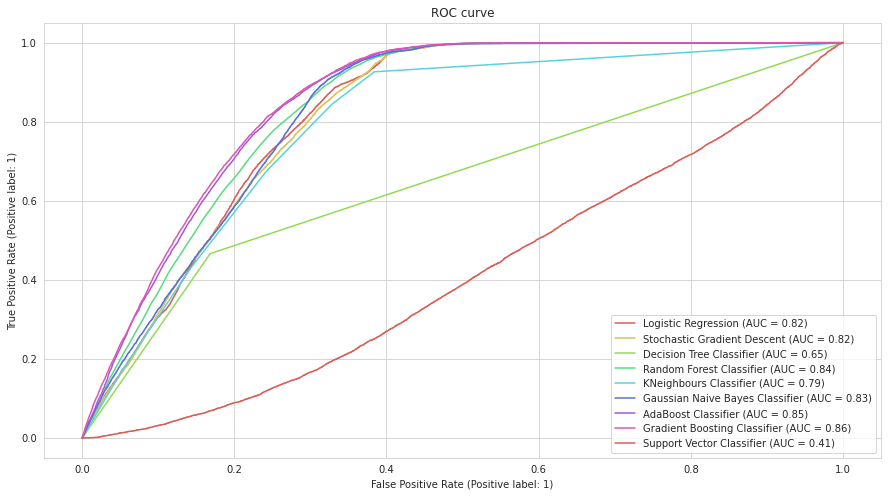

In [82]:
fig, ax = plt.subplots(figsize=(15,8))

model_displays = {}
for name, model in models:
    model_displays[name] = metrics.plot_roc_curve(
        model, prepare_data(X_test), y_test, ax=ax, name=name)
_ = ax.set_title('ROC curve')

In [83]:
comparison_table.loc[comparison_table['Accuracy'].idxmax()]

Model                     Decision Tree Classifier
Accuracy                                  0.786912
Precision                                 0.279073
Recall                                    0.466495
F1-score                                  0.349227
AUC                                           0.65
Confusion matrix    [[55622, 11258], [4984, 4358]]
Name: 2, dtype: object

> Based on the **accuracy** score the Decision Tree Classifier performed the best.

In [84]:
comparison_table.loc[comparison_table['Precision'].idxmax()]

Model                     Random Forest Classifier
Accuracy                                  0.763179
Precision                                 0.306784
Recall                                    0.740098
F1-score                                  0.433765
AUC                                           0.75
Confusion matrix    [[51257, 15623], [2428, 6914]]
Name: 3, dtype: object

> Based on the **precision** score the Random Forest Classifier performed the best.

In [85]:
comparison_table.loc[comparison_table['Recall'].idxmax()]

Model                 Stochastic Gradient Descent
Accuracy                                 0.639172
Precision                                0.250666
Recall                                     0.9772
F1-score                                 0.398986
AUC                                          0.78
Confusion matrix    [[39590, 27290], [213, 9129]]
Name: 1, dtype: object

> Based on the **recall** score the Stochastic Gradient Descent Classifier performed the best.

Compare pairs of models and select the best ones:

> Decision Tree Classifier vs Random Forest Classifier:
> * Decision Tree Classifier had higher accuracy score, but as explained previously, we should consider other performance metrics as well not just accuracy alone, as we are working with a highly imbalanced dataset.
> * Random Forest Classifier had higher recall and precision scores, therefore also higher AUC value, as shown on the ROC curve.
> * ====> select **Random Forest Classifier**

> AdaBoost Classifier vs Gradient Boosting Classifier:
> * AdaBoost Classifier had higher accuracy and precision, and less false positives.
> * Gradient Boosting Classifier had the same AUC value but with higher recall and similar F1-score (precision-recall balance).
> * ====> select **Gradient Boosting Classifier**

> Linear Regression vs Stochastic Gradient Descent:
> * Linear Regression had high recall and AUC value with a large number of true positives.
> * Stochastic Gradient Descent had very similar metrics except that it had slightly bigger recall.
> * ====> select **Stochastic Gradient Descent**


> KNeighbours Classifier vs Gaussian Naive Bayes Classifier:
> * KNeighbours Classifier had higher accuracy and higher precision.
> * Gaussian Naive Bayes Classifier had higher recall and F1-score, therefore better balance between precision and recall, which indicates how accurate and complete the model is. It also has higher AUC value and more true positives.
> * ====> select **Gaussian Naive Bayes Classifier**

_Remark_: 

When selecting the models the value of the **recall** and **AUC** had a larger weight in the final choice than precision and accuracy. 

This is because we would like our model to identify **all** the customers who would respond positively to a vehicle insurance offer, even if, as it turns out, some of them would actually not be interested.

The purpose of the insurance company is to reach out to **all** the potentially interested customers, therefore we need the high recall, instead of focusing on precision and contacting only those customers who would most probably want to have vehicle insurance, thus risking to omit some of the potential customers.

## Fine tune the selected models

Now, we would like to fine tune our final models to obtain the hyperparameters for which they produce the best results.

We can fine tune a model by:
1. Cross-validation(CV): selecting and keeping the classifier with the highest precision/recall score using RandomizedSearchCV. RandomizedSearchCV selects randomly a combination of hyperparameters and refits the estimator using the best found parameters on the given dataset.
2. Adjusting the decision threshold using the ROC curve.

In [86]:
from sklearn.model_selection import RandomizedSearchCV

def search_best_params(model, X_train, y_train, X_test, y_test, params, scorers, refit_score):
    """
      Fit the estimator multiple times on the training data using different hyperparameter combinations and evaluate the performance of the model in each case.
      The combinations of hyperparameters are selected randomly and the number of combinations
      tried is specified by the 'n_iter' parameter.
      After trying all the combinations it selects the best of them.

      RandomSearchCV cross-validation method performs better than GridSearch because it doesn't check
      all the possible combinations of paramaters, rather it selects a few, randomly and returns
      the result based on them. It might not find the best (most optimal) solution, but
      it still finds a result whhich is close to the optimal.
    """
    skf = StratifiedKFold(n_splits=2)
    search = RandomizedSearchCV(model, params, scoring = scorers, refit = refit_score,
                           cv = skf, return_train_score=True, n_iter=5, verbose=True)
    search.fit(prepare_data(X_train).values, y_train.values)

    # predict the outcome
    y_pred = search.predict(prepare_data(X_test).values)

    print('Best params for {}'.format(refit_score))
    print(search.best_params_)

    # display confusion matrix
    print('\nConfusion matrix of {} optimized for {} on the validation data:'.format(model, refit_score))
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                 columns=['predicted_negative', 'predicted_positive'], index=['true_negative', 'true_positive']))
    return search

### Stochastic Gradient Descent tuning

Stochastic Gradient Descent is an optimization technique which modifies the parameters of the Logistic Regression model to minimize the cost function. Due to the random (stochastic) selection of points the algorithm might not find the global minimum, but this problem can be overcome by setting an appropriate learning rate.

We would like to tune the stochastic gradient classifier with an adaptive learning rate, which starts out with a larger value then it slowly decays, becoming smaller and smaller at each iteration. The algorithm stops when the learning rate goes below a predefined threshold equal to 1e-6.

Hyperparameters:
* max_iter = maximum number of passes over the training data (= epochs)
* eta0 = initial learning rate for the 'adaptive' learning rate

In [87]:
sgd = SGDClassifier(loss='log', random_state=0, learning_rate='adaptive')

params = {
    'max_iter': [50, 100, 150],
    'eta0': [0.001, 0.005, 0.01, 0.05],
}

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score, zero_division=0),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score)
} 

search_results = search_best_params(sgd, X_train, y_train, X_test, y_test, params = params, scorers = scorers, refit_score = 'accuracy_score')

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best params for accuracy_score
{'max_iter': 100, 'eta0': 0.01}

Confusion matrix of SGDClassifier(learning_rate='adaptive', loss='log', random_state=0) optimized for accuracy_score on the validation data:
               predicted_negative  predicted_positive
true_negative               66880                   0
true_positive                9342                   0


In [88]:
results = pd.DataFrame(search_results.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_iter', 'param_eta0']].head()

mean_test_precision_score  mean_test_recall_score  \
3                   0.205556                0.000321   
0                   0.000000                0.000000   
1                   0.000000                0.000000   
2                   0.000000                0.000000   
4                   0.000000                0.000000   

   mean_test_accuracy_score param_max_iter param_eta0  
3                  0.877171            150      0.001  
0                  0.877437            100       0.01  
1                  0.877437             50       0.01  
2                  0.877437            150      0.005  
4                  0.877437             50      0.005

**Results**:
* As we can see the best result is obtained for initial learning rate, eta = 0.001 and maximum 150 number of iterations over the training data (epochs).

In [89]:
sgd = SGDClassifier(loss='log', random_state=0, learning_rate='adaptive', max_iter = 50, eta0 = 0.001)

### Random Forest Classifier tuning

A random forest is an estimator that uses multiple decision tree classifiers as base estimators, on samples of the dataset, and compute the average from their results to control over-fitting. 

Hyperparameters:
* n_estimators = number of decision trees ensembled in the forest
* max_features = max number of features considered (evaluated) when splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split


In [90]:
rfc = RandomForestClassifier(n_jobs=-1)

params = {
    'max_depth': [10, 25, 50],
    'max_features': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100],
    'n_estimators': [10, 50, 100, 500]
 }

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score, zero_division=0),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score)
} 

search_results = search_best_params(rfc, X_train, y_train, X_test, y_test, params = params, scorers = scorers, refit_score = 'accuracy_score')

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best params for accuracy_score
{'n_estimators': 500, 'min_samples_split': 100, 'max_features': 5, 'max_depth': 25}

Confusion matrix of RandomForestClassifier(n_jobs=-1) optimized for accuracy_score on the validation data:
               predicted_negative  predicted_positive
true_negative               66723                 157
true_positive                9190                 152


In [91]:
results = pd.DataFrame(search_results.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_max_features']].head()

mean_test_precision_score  mean_test_recall_score  \
1                   0.372055                0.102173   
0                   0.403105                0.067116   
3                   0.500958                0.018278   
4                   0.509630                0.017261   
2                   0.000000                0.000000   

   mean_test_accuracy_score param_n_estimators param_max_depth  \
1                  0.868814                 10              25   
0                  0.873478                 10              50   
3                  0.877430                500              50   
4                  0.877492                500              25   
2                  0.877437                100              10   

  param_min_samples_split param_max_features  
1                      10                  7  
0                      50                 10  
3                     100                  5  
4                     100                  5  
2                      50                  3

**Results**:
* The best results were obtained when using 500 decision trees, with min 10 samples nedded to split an internal node, evaluating max 5 features at a given node in one when making a decision and each decision tree having a max depth of 50.

In [92]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators = 500, max_features=5, min_samples_split = 10, max_depth=50)

### Gaussian Naive Bayes Classifier tuning


Gaussian Naive Bayes has the assumption that each class is normally distributed and the features are independent of ecah other.

Hyperparameters:
* var_smoothing = portion of the largest variance of all features when computing stability, it is used to handle the problem of zero probability, when no instance of a given class occurs in the training set

In [93]:
gnb = GaussianNB()

params = {
    'var_smoothing': [1e-15, 1e-12, 1e-9]
 }

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score)
} 

search_results = search_best_params(gnb, X_train, y_train, X_test, y_test, params = params, scorers = scorers, refit_score = 'accuracy_score')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best params for accuracy_score
{'var_smoothing': 1e-15}

Confusion matrix of GaussianNB() optimized for accuracy_score on the validation data:
               predicted_negative  predicted_positive
true_negative               39674               27206
true_positive                 219                9123


In [94]:
results = pd.DataFrame(search_results.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score','param_var_smoothing']].head()

mean_test_precision_score  mean_test_recall_score  \
0                   0.250457                0.976183   
1                   0.250457                0.976183   
2                   0.250457                0.976183   

   mean_test_accuracy_score param_var_smoothing  
0                   0.63902                 0.0  
1                   0.63902                 0.0  
2                   0.63902                 0.0

**Results**:
* The best result is obtained for var_smoothing = 1e-15, the smallest avalible value for smoothing.

In [95]:
gnb = GaussianNB(var_smoothing=1e-15)

### Gradient Boosting Classifier tuning

Gradient Boosting Classifier can be used for both continuous and categorical target, that is for both regression and classification problems. Moreover, the prediction is done in parallel, therefore it can predict the outcome very fast. 
For binary classification it uses a single underlying regression tree.

Hyperparameters:
* n_estimators = the number of boosting stages to perform
* max_depth = the maximum depth of the individual regression estimators, the maximum depth limits the number of nodes in the tree
* learning_rate = used to reduce the contribution of the result from the tree

In [96]:
gbc = GradientBoostingClassifier()

params = {
    "n_estimators":[10,50,100],
    "max_depth":[3, 5, 7],
    "learning_rate":[0.01,0.1,0.5]
 }

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score, zero_division=0),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score)
} 

search_results = search_best_params(gbc, X_train, y_train, X_test, y_test, params = params, scorers = scorers, refit_score = 'recall_score')

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best params for recall_score
{'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1}

Confusion matrix of GradientBoostingClassifier() optimized for recall_score on the validation data:
               predicted_negative  predicted_positive
true_negative               66847                  33
true_positive                9319                  23


In [97]:
results = pd.DataFrame(search_results.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_n_estimators', 'param_max_depth', 'param_learning_rate']].head()

mean_test_precision_score  mean_test_recall_score  \
3                   0.437365                0.004014   
1                   0.334427                0.003265   
2                   0.288690                0.000562   
0                   0.000000                0.000000   
4                   0.000000                0.000000   

   mean_test_accuracy_score param_n_estimators param_max_depth  \
3                  0.877299                 50               7   
1                  0.877046                 10               5   
2                  0.877335                 50               5   
0                  0.877437                 10               5   
4                  0.877433                 10               5   

  param_learning_rate  
3                 0.1  
1                 0.5  
2                 0.1  
0                0.01  
4                 0.1

**Results**:
* The best results were obtained when performing 50 boosting stages, having max depth as 7 for each base estimator and a learning rate of 0.5.

In [98]:
gbc = GradientBoostingClassifier(n_estimators = 50, max_depth = 7, learning_rate = 0.5)

### Adjusting the threshold

From the ROC curve of all the models we could see that the threshold is actually lower than 50%, around 30-40%. Therefore by lowering the threshold which is used to distinguish the instances of the positive and negative classes we can improve the performance of the prediction models (by helping it to detect more true labels).

In [115]:
def classify_labels(model, X_train, y_train, X_test, y_test, T):
  """
    Classify responses based on the new threshold T.
  """
  # train model
  model.fit(prepare_data(X_train), y_train)
  # make predictions
  predictions = model.predict_proba(prepare_data(X_test))[:,1]
  # adjust the predictions based on a threshold
  adjusted_pred = [1 if y >= T else 0 for y in predictions]

  # print a classification report
  print(metrics.classification_report(y_test, adjusted_pred,target_names=['Expected labels', 'Adjusted predicted labels']))

  # display the confusion matrix
  print(pd.DataFrame(metrics.confusion_matrix(y_test, adjusted_pred),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
  # plot the ROC curves

  fig, ax = plt.subplots()
  
  fpr0, tpr0, _ = metrics.roc_curve(y_test, predictions)
  fpr1, tpr1, _ = metrics.roc_curve(y_test, adjusted_pred)
  ax.plot(fpr0,tpr0)
  ax.plot(fpr1,tpr1)

  ax.plot((0,1), ls='dashed',color='black')
  ax.set_title('ROC curve comparison')
  ax.set_xlabel('FPR (Precision)')
  ax.set_ylabel('TPR (Recall)')

  plt.show()

  print ('Area under curve (AUC): ', metrics.auc(fpr0,tpr0))
  print ('Area under curve (AUC) for custom threshold: ', metrics.auc(fpr1,tpr1))

                           precision    recall  f1-score   support

          Expected labels       0.97      0.72      0.83     66880
Adjusted predicted labels       0.30      0.87      0.45      9342

                 accuracy                           0.74     76222
                macro avg       0.64      0.79      0.64     76222
             weighted avg       0.89      0.74      0.78     76222

     pred_neg  pred_pos
neg     48015     18865
pos      1255      8087


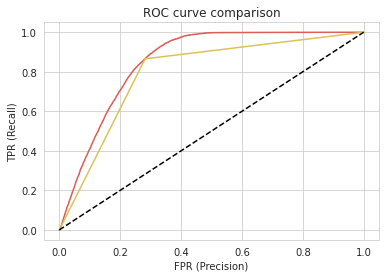

Area under curve (AUC):  0.8518319772681177
Area under curve (AUC) for custom threshold:  0.7917940448624773


In [117]:
classify_labels(gbc, X_train, y_train, X_test, y_test, 0.15)

> As we can see by lowering the threshold we can increase the value of the AUC, as shown by the ROC curves, which means the predictions are closer to the actual (expected) values. We can also notice an increase in the recall value, indicating a lower number of false negatives.

### Additional data processing:

We test the model by removing certain columns first, which have a very small correlation to the target label, such as **Vintage, Region Code** and **Driving_License**.

In [101]:
unnecessary_columns = ['Region_Code', 'Vintage', 'Driving_License']

X_train_new = X_train.drop(unnecessary_columns, axis=1)
X_test_new = X_test.drop(unnecessary_columns, axis=1)

In [102]:
data = [X_train, X_test, y_train, y_test]
new_data = [X_train_new, X_test_new, y_train, y_test]
compare_performance_on_different_datasets(gbc, data, new_data, dataset_0_name = "With all features", dataset_1_name="Without the unnecessary features")

Metrics  With all features  Without the unnecessary features
0   Accuracy           0.874065                          0.874642
1  Precision           0.389320                          0.379115
2     Recall           0.048384                          0.035753
3   F1_score           0.086071                          0.065343

After training and evalutaing the Gradient Boosting algorithm on the new dataset, without the unecessary fetaures, we notice that the accuracy of the prediction didn't change considerably.

In [103]:
data = [X_train, X_test, y_train, y_test]
new_data = [X_train_new, X_test_new, y_train, y_test]
compare_performance_on_different_datasets(rfc, data, new_data, dataset_0_name = "With all features", dataset_1_name="Without the unnecessary features")

Metrics  With all features  Without the unnecessary features
0   Accuracy           0.872858                          0.863779
1  Precision           0.399885                          0.354568
2     Recall           0.074609                          0.135838
3   F1_score           0.125756                          0.196424

After training and evalutaing the Random Forest Classifier algorithm on the new dataset, which doesn't contain the unecessary fetaures, we notice that the accuracy and the precision of the prediction slightly decreases.

Therefore we can conclude that there is no considerable gain in the performance after removing certain features, and that even if some features seem to be independent of each other with little to no correlation, in reality they could still affect the final outcome.

# Evaluate the model on the test data

In [104]:
def evaluate_model_on_test_set(model, model_name):
  """
    Train the selected model on the train dataset and then evaluate its performance on the test dataset
  """
  train_data = pd.read_csv(train_data_file_path,on_bad_lines='skip')
  test_data = pd.read_csv(test_data_file_path,on_bad_lines='skip')

  df_train = train_data.drop("Response", axis=1) # drop labels for training set
  label_train = train_data["Response"].copy() 

  df_test = test_data.copy() # the test data doesn't contain a 'Response' feature

  df_train_prep = prepare_data(df_train)
  df_train_prep, label_train = resample_data(df_train_prep, label_train, over=0.3, under=0.7)
  model.fit(df_train_prep, label_train)
  predictions = model.predict(prepare_data(df_test))

  df_pred = pd.DataFrame({'Predictions': predictions})
  print("Preview the first few predicted responses:")
  print(df_pred.head())
  print('Nr of negative and positive responses: ', Counter(df_pred['Predictions']))

  fields = ['id', 'Response']
  filename = 'customer_response_' + model_name + '.csv'

  outputList = list()
  print("Total number of outcomes = ", len(predictions))

  for i in range(0,len(predictions)):
      finalList = list()
      finalList.append(df_test['id'][i])
      finalList.append(int(predictions[i]))
      outputList.append(finalList)

  with open(filename, 'wt') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(fields)

    for row in outputList:
        csv_writer.writerow(row)

> Evaluate the Gradient Boosting Classifier model on the test set:

In [105]:
evaluate_model_on_test_set(gbc, "gbc")

Preview the first few predicted responses:
   Predictions
0            0
1            0
2            1
3            0
4            0
Nr of negative and positive responses:  Counter({0: 84594, 1: 42443})
Total number of outcomes =  127037


> Evaluate the Stochastic Gradient Descent model on the test set:

In [106]:
evaluate_model_on_test_set(sgd, "sgd")

Preview the first few predicted responses:
   Predictions
0            0
1            1
2            1
3            0
4            0
Nr of negative and positive responses:  Counter({0: 67281, 1: 59756})
Total number of outcomes =  127037


> Evaluate the Random Forest Classifier model on the test set:

In [107]:
evaluate_model_on_test_set(rfc, "rfc")

Preview the first few predicted responses:
   Predictions
0            0
1            1
2            1
3            0
4            0
Nr of negative and positive responses:  Counter({0: 94331, 1: 32706})
Total number of outcomes =  127037


> Evaluate the Gaussian Naive Bayes Classifier model on the test set:

In [108]:
evaluate_model_on_test_set(gnb, "gnb")

Preview the first few predicted responses:
   Predictions
0            0
1            1
2            1
3            0
4            0
Nr of negative and positive responses:  Counter({0: 66641, 1: 60396})
Total number of outcomes =  127037


We can see that the predicted outcomes are fairly balanced, with even distribution of positive and negative responses.
Out of the 4 models evaluated on the test data, the Gaussian Naive Bayes Classifier and the Stochastic Gradient Descent produced the most positive results, that is, they predicted that around half of the customers who have a health insurance would be interested in having a car insurance as well.

### Saving the models

In [109]:
import joblib

# save the Gradient Boost Classifier model
joblib.dump(gbc, "gbc.pkl")
# save the Stochastic Gradient Descent model
joblib.dump(sgd, "sgd.pkl")
# save the Random Forest Classifier model
joblib.dump(rfc, "rfc.pkl")
# save the Gaussian Naive Bayes Classifier model
joblib.dump(gnb, "gnb.pkl")

['gnb.pkl']

# Summary

> Main steps:
1. Starting with the Exploratory Data Analysis (EDA), we analyzed the given dataset and the relationship between the features. Identified the correlations between them and created plots for visualizations.
2. After becoming more familiar with the data, we processed it, by removing unnecessary features (which have no correlation to the target label, such as the 'id' column), encoding the categorical values, removing outliers and scaling the numerical values in the [0,1] interval, in order to be able to train a prediction model on this dataset.
3. We have considered multiple different binary classifiers and analized their performance on a subset of the training set, called _validation set_.
4. The selected models were fine tuned to achieve better performance, and evaluated on the test data. Instead of just one model, we selected 4 of them, which had similar performance results.

> Final words about the dataset:
* The train set contained imbalanced data, more negative responses were present then positive ones, therefore causing the selected models to overfit the results, giving very high accuracy, misleadingly. In order to prevent the model from overfitting, a combination of over- and under-sampling was used to obtain an almost even distribution of instances belonging to the 2 binary categories: positive and negative Response.
* The selected and tuned models can be further improved by adding more instances to the train and test datasets in order to obtain a fair distribution of responses from both classes.